# CALIDAD DEL AIRE EN BARCELONA

En primer lugar importamos las librerias

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import math
import folium
from sklearn.impute import KNNImputer

## ANALISIS DEL OZONO PRE-PANDEMIA

Usaremos datos de abril de 2019 en primer lugar

In [266]:
df_2019=pd.read_csv('/content/2019_04_Abril_qualitat_aire_BCN.csv')
df_2019.head()

CODI_PROVINCIA  PROVINCIA  CODI_MUNICIPI   MUNICIPI  ESTACIO  \
0               8  Barcelona             19  Barcelona        4   
1               8  Barcelona             19  Barcelona        4   
2               8  Barcelona             19  Barcelona        4   
3               8  Barcelona             19  Barcelona        4   
4               8  Barcelona             19  Barcelona        4   

   CODI_CONTAMINANT   ANY  MES  DIA  H01  ...  H20  V20  H21  V21  H22  V22  \
0                 7  2019    4    2  1.0  ...  8.0    V  3.0    V  1.0    V   
1                 7  2019    4    3  1.0  ...  3.0    V  2.0    V  2.0    V   
2                 7  2019    4    4  1.0  ...  2.0    V  2.0    V  1.0    V   
3                 7  2019    4    5  2.0  ...  3.0    V  2.0    V  2.0    V   
4                 7  2019    4    6  1.0  ...  6.0    V  2.0    V  2.0    V   

   H23  V23  H24  V24  
0  1.0    V  1.0    V  
1  2.0    V  2.0    V  
2  2.0    V  2.0    V  
3  1.0    V  2.0    V  
4  1.0    V  3.0    V  

[5 rows x 57 columns]

Dado que los datos los hemos obtenido del portal de open data barcelona, no es necesario que nos recuerden a cada instante que la provinicia y ciudad que estamos observando es barcelona, por tanto estas columnas son prescindibles, liberandonos asi de que los algoritmos hagan calculos inecesarios

In [267]:
df_2019 = df_2019.drop(columns=['CODI_PROVINCIA', 'PROVINCIA', 'CODI_MUNICIPI', 'MUNICIPI']) #Eliminamos columnas que no son de interes

In [268]:
df_sin_tratar_datos_nominales= df_2019.copy()

In [269]:
df_2019.head()

ESTACIO  CODI_CONTAMINANT   ANY  MES  DIA  H01 V01  H02 V02  H03  ...  H20  \
0        4                 7  2019    4    2  1.0   V  1.0   V  3.0  ...  8.0   
1        4                 7  2019    4    3  1.0   V  1.0   V  1.0  ...  3.0   
2        4                 7  2019    4    4  1.0   V  1.0   V  2.0  ...  2.0   
3        4                 7  2019    4    5  2.0   V  1.0   V  8.0  ...  3.0   
4        4                 7  2019    4    6  1.0   V  1.0   V  1.0  ...  6.0   

   V20  H21  V21  H22  V22  H23  V23  H24  V24  
0    V  3.0    V  1.0    V  1.0    V  1.0    V  
1    V  2.0    V  2.0    V  2.0    V  2.0    V  
2    V  2.0    V  1.0    V  2.0    V  2.0    V  
3    V  2.0    V  2.0    V  1.0    V  2.0    V  
4    V  2.0    V  2.0    V  1.0    V  3.0    V  

[5 rows x 53 columns]

In [270]:
df_estaciones=pd.read_csv('/content/2025_qualitat_aire_estacions.csv')
df_estaciones.head()

Estacio              nom_cabina codi_dtes  zqa  codi_eoi  Longitud  \
0       50  Barcelona - Ciutadella        IL    1   8019050    2.1874   
1       50  Barcelona - Ciutadella        IL    1   8019050    2.1874   
2       50  Barcelona - Ciutadella        IL    1   8019050    2.1874   
3       50  Barcelona - Ciutadella        IL    1   8019050    2.1874   
4       43    Barcelona - Eixample        IH    1   8019043    2.1538   

   Latitud                    ubicacio  Codi_districte Nom_districte  \
0  41.3864       Parc de la Ciutadella               1  Ciutat Vella   
1  41.3864       Parc de la Ciutadella               1  Ciutat Vella   
2  41.3864       Parc de la Ciutadella               1  Ciutat Vella   
3  41.3864       Parc de la Ciutadella               1  Ciutat Vella   
4  41.3853  Av. Roma - c/ Comte Urgell               5      Eixample   

   Codi_barri                              Nom_barri  Clas_1   Clas_2  \
0           4  Sant Pere, Santa Caterina i la Ribera  Urbana     Fons   
1           4  Sant Pere, Santa Caterina i la Ribera  Urbana     Fons   
2           4  Sant Pere, Santa Caterina i la Ribera  Urbana     Fons   
3           4  Sant Pere, Santa Caterina i la Ribera  Urbana     Fons   
4           9         la Nova Esquerra de l'Eixample  Urbana  Trànsit   

   Codi_Contaminant  
0                 8  
1                14  
2                 7  
3                12  
4                 8

In [271]:
df_estaciones=df_estaciones.drop(columns=['zqa', 'codi_dtes', 'Longitud', 'Latitud','ubicacio', 'Codi_districte'])

In [272]:
df_estaciones[df_estaciones['nom_cabina'] == 'Barcelona - Poblenou' ]

Estacio            nom_cabina  codi_eoi Nom_districte  Codi_barri  \
31        4  Barcelona - Poblenou   8019004    Sant Marti          68   
32        4  Barcelona - Poblenou   8019004    Sant Marti          68   
33        4  Barcelona - Poblenou   8019004    Sant Marti          68   
34        4  Barcelona - Poblenou   8019004    Sant Marti          68   

      Nom_barri  Clas_1 Clas_2  Codi_Contaminant  
31  el Poblenou  Urbana   Fons                 8  
32  el Poblenou  Urbana   Fons                10  
33  el Poblenou  Urbana   Fons                 7  
34  el Poblenou  Urbana   Fons                12

In [273]:
# Crear diccionario de asociación única
diccionario_asociacion_estaciones = df_estaciones.drop_duplicates(subset=['nom_cabina']).set_index('nom_cabina')['Estacio'].to_dict()
# Invertir claves y valores
diccionario_asociacion_estaciones = {valor: clave for clave, valor in diccionario_asociacion_estaciones.items()}


print(diccionario_asociacion_estaciones)

{50: 'Barcelona - Ciutadella', 43: 'Barcelona - Eixample', 44: 'Barcelona - Gràcia', 57: 'Barcelona - Palau Reial', 4: 'Barcelona - Poblenou', 42: 'Barcelona - Sants', 54: 'Barcelona - Vall Hebron'}


In [274]:
# Diccionario de mapeo de códigos de contaminante a nombres de gases
mapeo_contaminantes = {
    1: 'SO2',
    6: 'CO',
    7: 'NO',
    8: 'NO2',
    9: 'PM2.5',
    10: 'PM10',
    12: 'NOx',
    14: 'O3',
    22: 'Black Carbon',
    101: 'SO2*',
    106: 'CO*',
    107: 'NO*',
    108: 'NO2*',
    109: 'PM2.5*',
    110: 'PM10*',
    112: 'NOx*',
    114: 'O3*',
    996: 'Flow 2',
    997: 'Flow 1',
    998: 'Flow C',
    999: 'Biomass'
}


Hasta ahora lo que se ha realizado son dos mapas, para que sea mas comprensible para el programador que es cada numero y donde esta cada estacion

In [275]:
df_2019["CODI_CONTAMINANT"]=df_2019["CODI_CONTAMINANT"].astype(int).replace(mapeo_contaminantes)
df_2019["ESTACIO"]=df_2019["ESTACIO"].astype(int).replace(diccionario_asociacion_estaciones)

In [276]:
df_2019

ESTACIO CODI_CONTAMINANT   ANY  MES  DIA   H01 V01  \
0        Barcelona - Poblenou               NO  2019    4    2   1.0   V   
1        Barcelona - Poblenou               NO  2019    4    3   1.0   V   
2        Barcelona - Poblenou               NO  2019    4    4   1.0   V   
3        Barcelona - Poblenou               NO  2019    4    5   2.0   V   
4        Barcelona - Poblenou               NO  2019    4    6   1.0   V   
...                       ...              ...   ...  ...  ...   ...  ..   
1126  Barcelona - Palau Reial               O3  2019    4   26  83.0   V   
1127  Barcelona - Palau Reial               O3  2019    4   27  56.0   V   
1128  Barcelona - Palau Reial               O3  2019    4   28  28.0   V   
1129  Barcelona - Palau Reial               O3  2019    4   29  83.0   V   
1130  Barcelona - Palau Reial               O3  2019    4   30  54.0   V   

       H02 V02   H03  ...   H20  V20   H21  V21   H22  V22   H23  V23   H24  \
0      1.0   V   3.0  ...   8.0    V   3.0    V   1.0    V   1.0    V   1.0   
1      1.0   V   1.0  ...   3.0    V   2.0    V   2.0    V   2.0    V   2.0   
2      1.0   V   2.0  ...   2.0    V   2.0    V   1.0    V   2.0    V   2.0   
3      1.0   V   8.0  ...   3.0    V   2.0    V   2.0    V   1.0    V   2.0   
4      1.0   V   1.0  ...   6.0    V   2.0    V   2.0    V   1.0    V   3.0   
...    ...  ..   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...   ...   
1126  81.0   V  79.0  ...  89.0    V  87.0    V  80.0    V  47.0    V  44.0   
1127  44.0   V  52.0  ...   NaN    N   NaN    N   NaN    N   NaN    N   NaN   
1128  28.0   V  43.0  ...   NaN    N   NaN    N   NaN    N   NaN    N   NaN   
1129  84.0   V  72.0  ...  76.0    V  70.0    V  63.0    V  54.0    V  58.0   
1130  65.0   V  73.0  ...  69.0    V  66.0    V  61.0    V  60.0    V  55.0   

      V24  
0       V  
1       V  
2       V  
3       V  
4       V  
...   ...  
1126    V  
1127    N  
1128    N  
1129    V  
1130    V  

[1131 rows x 53 columns]

A continuacion haremos un plot de un mapa para mirar donde estan ubicadas las diferentes estaciones


In [277]:
# Lista de coordenadas (latitud, longitud) y sus etiquetas
coordenadas = [
    (41.4039, 2.2045, "Barcelona - Poblenou"),
    (41.3788,2.1331,"Barcelona - Sants"),
    (41.3853,2.1538,"Barcelona - Eixample"),
    (41.3987,2.1534,"Barcelona - Gràcia"),
    (41.3864,2.1874,"Barcelona - Ciutadella"),
    (41.4261,2.1480,"Barcelona - Vall Hebron"),
    (41.3875,2.1154,"Barcelona - Palau Reial"),
    (41.41843,2.1239,"Barcelona - Observatori")
]

# Crear un mapa centrado en el primer punto
mapa = folium.Map(location=coordenadas[0][:2], zoom_start=13)

# Agregar marcadores con popups (etiquetas)
for lat, lon, etiqueta in coordenadas:
    folium.Marker([lat, lon], popup=etiqueta).add_to(mapa)

# Mostrar el mapa
mapa


en aquest cas es mostren les ubicacions a 2025, pero si miresim el mapa posant les coordenades de 2021 voriem que la estacio de l'observatori no hi es i en canvi esta la de sants

haremos un analisis de la evolucion de los contaminantes para diferentes estaciones:
* *Dues estacions bora del mar* : Ciutadella i Poblenou
* *Dues estacions centiques* : Gracia i Eixample
* *Dues de "adalt"* : Vall-Hebron i observatori

In [278]:
df_2019_o3 = df_2019[df_2019['CODI_CONTAMINANT'] == 'O3' ]

In [279]:
df_2019_o3

ESTACIO CODI_CONTAMINANT   ANY  MES  DIA   H01 V01  \
377      Barcelona - Eixample               O3  2019    4    2  75.0   V   
378      Barcelona - Eixample               O3  2019    4    3  75.0   V   
379      Barcelona - Eixample               O3  2019    4    4  65.0   V   
380      Barcelona - Eixample               O3  2019    4    5  40.0   V   
381      Barcelona - Eixample               O3  2019    4    6  61.0   V   
...                       ...              ...   ...  ...  ...   ...  ..   
1126  Barcelona - Palau Reial               O3  2019    4   26  83.0   V   
1127  Barcelona - Palau Reial               O3  2019    4   27  56.0   V   
1128  Barcelona - Palau Reial               O3  2019    4   28  28.0   V   
1129  Barcelona - Palau Reial               O3  2019    4   29  83.0   V   
1130  Barcelona - Palau Reial               O3  2019    4   30  54.0   V   

       H02 V02   H03  ...   H20  V20   H21  V21   H22  V22   H23  V23   H24  \
377   71.0   V  63.0  ...  64.0    V  47.0    V  53.0    V  83.0    V  81.0   
378   68.0   V  75.0  ...  44.0    V  49.0    V  54.0    V  53.0    V  47.0   
379   74.0   V  77.0  ...  62.0    V  57.0    V  47.0    V  48.0    V  31.0   
380   56.0   V  61.0  ...  42.0    V  56.0    V  42.0    V  49.0    V  69.0   
381   58.0   V  54.0  ...  75.0    V  65.0    V  58.0    V  51.0    V  16.0   
...    ...  ..   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...   ...   
1126  81.0   V  79.0  ...  89.0    V  87.0    V  80.0    V  47.0    V  44.0   
1127  44.0   V  52.0  ...   NaN    N   NaN    N   NaN    N   NaN    N   NaN   
1128  28.0   V  43.0  ...   NaN    N   NaN    N   NaN    N   NaN    N   NaN   
1129  84.0   V  72.0  ...  76.0    V  70.0    V  63.0    V  54.0    V  58.0   
1130  65.0   V  73.0  ...  69.0    V  66.0    V  61.0    V  60.0    V  55.0   

      V24  
377     V  
378     V  
379     V  
380     V  
381     V  
...   ...  
1126    V  
1127    N  
1128    N  
1129    V  
1130    V  

[145 rows x 53 columns]

como se puede observar hay varios valores que presentan un NaN, para tratar esto esta vez hare uso de un "imputer" a traves del algoritmo de supervised machine learning kNN puedo hacer un imputer.

Esto me permitira mantener relaciones entre los datos

In [280]:
# Crear el imputador kNN con k=3 vecinos
imputer = KNNImputer(n_neighbors=3)

In [281]:
#hacemos un sencillo replace
df_sin_tratar_datos_nominales[[f"V{str(i).zfill(2)}" for i in range(1, 25)]]=df_sin_tratar_datos_nominales[[f"V{str(i).zfill(2)}" for i in range(1, 25)]].replace({'V': 1, 'N': 0})

<ipython-input-281-86927e9e68cc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sin_tratar_datos_nominales[[f"V{str(i).zfill(2)}" for i in range(1, 25)]]=df_sin_tratar_datos_nominales[[f"V{str(i).zfill(2)}" for i in range(1, 25)]].replace({'V': 1, 'N': 0})


In [282]:
df_sin_tratar_datos_nominales

ESTACIO  CODI_CONTAMINANT   ANY  MES  DIA   H01  V01   H02  V02   H03  \
0           4                 7  2019    4    2   1.0    1   1.0    1   3.0   
1           4                 7  2019    4    3   1.0    1   1.0    1   1.0   
2           4                 7  2019    4    4   1.0    1   1.0    1   2.0   
3           4                 7  2019    4    5   2.0    1   1.0    1   8.0   
4           4                 7  2019    4    6   1.0    1   1.0    1   1.0   
...       ...               ...   ...  ...  ...   ...  ...   ...  ...   ...   
1126       57                14  2019    4   26  83.0    1  81.0    1  79.0   
1127       57                14  2019    4   27  56.0    1  44.0    1  52.0   
1128       57                14  2019    4   28  28.0    1  28.0    1  43.0   
1129       57                14  2019    4   29  83.0    1  84.0    1  72.0   
1130       57                14  2019    4   30  54.0    1  65.0    1  73.0   

      ...   H20  V20   H21  V21   H22  V22   H23  V23   H24  V24  
0     ...   8.0    1   3.0    1   1.0    1   1.0    1   1.0    1  
1     ...   3.0    1   2.0    1   2.0    1   2.0    1   2.0    1  
2     ...   2.0    1   2.0    1   1.0    1   2.0    1   2.0    1  
3     ...   3.0    1   2.0    1   2.0    1   1.0    1   2.0    1  
4     ...   6.0    1   2.0    1   2.0    1   1.0    1   3.0    1  
...   ...   ...  ...   ...  ...   ...  ...   ...  ...   ...  ...  
1126  ...  89.0    1  87.0    1  80.0    1  47.0    1  44.0    1  
1127  ...   NaN    0   NaN    0   NaN    0   NaN    0   NaN    0  
1128  ...   NaN    0   NaN    0   NaN    0   NaN    0   NaN    0  
1129  ...  76.0    1  70.0    1  63.0    1  54.0    1  58.0    1  
1130  ...  69.0    1  66.0    1  61.0    1  60.0    1  55.0    1  

[1131 rows x 53 columns]

In [283]:
# Aplicar la imputación kNN
df_2019_o3_imputed_data = imputer.fit_transform(df_sin_tratar_datos_nominales)

In [284]:
# Convertir el array imputado de vuelta a un DataFrame
df_2019_o3_imputed = pd.DataFrame(df_2019_o3_imputed_data, columns=df_sin_tratar_datos_nominales.columns)

In [285]:
df_o3=df_2019_o3_imputed[df_2019_o3_imputed["CODI_CONTAMINANT"] == 7]

In [286]:
df_o3

ESTACIO  CODI_CONTAMINANT     ANY  MES   DIA  H01  V01  H02  V02  H03  \
0         4.0               7.0  2019.0  4.0   2.0  1.0  1.0  1.0  1.0  3.0   
1         4.0               7.0  2019.0  4.0   3.0  1.0  1.0  1.0  1.0  1.0   
2         4.0               7.0  2019.0  4.0   4.0  1.0  1.0  1.0  1.0  2.0   
3         4.0               7.0  2019.0  4.0   5.0  2.0  1.0  1.0  1.0  8.0   
4         4.0               7.0  2019.0  4.0   6.0  1.0  1.0  1.0  1.0  1.0   
...       ...               ...     ...  ...   ...  ...  ...  ...  ...  ...   
1010     57.0               7.0  2019.0  4.0  26.0  1.0  1.0  1.0  1.0  1.0   
1011     57.0               7.0  2019.0  4.0  27.0  1.0  1.0  1.0  1.0  1.0   
1012     57.0               7.0  2019.0  4.0  28.0  1.0  1.0  1.0  1.0  1.0   
1013     57.0               7.0  2019.0  4.0  29.0  1.0  1.0  1.0  1.0  1.0   
1014     57.0               7.0  2019.0  4.0  30.0  1.0  1.0  1.0  1.0  1.0   

      ...  H20  V20  H21  V21  H22  V22  H23  V23  H24  V24  
0     ...  8.0  1.0  3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
1     ...  3.0  1.0  2.0  1.0  2.0  1.0  2.0  1.0  2.0  1.0  
2     ...  2.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0  
3     ...  3.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  
4     ...  6.0  1.0  2.0  1.0  2.0  1.0  1.0  1.0  3.0  1.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
1010  ...  1.0  1.0  1.0  1.0  1.0  1.0  3.0  1.0  3.0  1.0  
1011  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
1012  ...  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  
1013  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
1014  ...  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[203 rows x 53 columns]

In [287]:
def plotear_ozono(dataframe_solo_valores_num, i):
  # Extraemos solo las columnas H01 a H24
  horas = [f'H{j:02d}' for j in range(1, 25)]  # H01, H02, ..., H24
  valores = dataframe_solo_valores_num.iloc[i][horas].values  # Valores de la primera fila para las horas

  # Mostrar las horas y los valores
  print("Horas:", horas)
  print("Valores:", valores)

  # Crear el gráfico de barras
  plt.figure(figsize=(10, 6))
  plt.bar(horas, valores, color='skyblue')

  # Añadir etiquetas y título
  plt.xlabel('Horas del día')
  plt.ylabel('Valor de la primera fila')
  plt.title('Valores de la primera fila por hora')
  plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad
  plt.tight_layout()  # Ajustar el diseño para que todo encaje bien

  # Mostrar el gráfico
  plt.show()

# Evolucio de la concentració de ozo en Poblenou i en Ciutadella (estacions a prop del mar)

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  1.           1.           3.           1.           1.
   2.          13.          58.         131.         148.
  31.          18.          15.           9.           8.23333333
  10.93333333   8.           7.           7.           8.
   3.           1.           1.           1.        ]


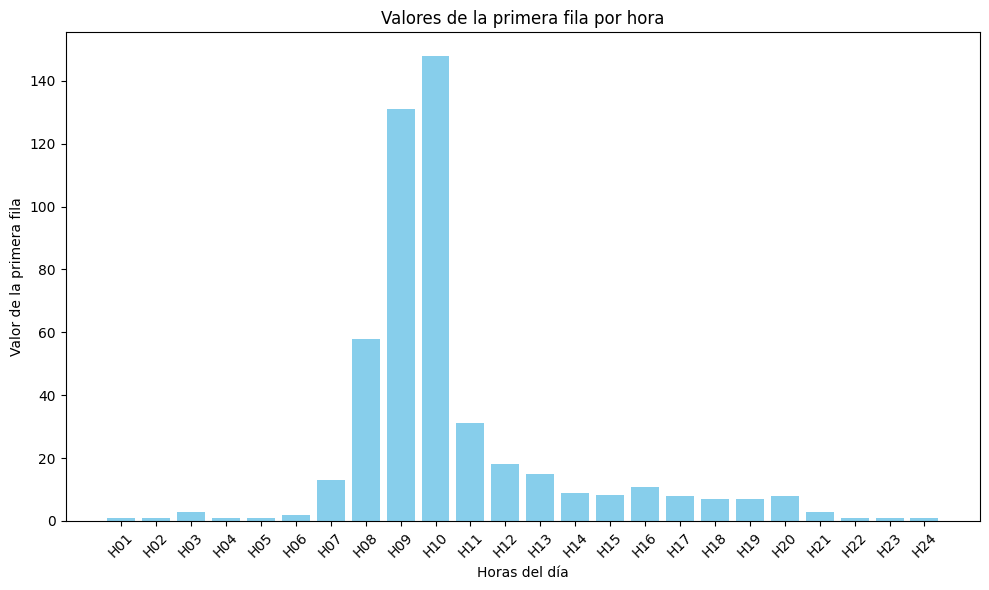

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 2. 4. 6. 6. 5. 7. 7. 8. 6. 3. 6. 3. 3. 3. 2. 2. 2. 2.]


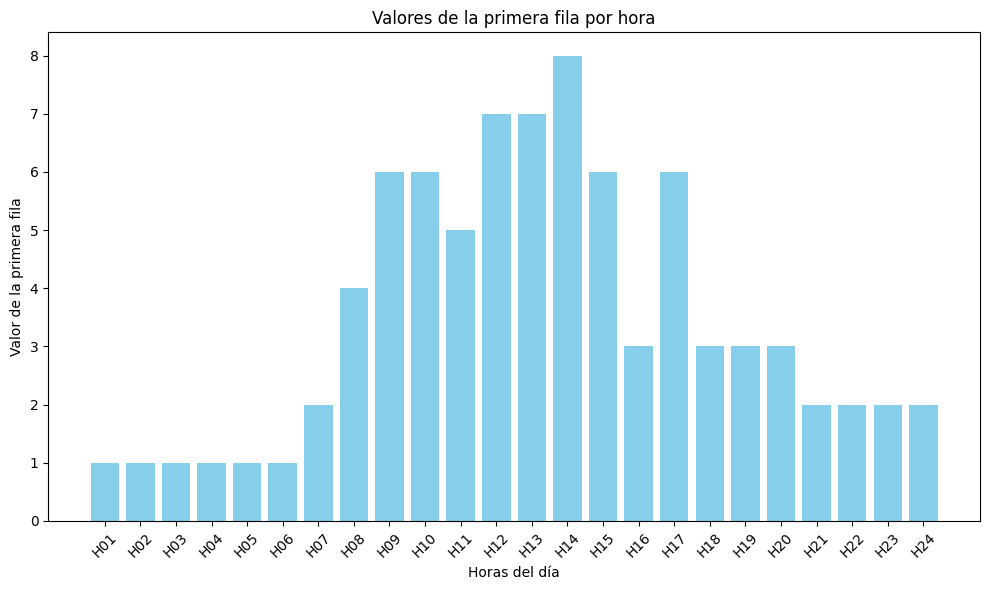

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  2.  4.  1.  1.  1.  3.  9. 16. 13. 10.  6. 10.  8.  5.  4.  4.
  3.  2.  2.  1.  2.  2.]


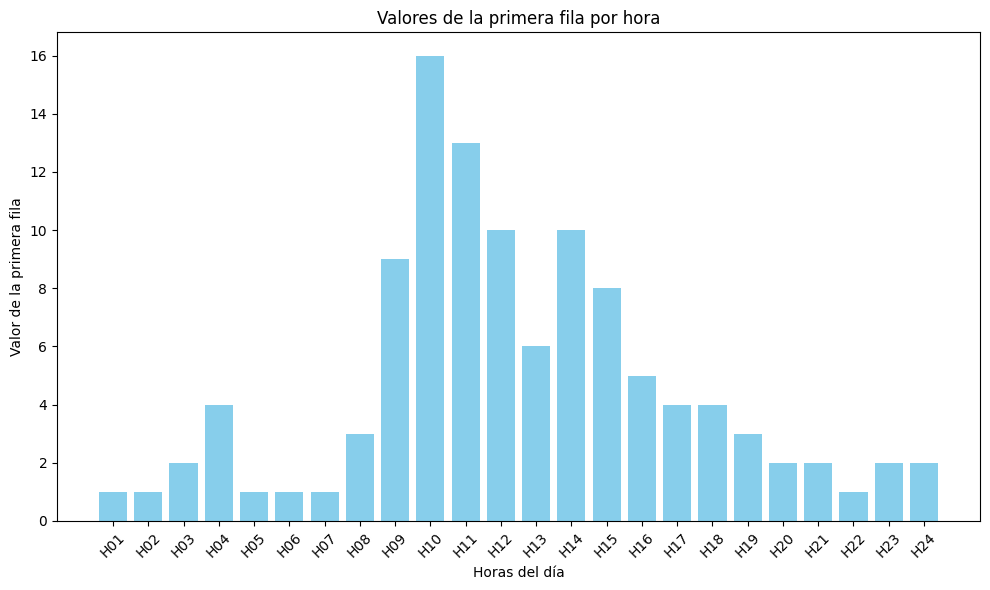

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  1.  8.  2.  2.  8. 21. 53. 83. 81. 72. 31. 17.  6.  4.  5.  5.  5.
  3.  3.  2.  2.  1.  2.]


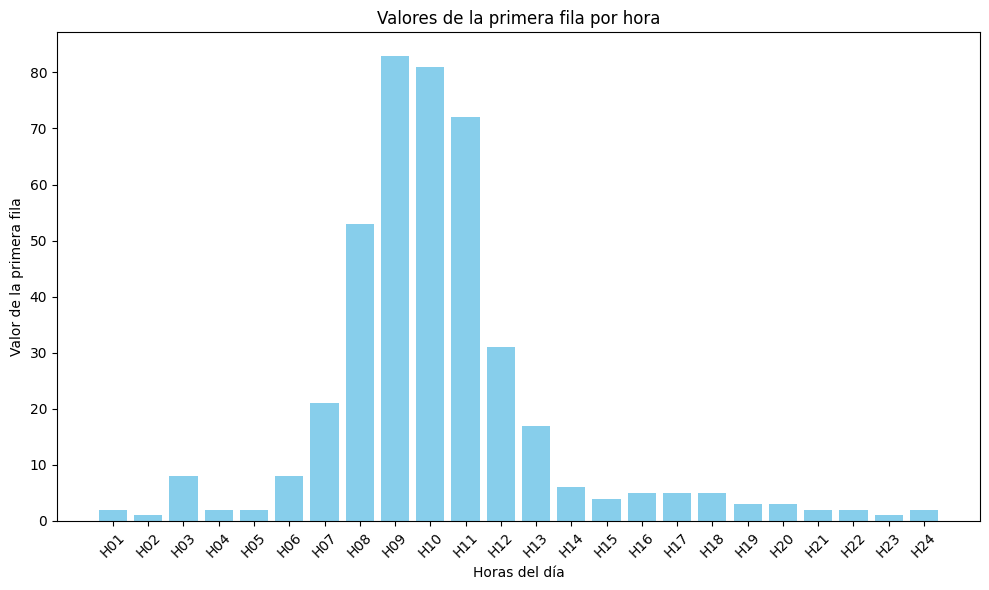

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 5. 3. 6. 7. 5. 4. 5. 3. 3. 5. 4. 4. 6. 2. 2. 1. 3.]


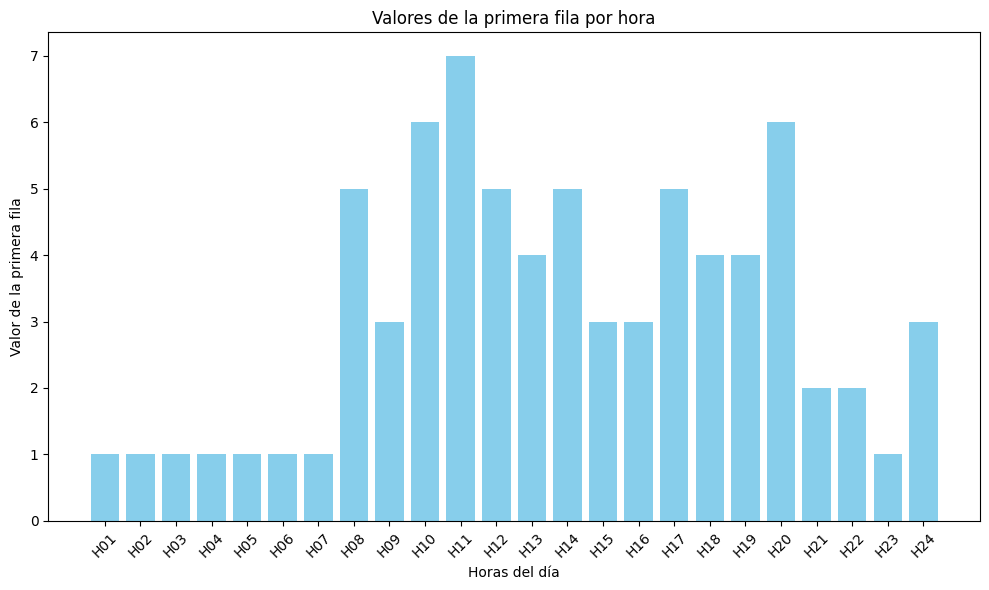

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [22.  9.  1.  1.  1.  1.  1.  4.  1.  2.  3.  2.  3.  2.  3.  2.  1.  2.
  2.  2.  2.  2.  2.  7.]


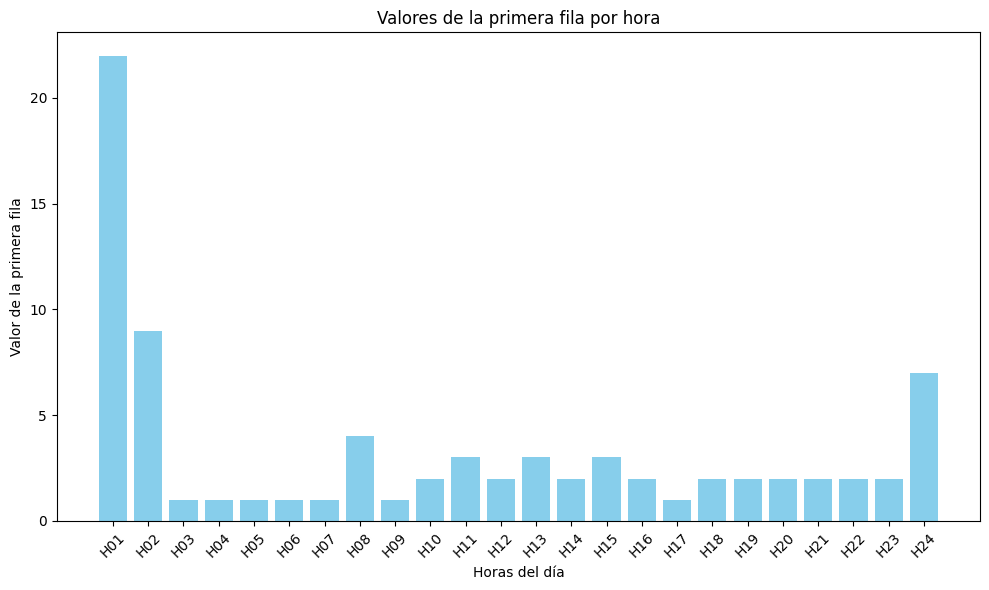

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  2.  2.  2.  1.  4. 19. 57. 77. 87. 56. 13. 20.  9.  5.  5.  5.  6.
 12.  7.  5.  5.  2.  2.]


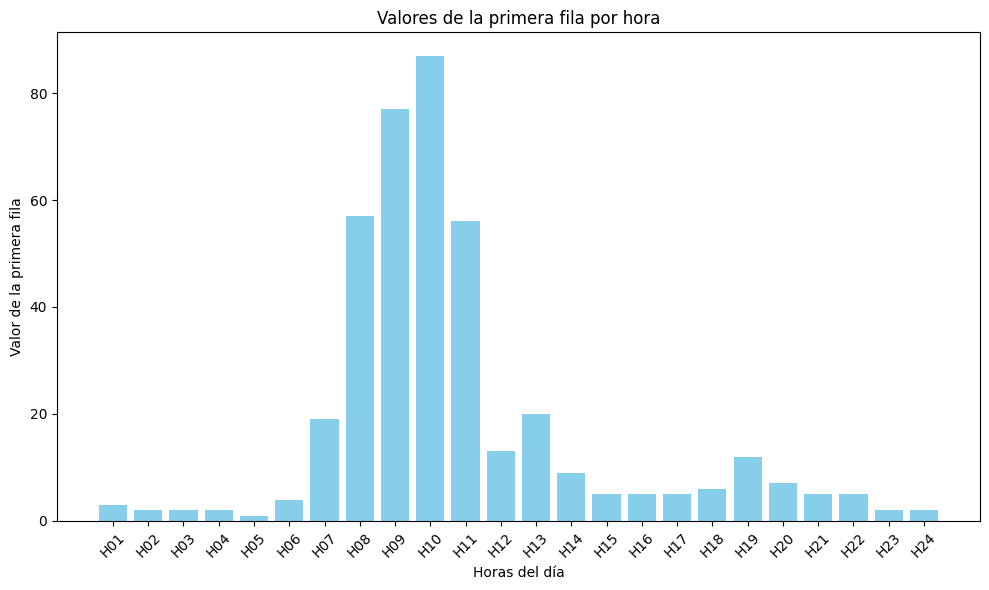

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  6.  3.  2.  1.  2.  9. 32. 58. 57.  6.  6.  4.  4.  4.  3.  3.  2.
  3.  6.  8.  3.  3.  3.]


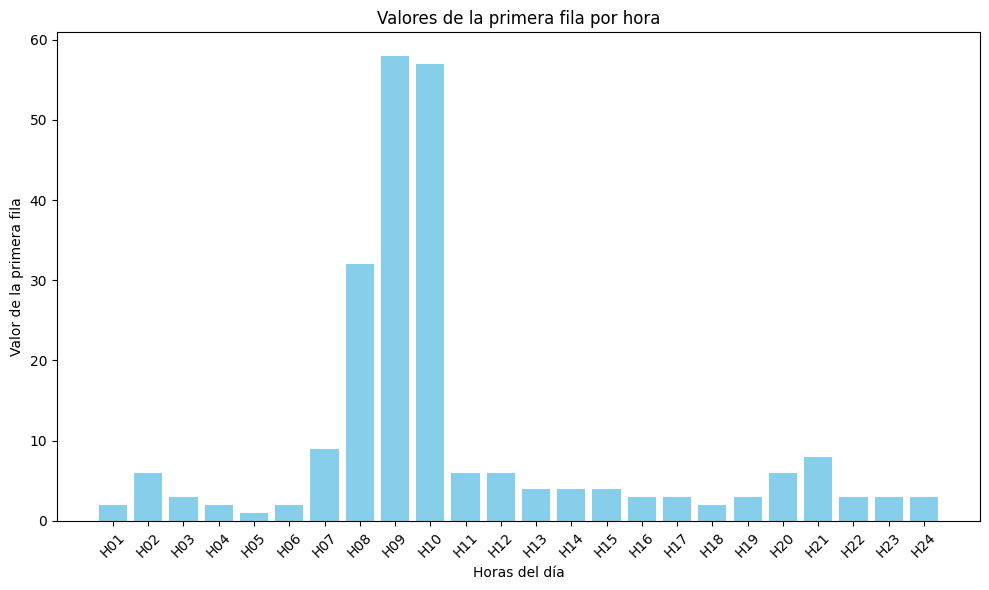

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  4.  1.  2.  1.  1.  2. 13. 19. 17. 12. 13. 17. 22. 20.  7.  5.  7.
  5. 13.  2.  3.  7. 20.]


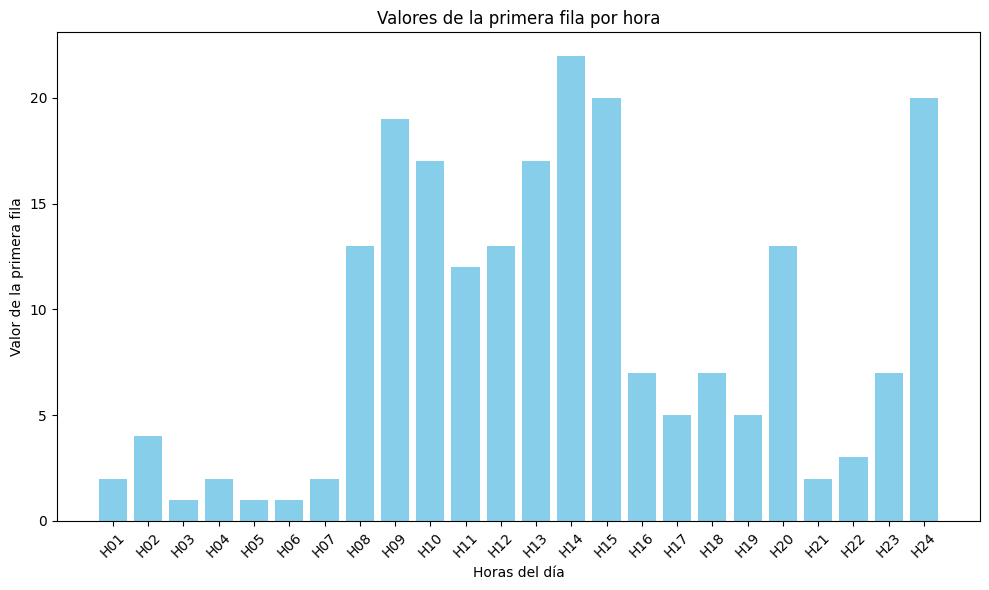

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10.  6.  4.  2.  1.  1.  3. 11. 12. 10. 11.  8.  6.  5.  4.  7.  5.  3.
  2.  4.  1.  1.  2.  1.]


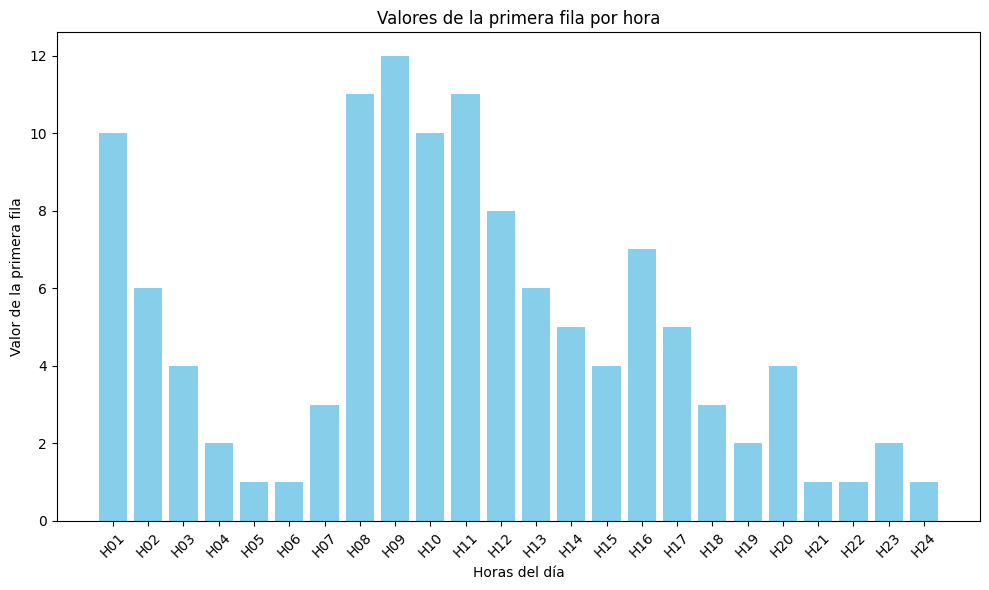

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  4.  6.  3.  2.  1.  1.  5.  7. 10.  9. 10.  9. 11.  8.  6.  6.  6.
  4.  4.  1.  1.  1.  1.]


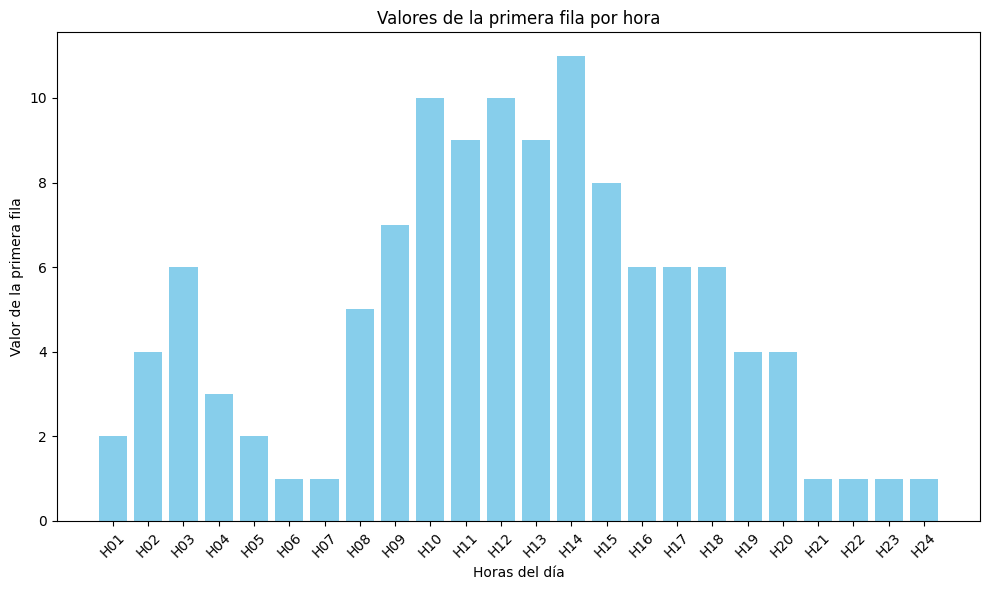

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  2.  2.  2.  2.  7. 12. 11.  6.  6.  5.  3.  5.  3.  3.  2.
  2.  2.  2.  1.  2.  1.]


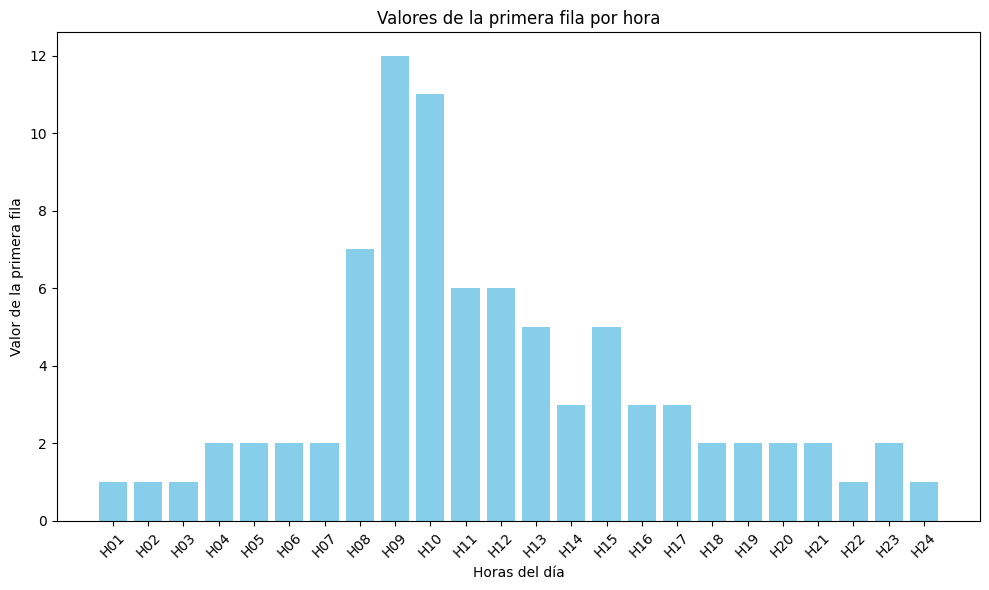

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  8. 23.  5.  4.  2.  1.  5.  9. 11.  9.  2.  1.  1.  2.  1.  1.  2.
  2.  1.  1.  1.  1.  1.]


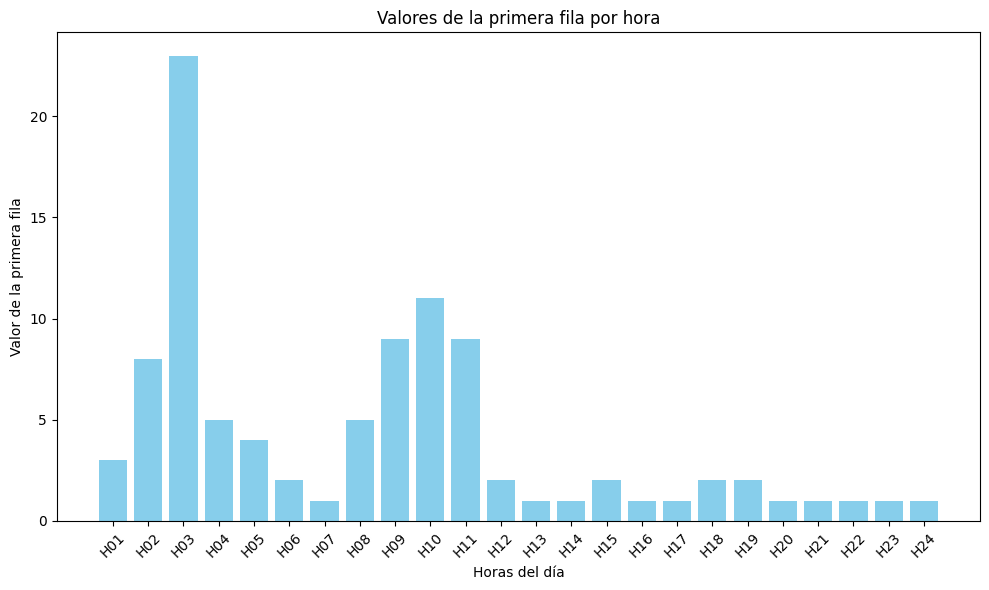

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  2.  1.  2. 11. 19. 17. 17.  3.  3.  5.  3.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.]


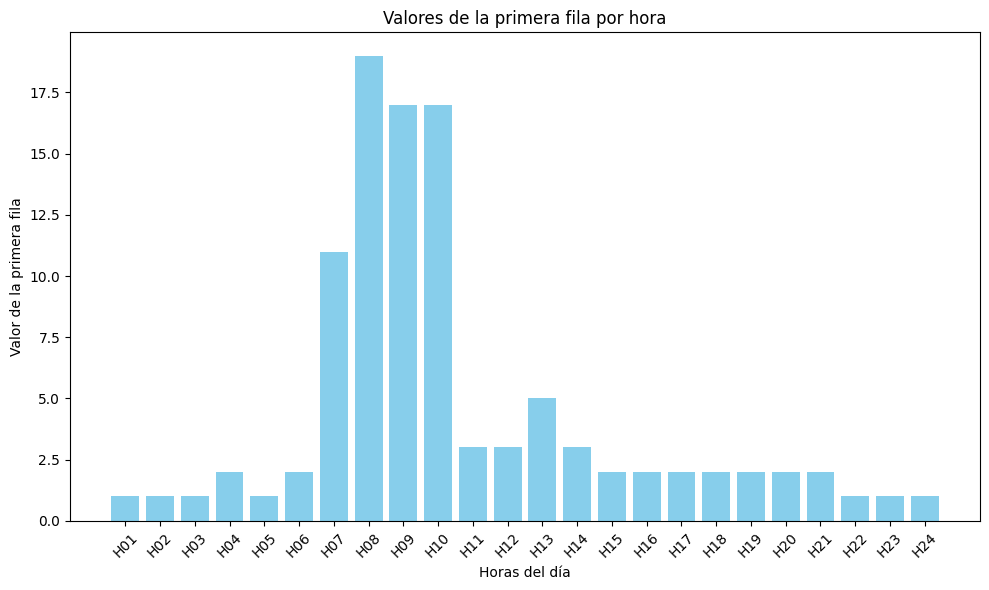

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.          1.          2.          1.          1.          3.
  3.          9.         24.         23.         12.          3.
  3.          3.66666667  3.66666667  4.          3.          3.
  6.          2.          2.          1.          1.          1.        ]


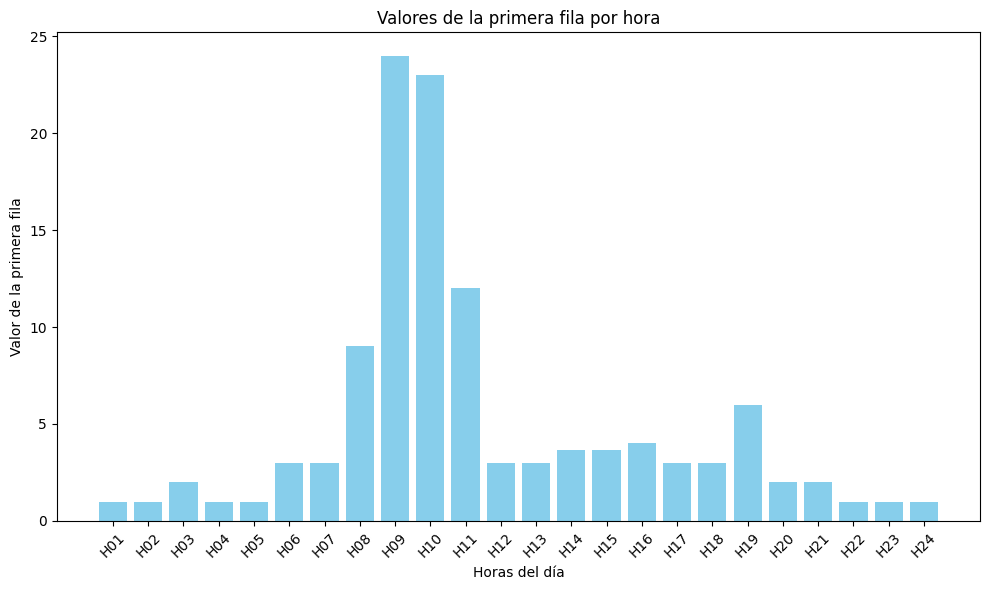

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  2.  2.  4. 14. 43. 55. 31.  5.  3.  3.  2.  3.  3.  2.  3.
  2.  3.  2.  2.  1.  1.]


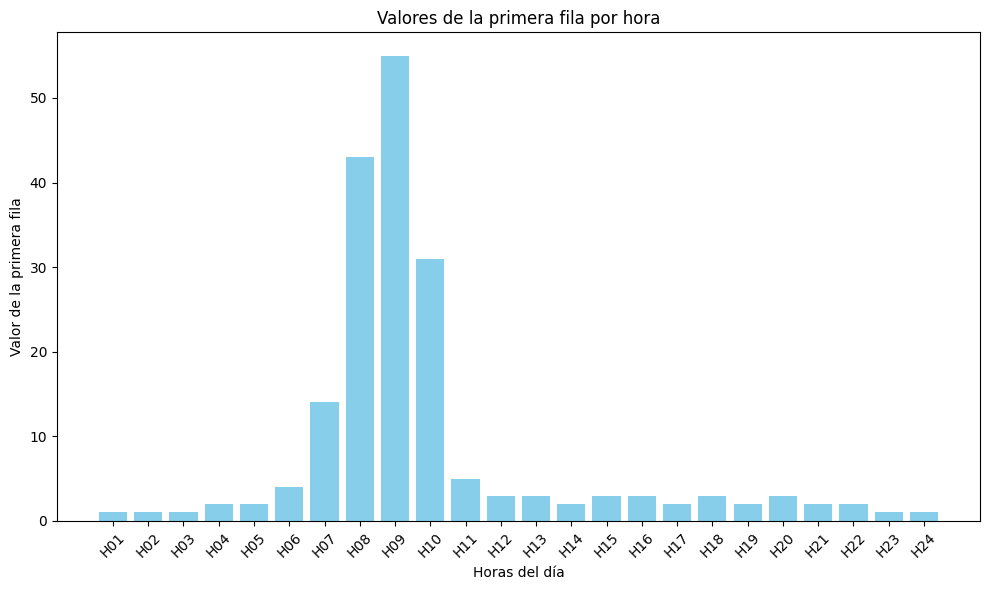

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 2. 1. 1. 1. 2. 2. 4. 5. 3. 3. 3. 3. 2. 1. 2. 1. 3. 1. 1. 2. 1. 1.]


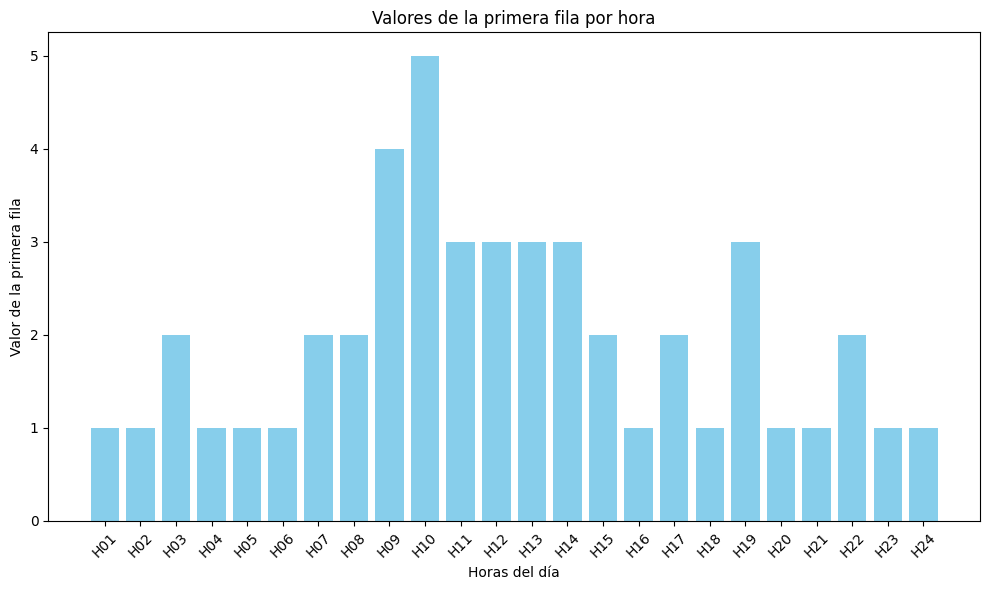

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


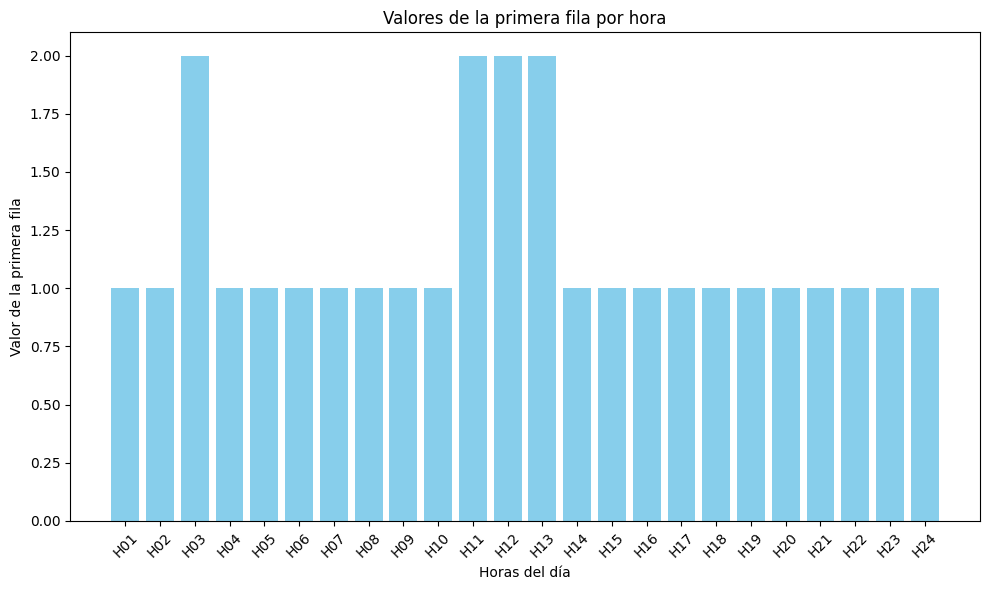

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 2. 5. 1. 1. 1. 1. 1. 2. 3. 2. 2. 2. 2. 1. 1. 1. 3. 2. 1. 1. 1. 1. 1.]


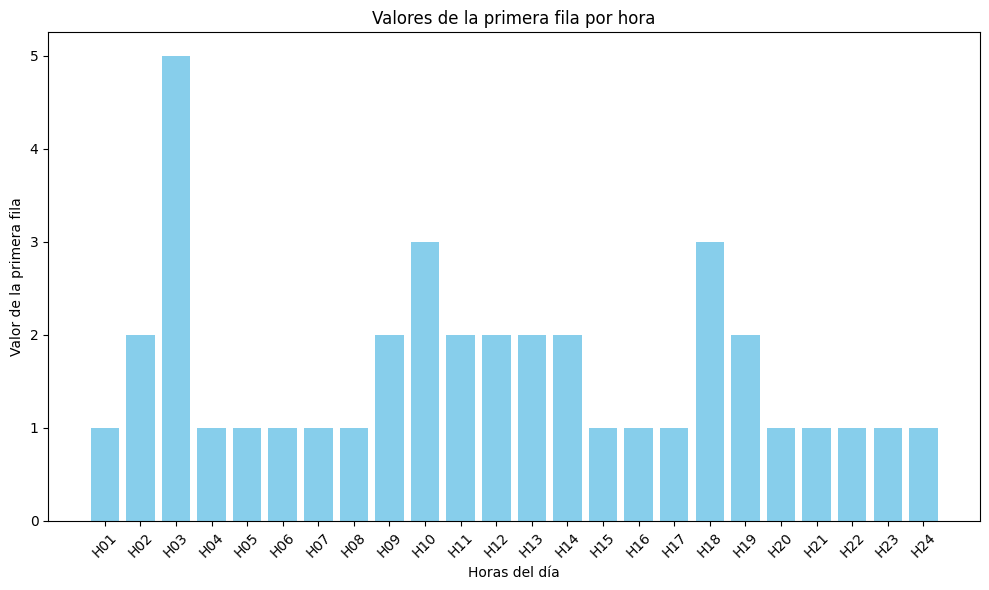

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


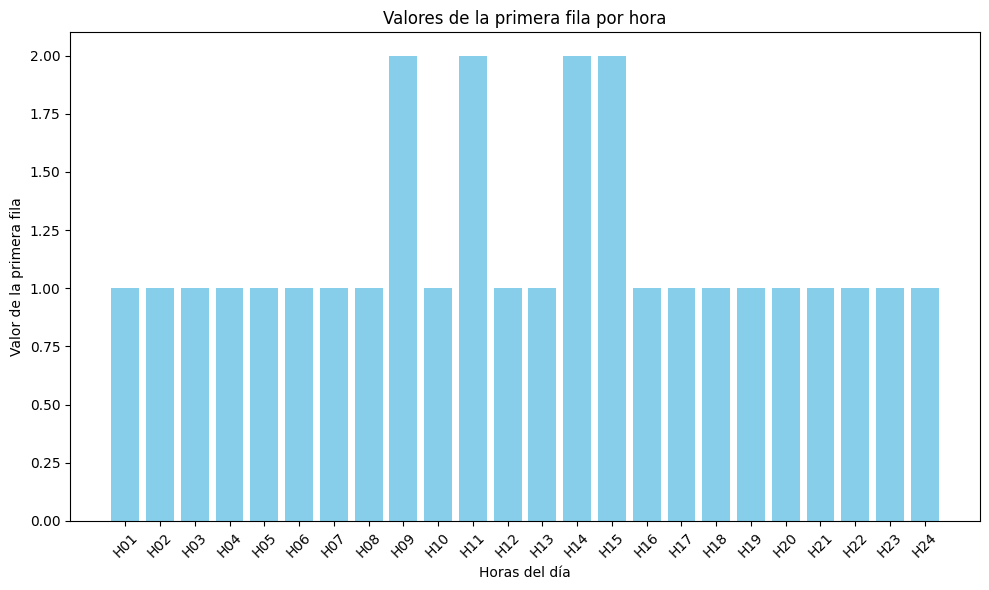

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1.]


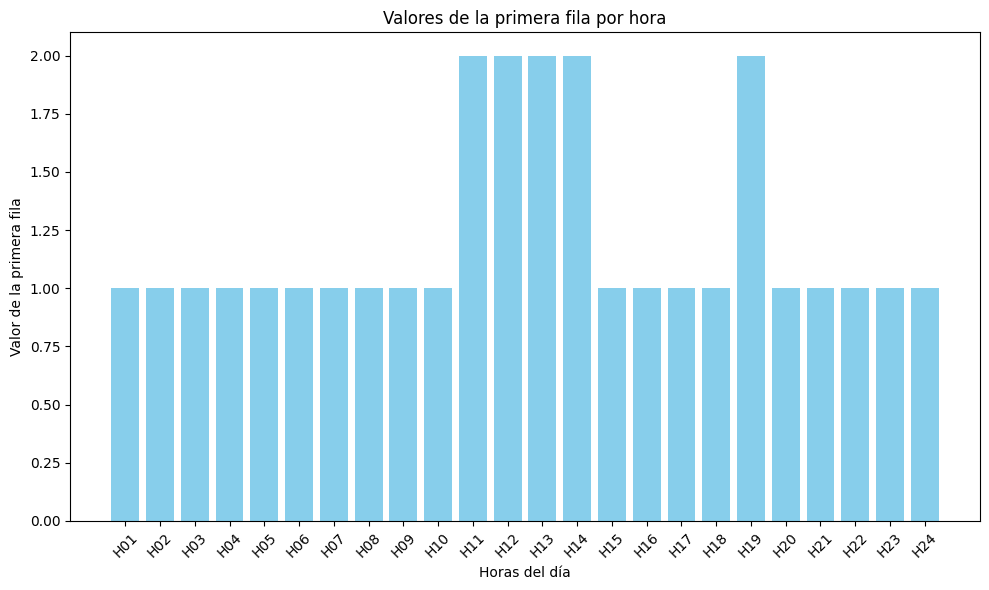

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  3.  1.  2.  2. 10. 25. 49. 61. 23. 31.  9. 12.  8.  7.  7.  5.
  5.  7.  4.  3.  2.  1.]


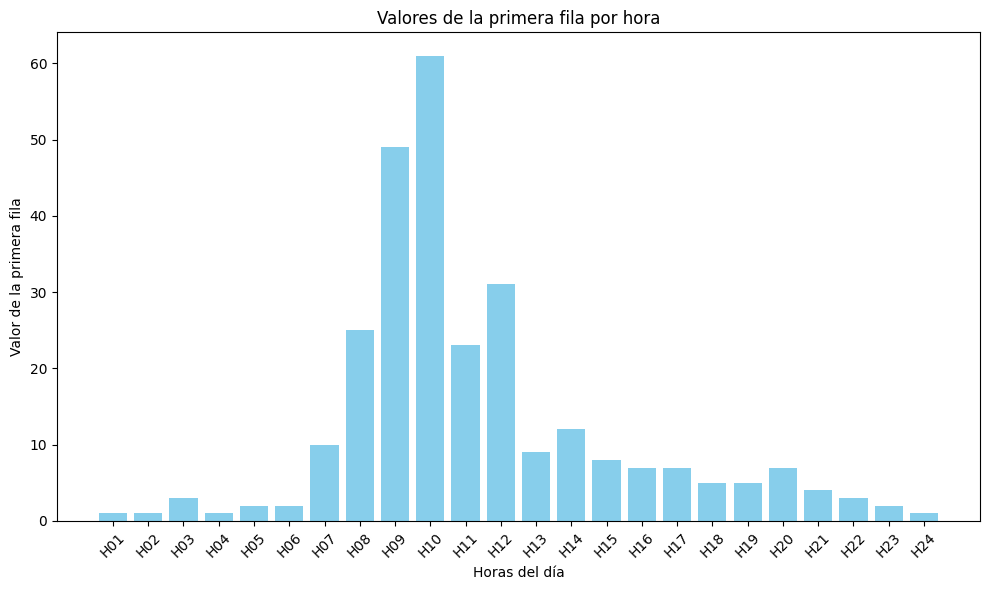

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  2.  3.  1.  1.  2.  3.  7.  7.  9.  8. 12. 12. 12.  7.  7.  9.  6.
  6.  5.  4.  2.  2.  2.]


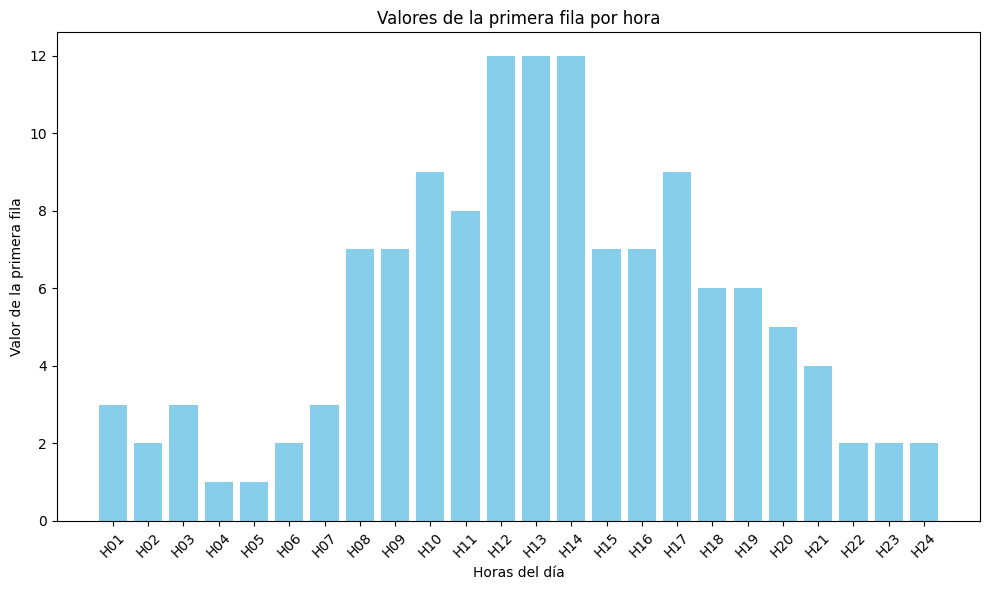

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  1.  2.  1.  1.  2.  2.  8. 23. 15. 12. 11. 14.  7.  6.  6.  4. 10.
 10. 12.  4.  7.  3.  1.]


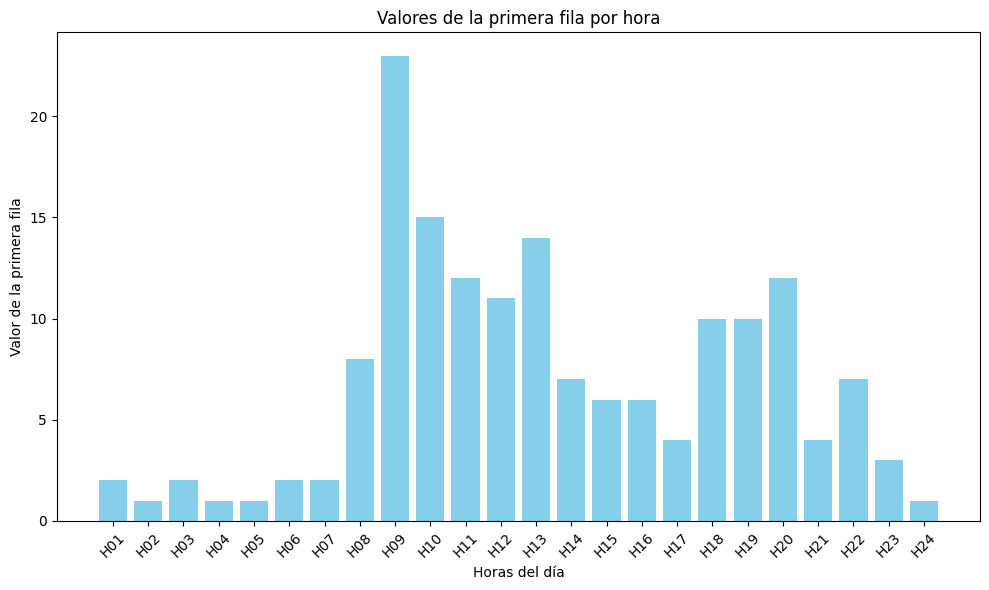

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  2.  1.  1.  1.  1.  3.  2.  6.  8.  7. 14. 12.  7.  4.  4.  3.  3.
  3.  3.  2.  2.  1.  2.]


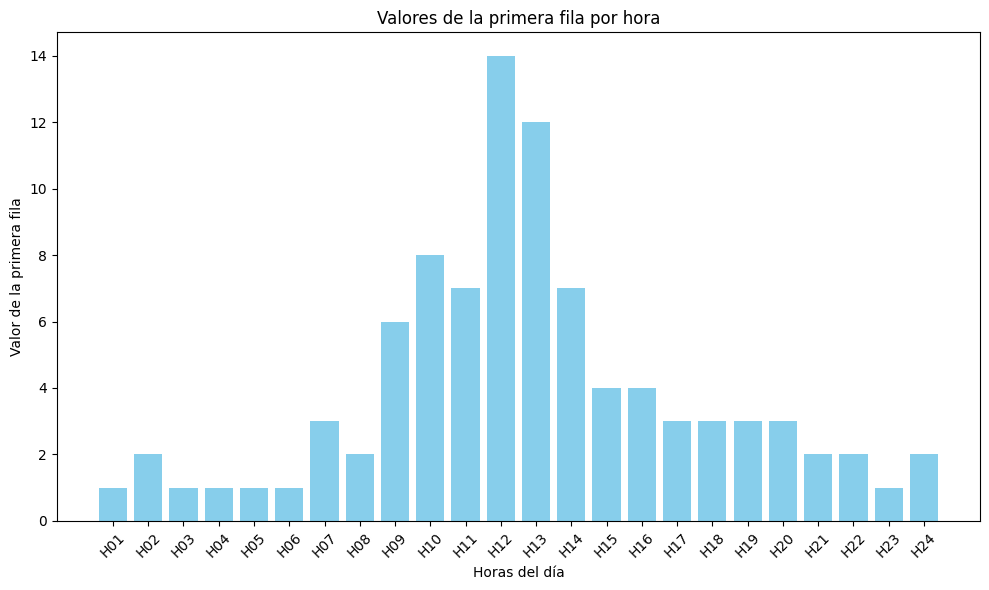

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  5.  3.  7.  6.  4.  2.  8. 10. 11.  6.  6.  6.  5.  5.  3.  2.  4.
  2.  2.  2.  3.  1.  1.]


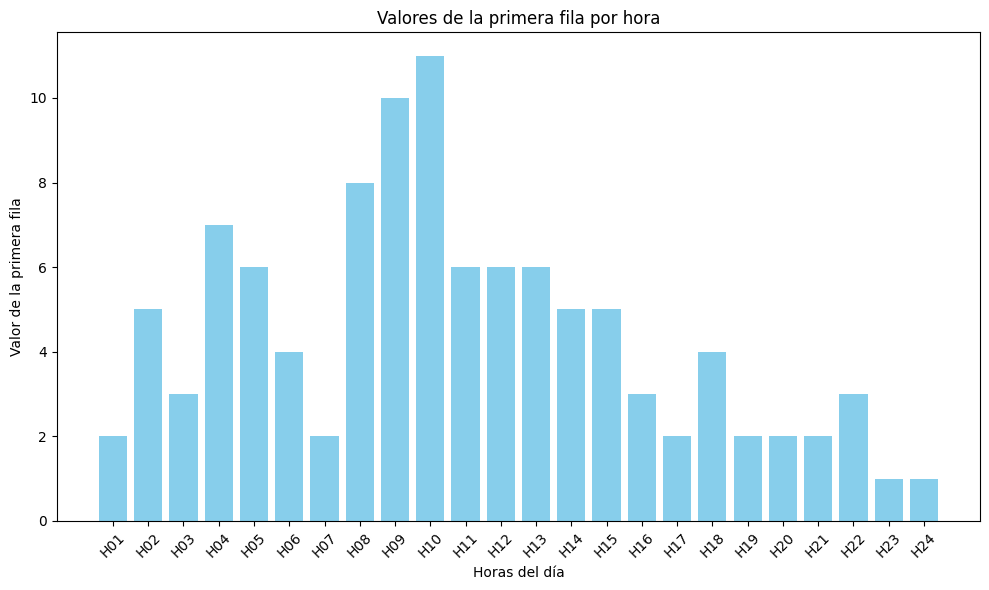

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.          1.          2.          5.         14.         12.
  4.          7.66666667 18.33333333 14.         11.66666667  8.33333333
  9.33333333  6.          6.          5.33333333  5.66666667  9.66666667
  7.33333333  7.33333333  3.66666667  5.          2.33333333  1.66666667]


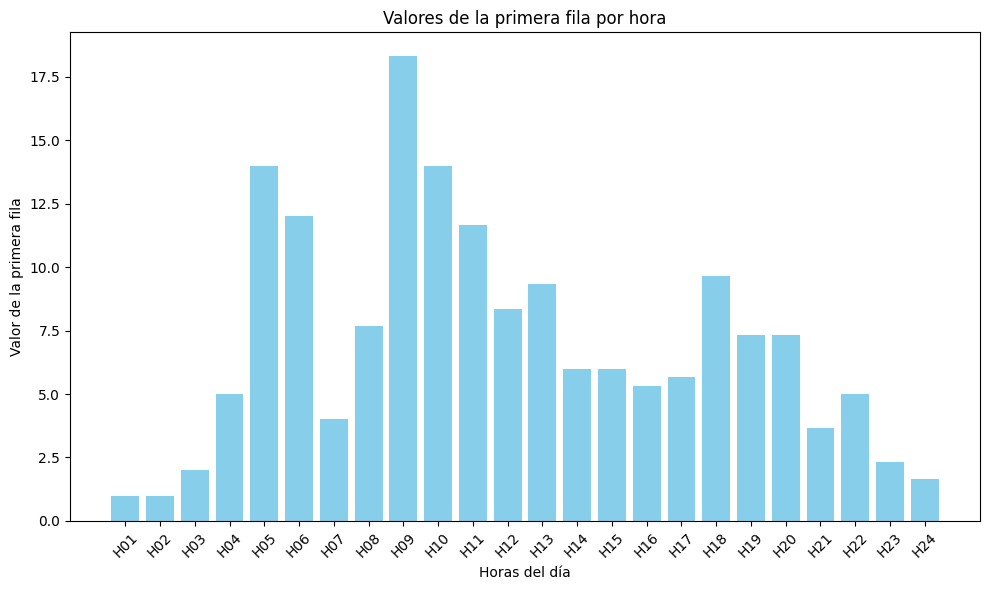

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  2.  5. 14. 13. 18. 12. 13.  6.  5.  4.  4.  5.
 11.  7.  4.  3.  2.  2.]


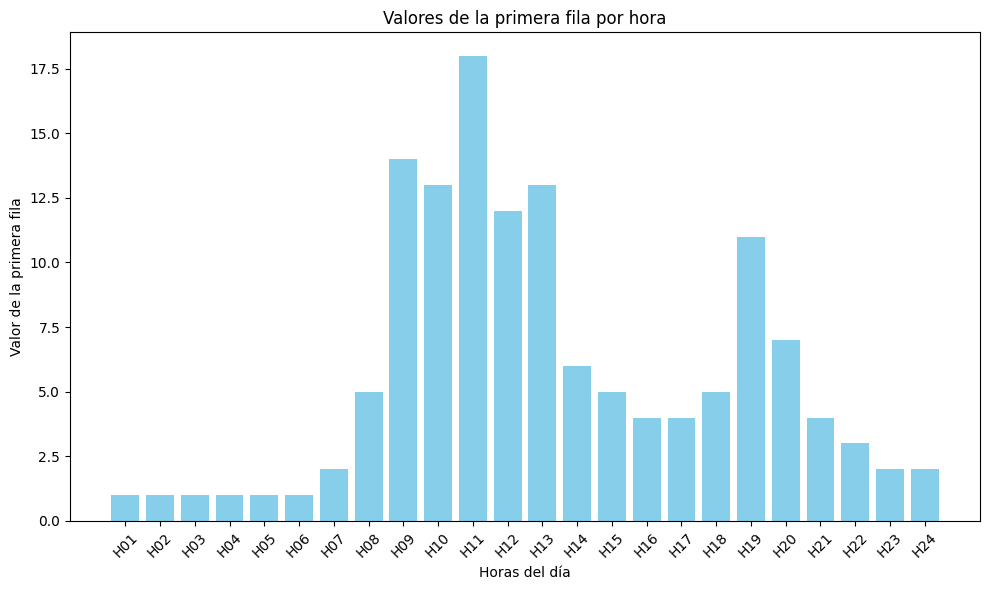

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  3.  1.  2.  2.  2.  4.  7. 22. 16. 17.  8.  8.  6.  7.  7. 11. 15.
 10.  8.  5.  5.  3.  3.]


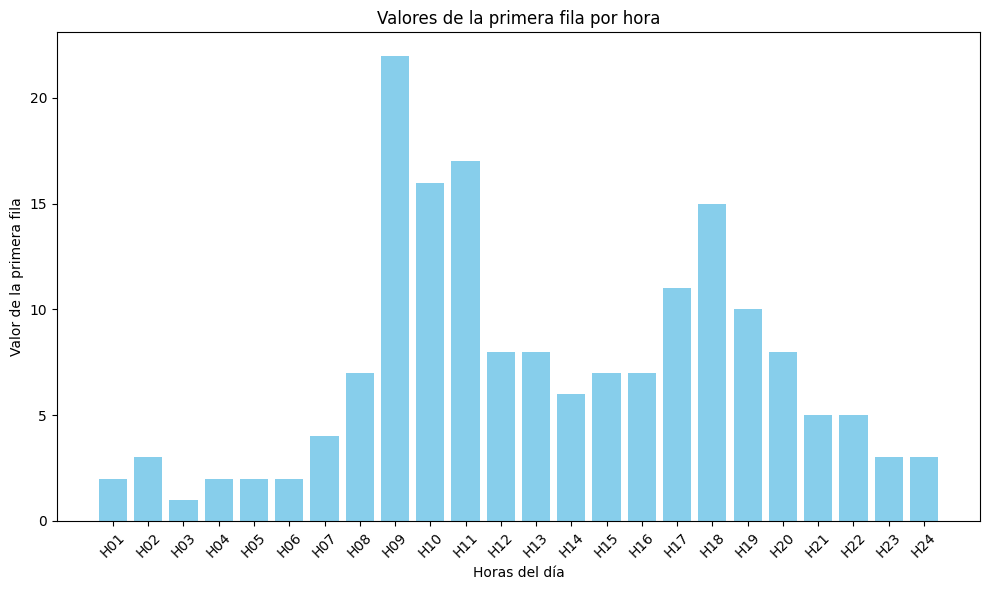

In [288]:
#Poblenou
df_o3_poblenou=df_o3[df_o3["ESTACIO"] == 4]
for i in range(0, 29):
   plotear_ozono(df_o3_poblenou, i)


Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.          1.          1.          1.          1.          2.
  7.         17.         38.         36.         18.33333333 14.46666667
  0.46666667  0.56666667  5.          6.          7.          6.
  6.          8.          1.          1.          1.          1.        ]


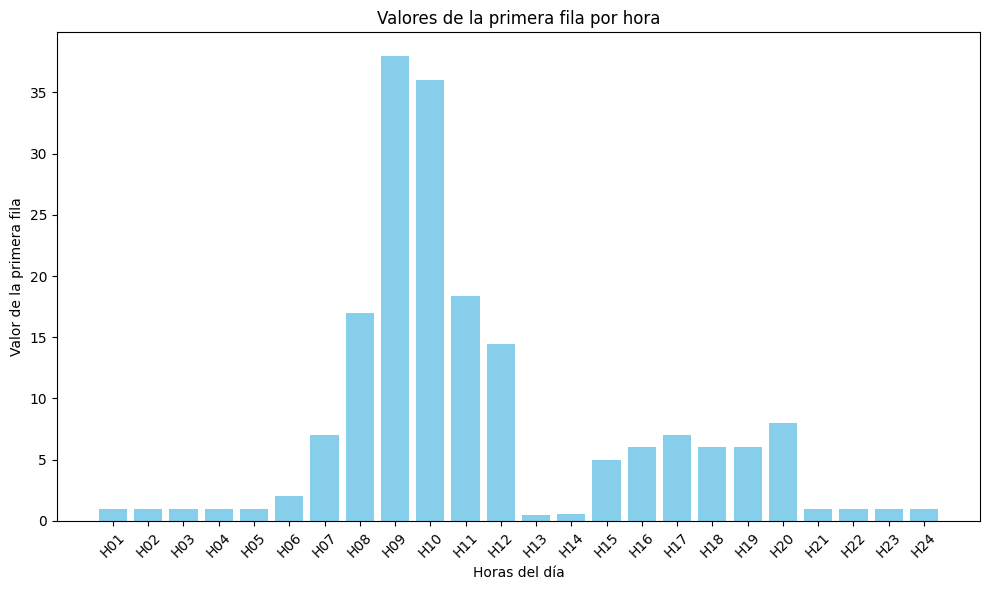

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  2.  1.  4.  7.  9. 16.  8. 11.  7.  3.  4.  3.
  2.  2.  2.  2.  2.  1.]


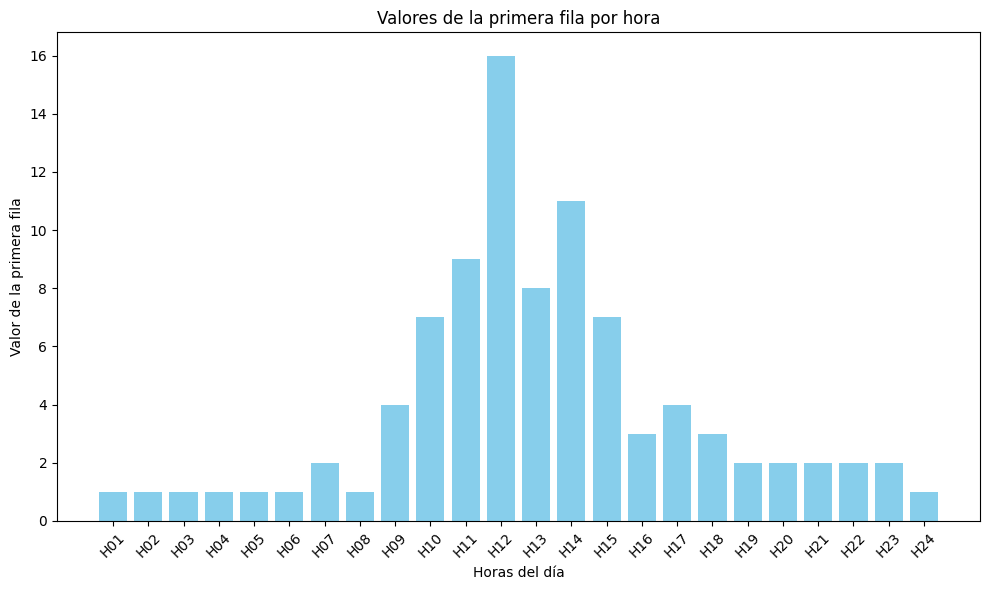

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 2. 1. 2. 6. 5. 6. 5. 4. 8. 6. 4. 3. 2. 2. 1. 1. 1. 1. 1.]


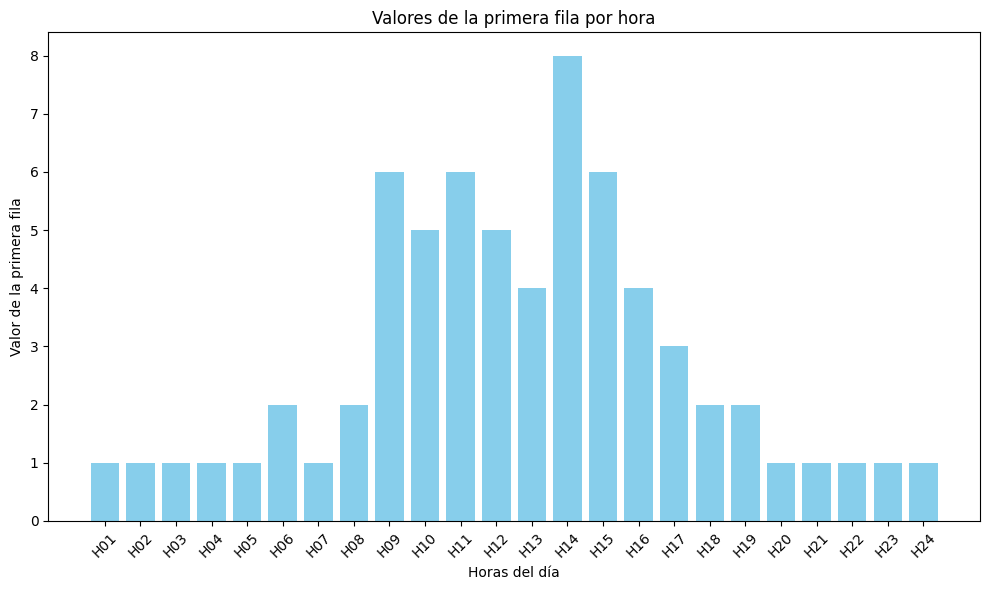

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  1.   1.   1.   6.   4.   9.  19.  48. 100. 102. 100.  43.  26.  28.
  24.  42.  24.  44.   8.   1.   1.   1.   1.   1.]


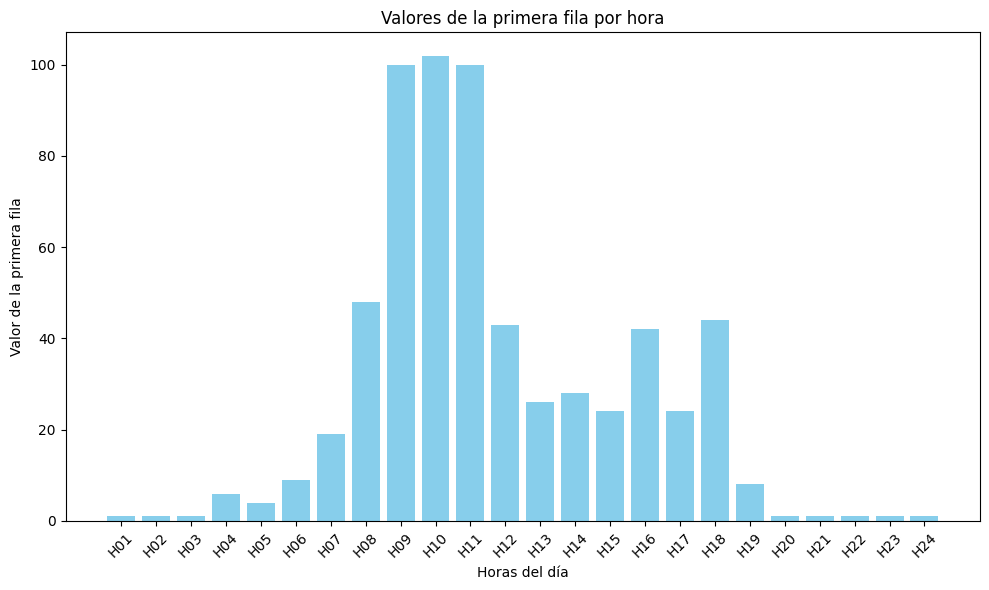

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 5. 1. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 2. 1.]


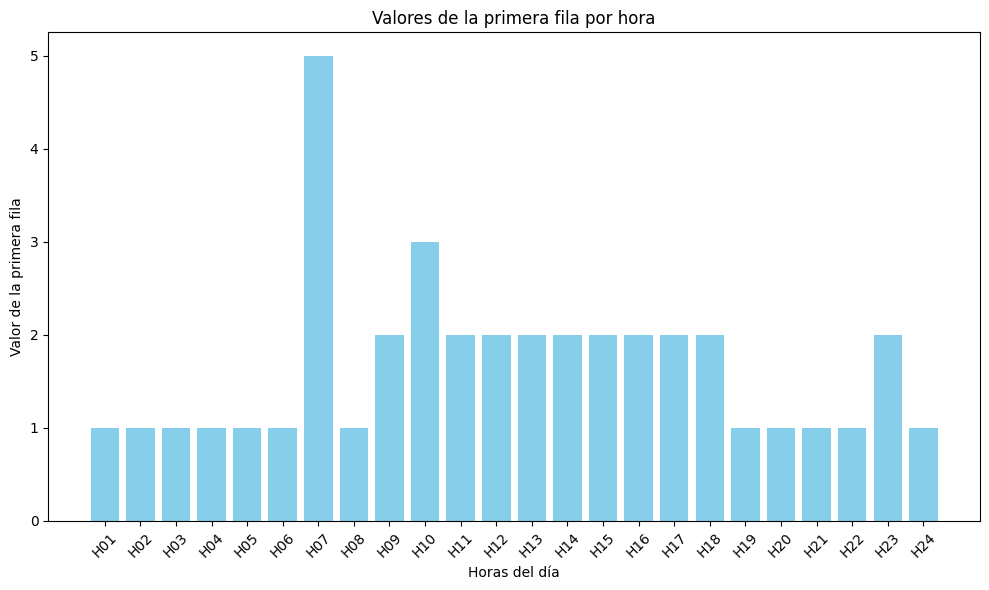

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 2. 2. 1. 6. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1.]


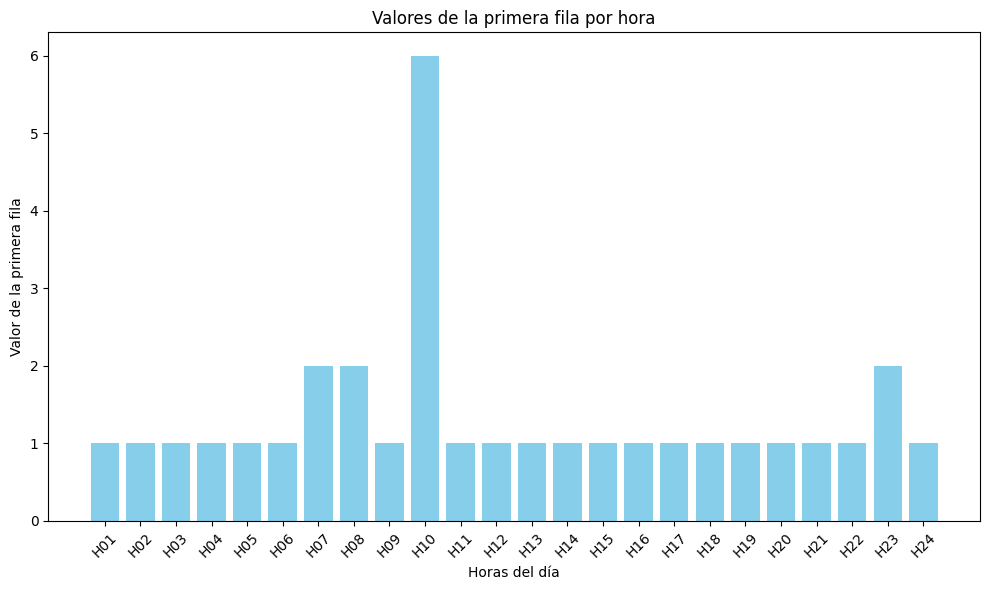

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  2. 13. 37. 89. 56.  9. 17. 39. 17. 30.  7.  8.  8.
 10.  2.  1.  1.  1.  1.]


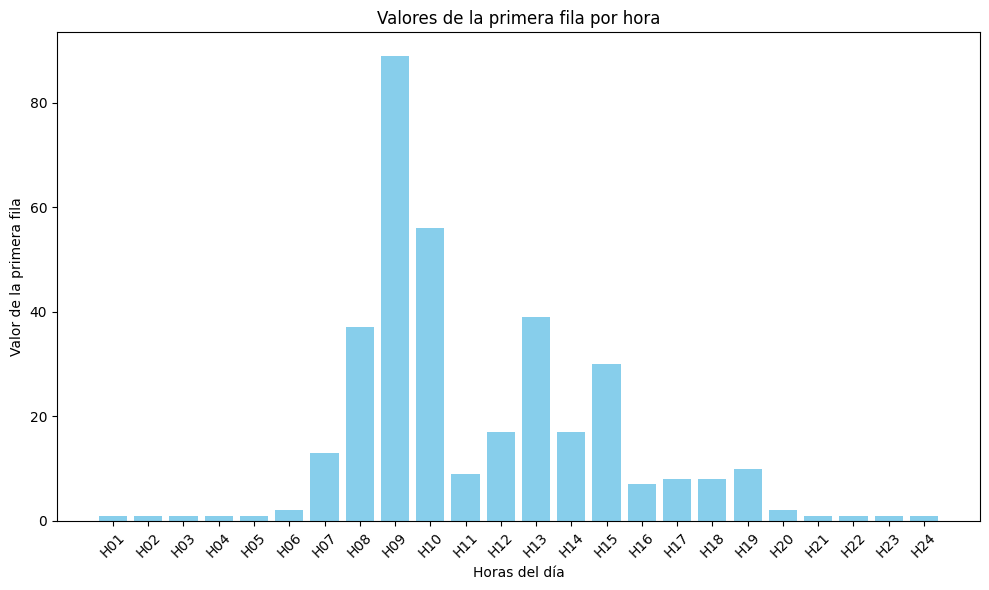

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  6.  2. 24. 44.  3.  2.  2.  9. 15.  1.  1.  1.
  1.  2. 16.  1.  1.  1.]


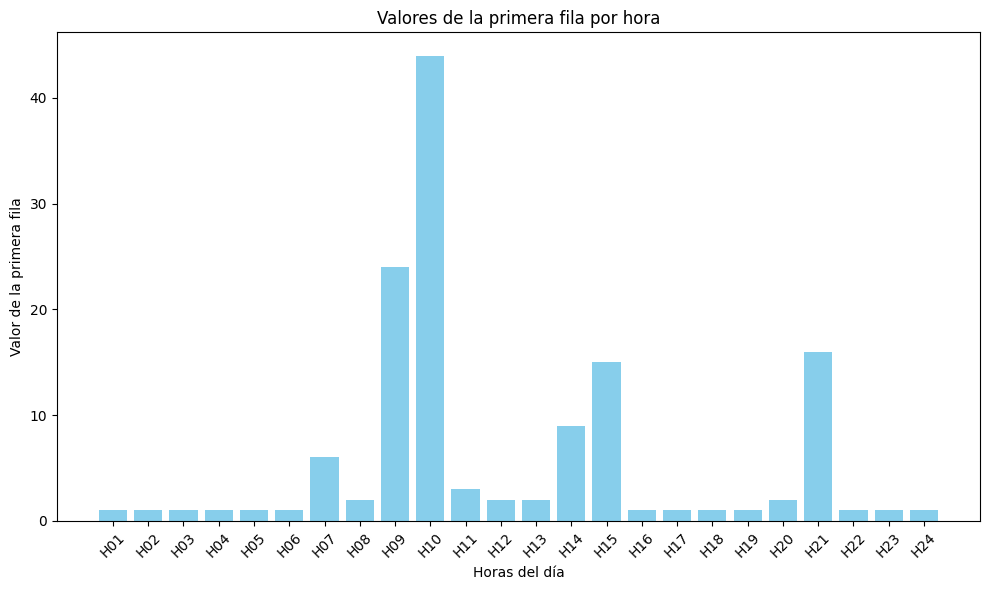

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10. 27. 22.  2.  2.  2.  1.  3. 22. 30. 10. 12. 19. 24. 17.  6.  1.  1.
  3. 16.  3.  2.  1.  1.]


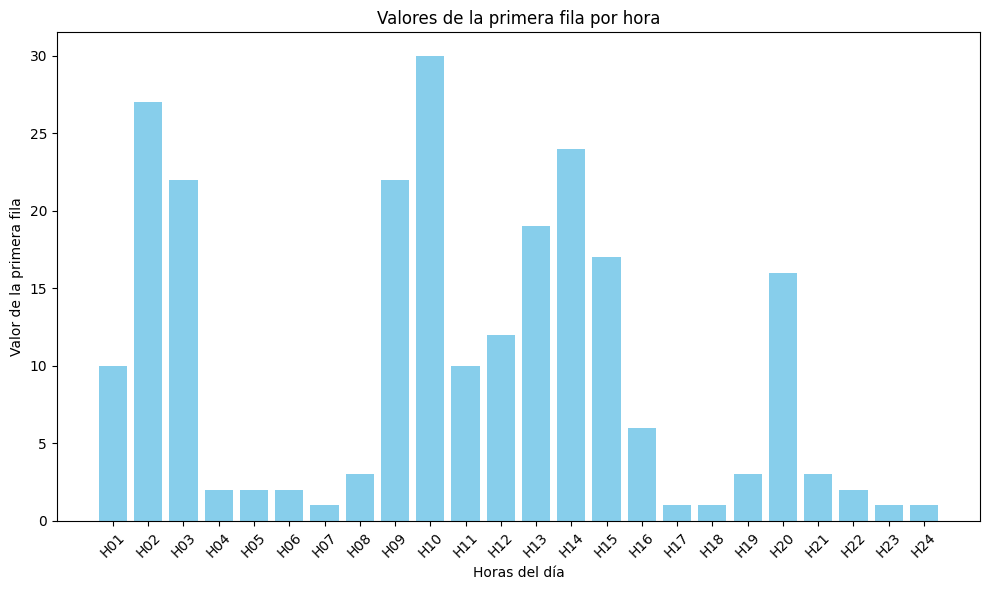

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  4. 10.  3.  2.  1.  3.  2.  9. 24.  6.  5.  4.  3.  3.  7.  3.  1.
  2.  1.  1.  1.  1.  1.]


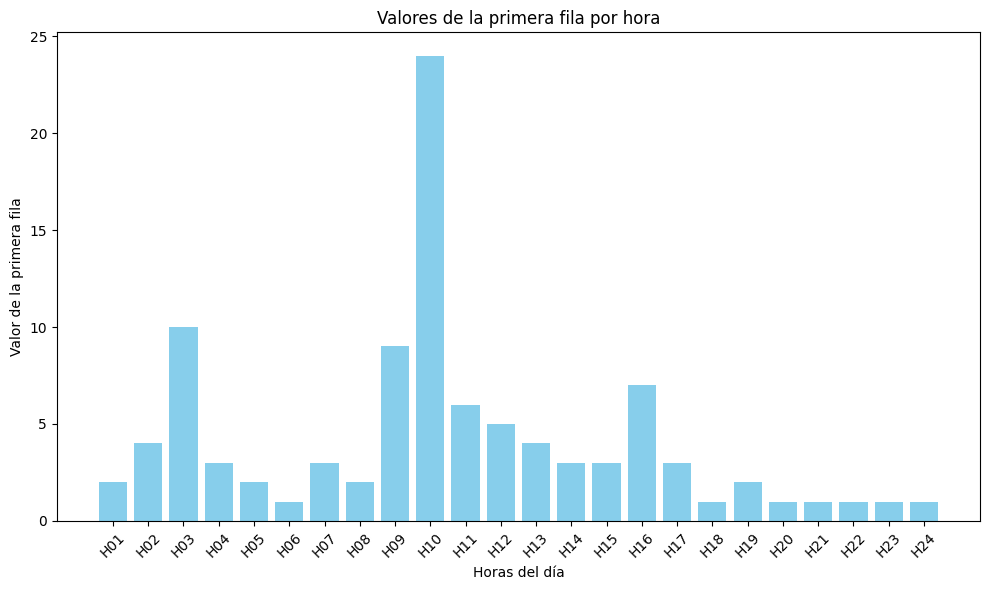

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  8. 15. 24. 21. 25. 10.  9. 10.  6.  4.  2.  1.
  1.  1.  1.  1.  1.  1.]


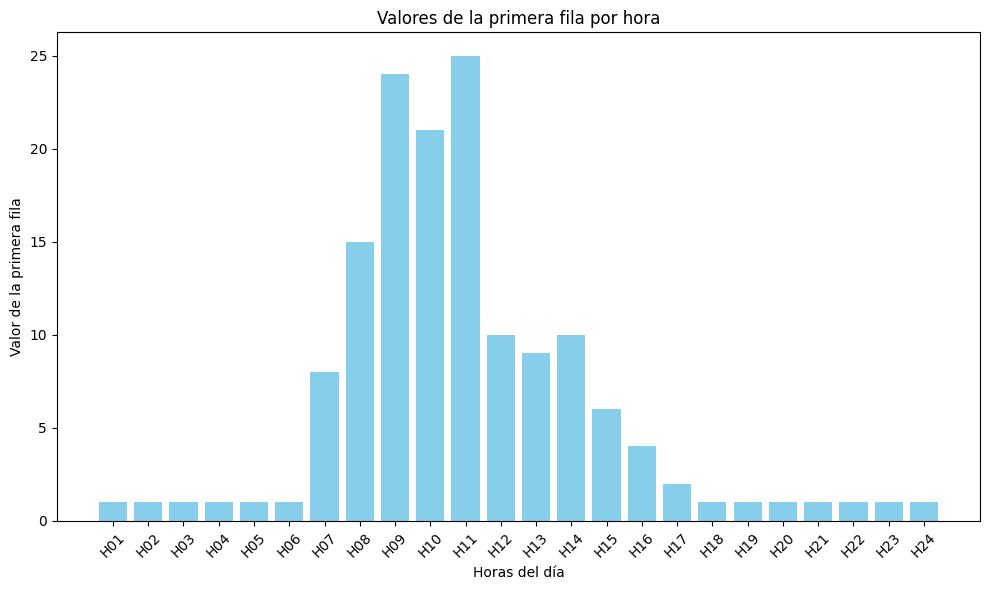

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1. 15. 25.  6.  8.  4.  8.  5.  2.  4.  3.  7.  1.
  2.  2.  1.  1.  1.  1.]


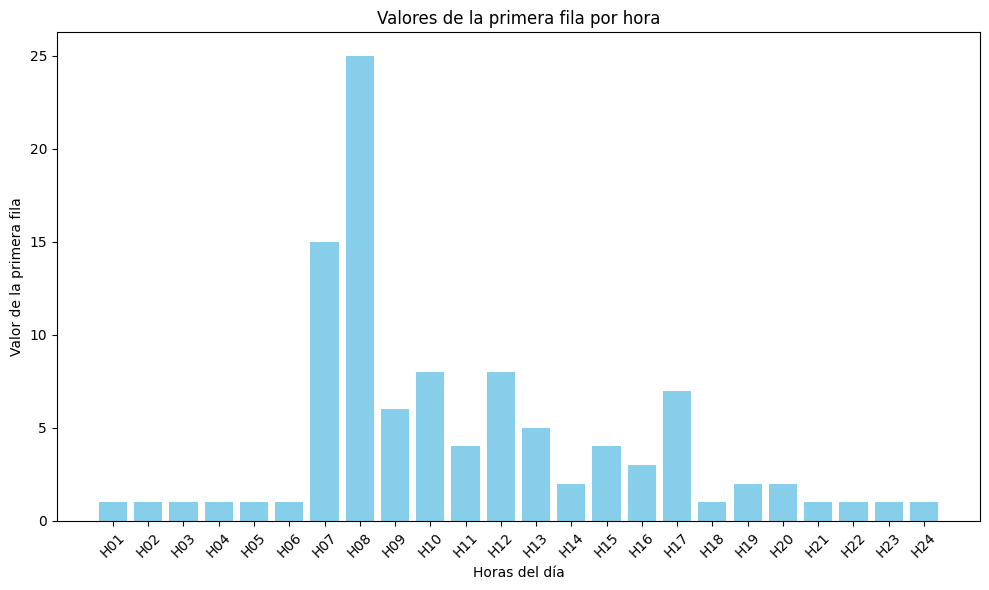

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 7. 6. 1. 1. 1. 3. 4. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


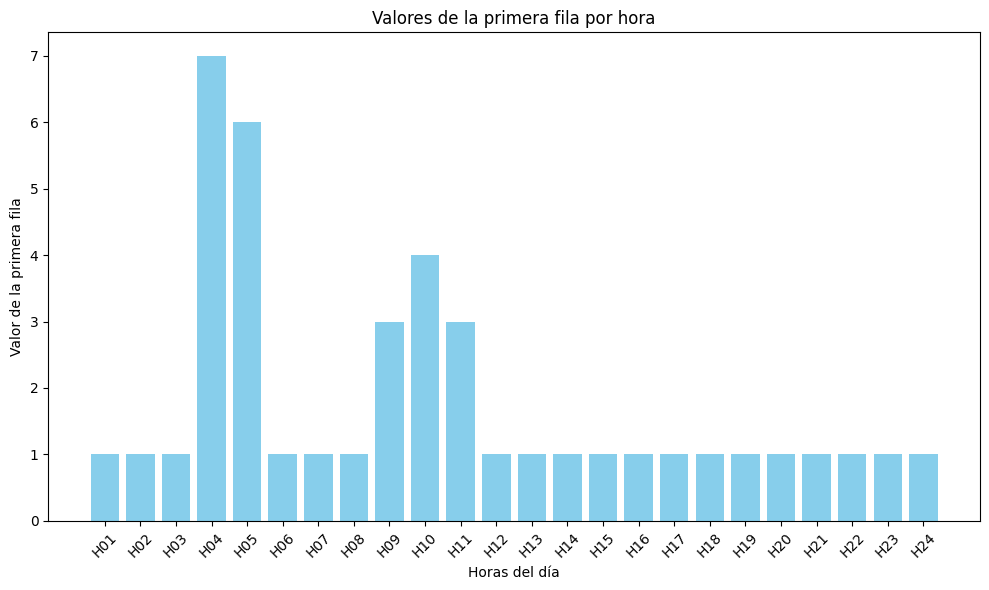

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1.         1.         1.         1.         1.         2.
 1.         2.         2.         4.         1.         9.
 1.         1.         1.33333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


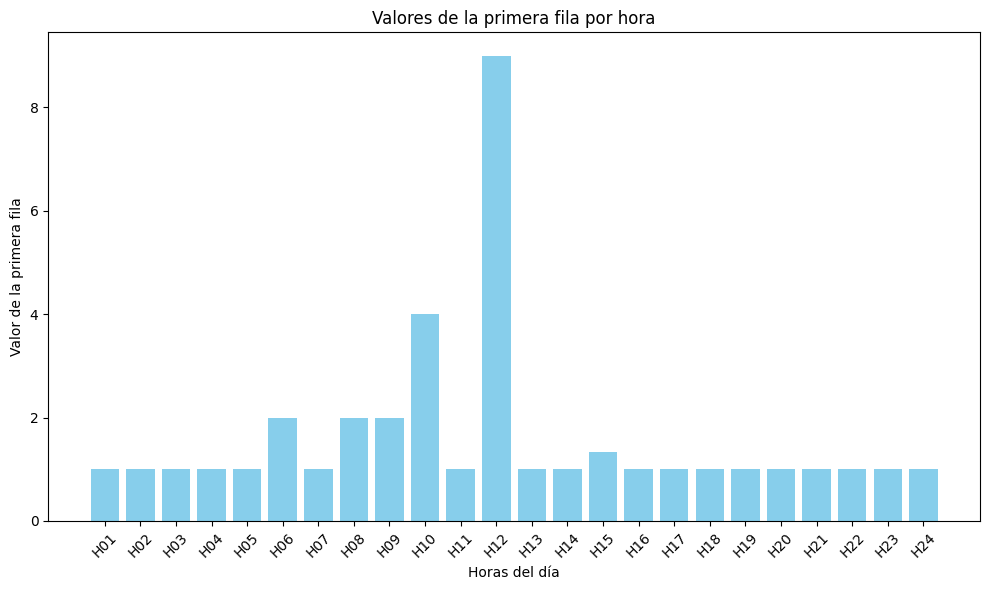

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  1.  1. 14. 12. 20.  1.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


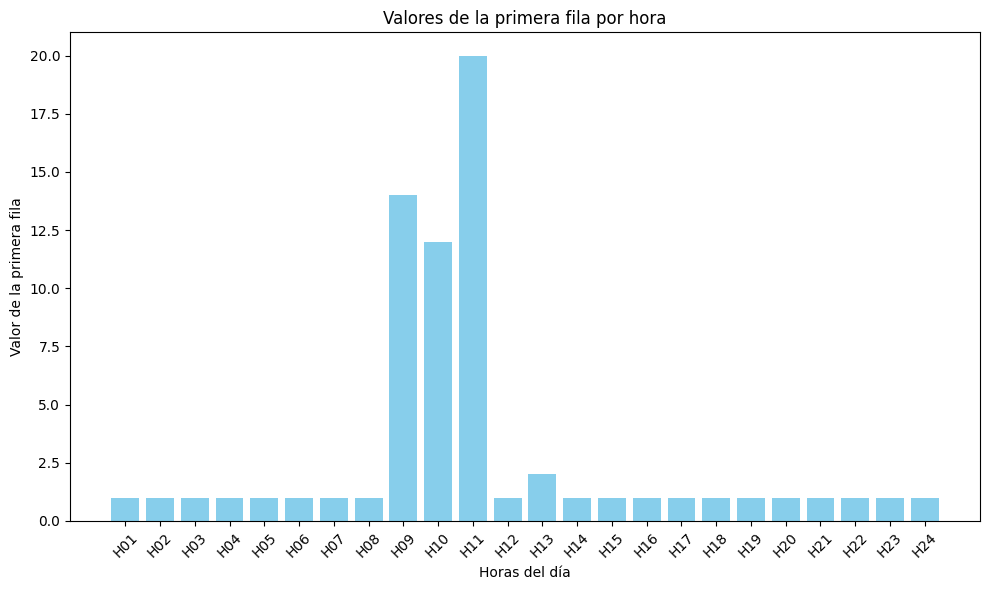

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  2.  3. 16. 34.  8.  1.  4.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


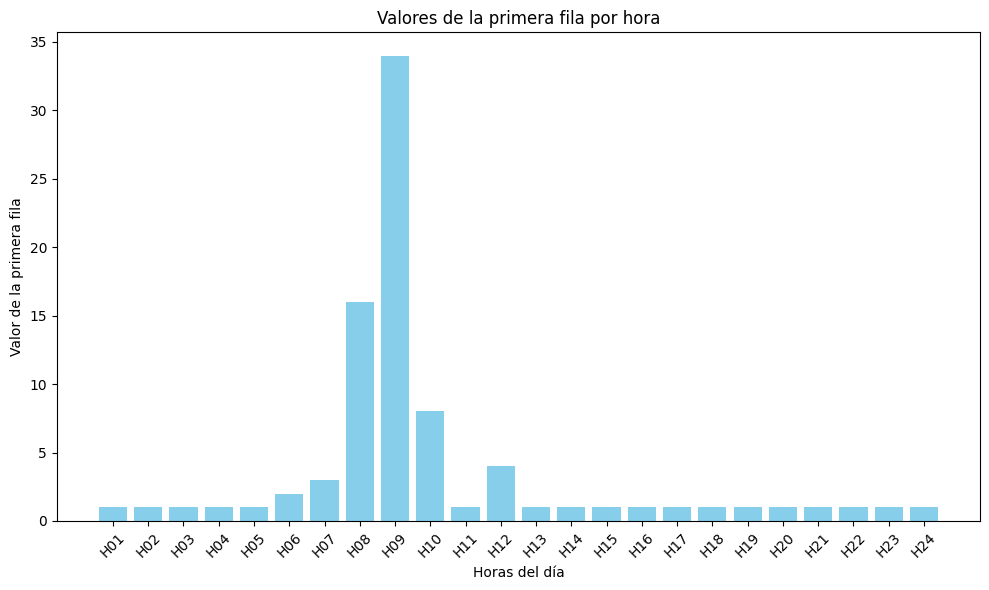

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  3.  3.  5.  2.  2. 10.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


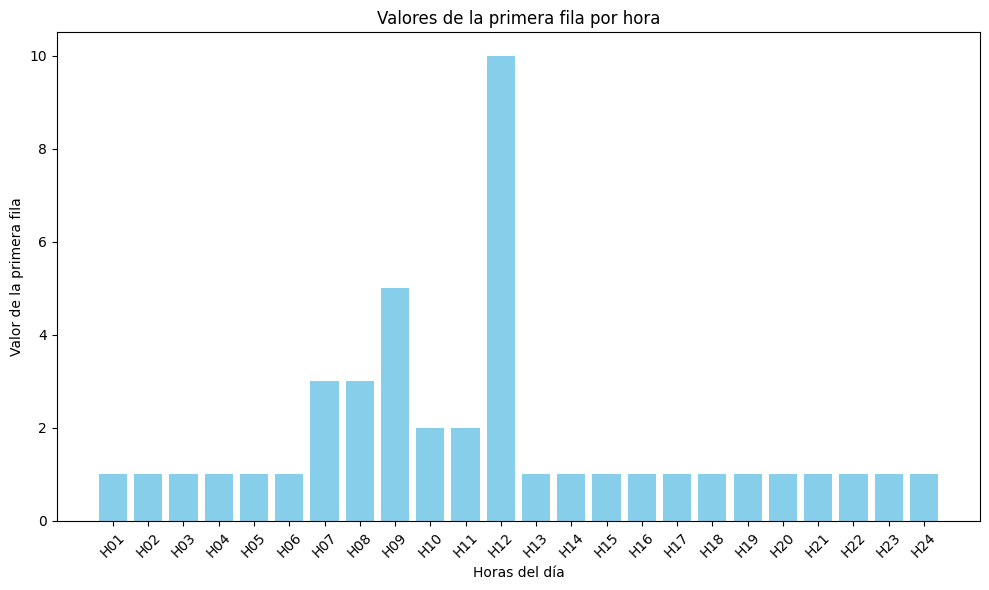

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


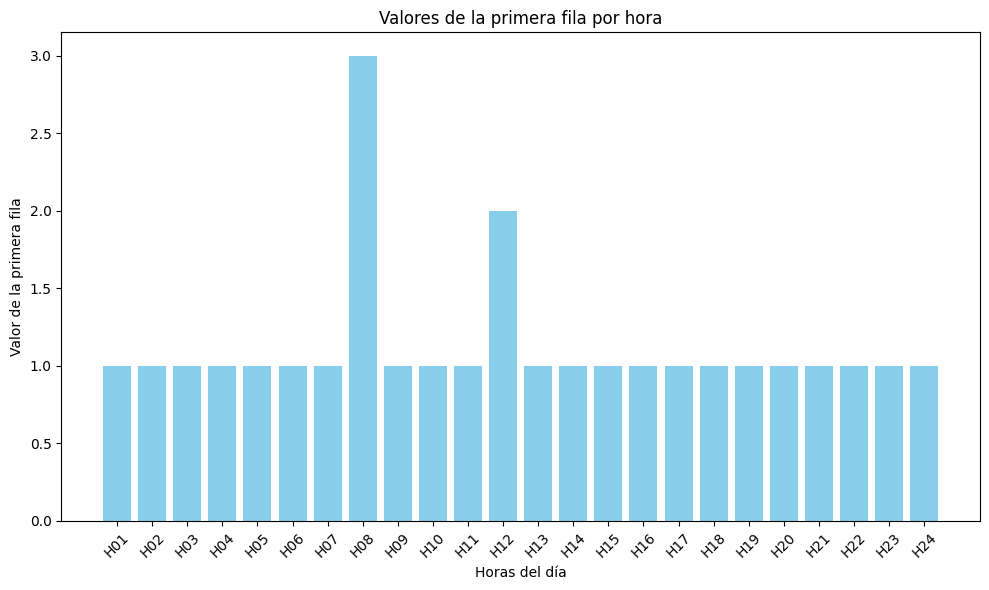

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


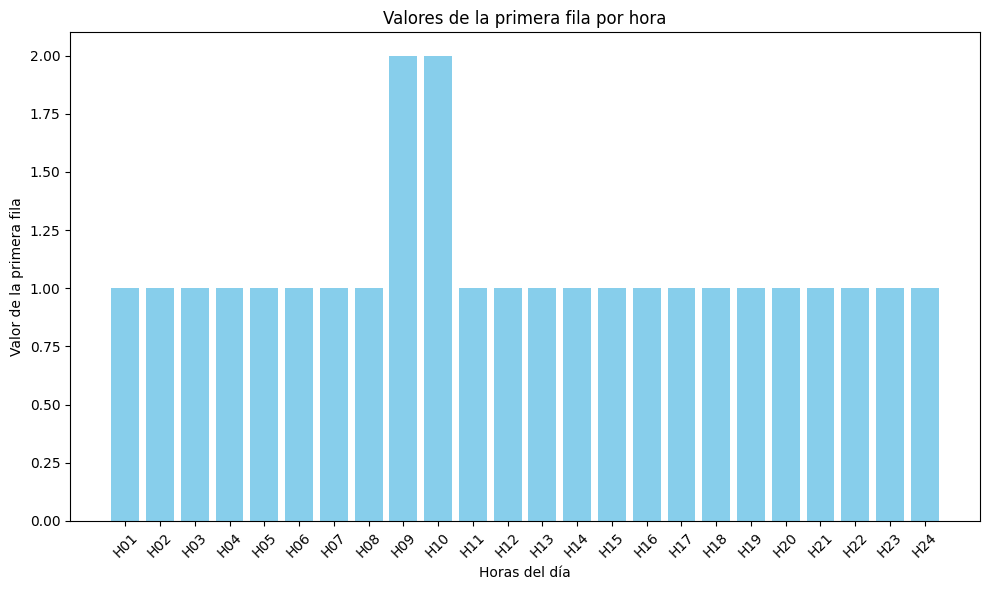

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


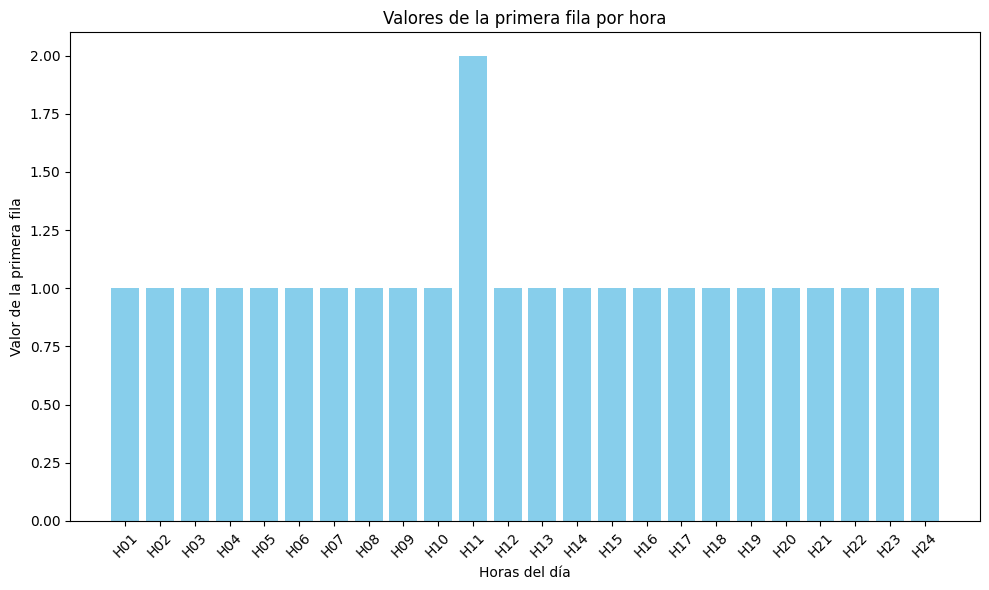

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


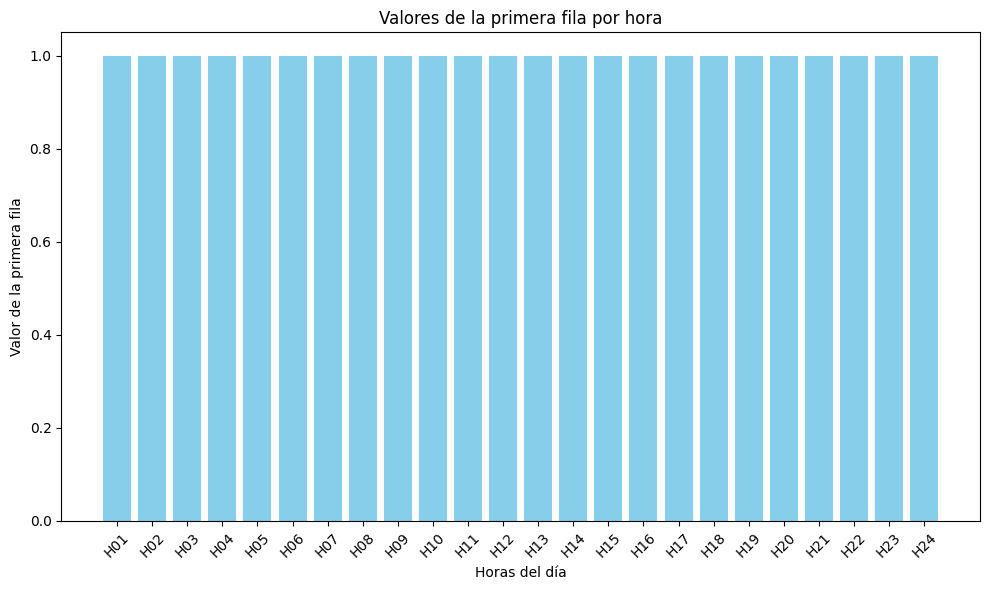

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  3. 14. 19. 51. 58.  8. 34. 17. 11.  9.  6.  6.  3.
  2.  4.  1.  1.  5.  7.]


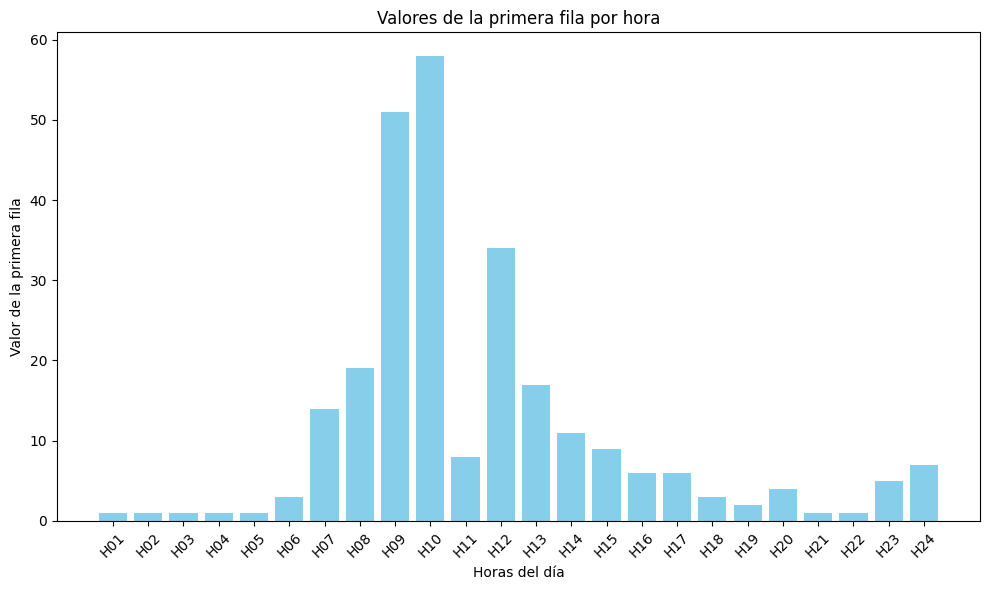

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  1.  1.  1.  1.  1.  5.  4.  7. 12. 14. 19. 21. 14.  6.  4.  3.  3.
  2.  3.  2.  3.  1.  1.]


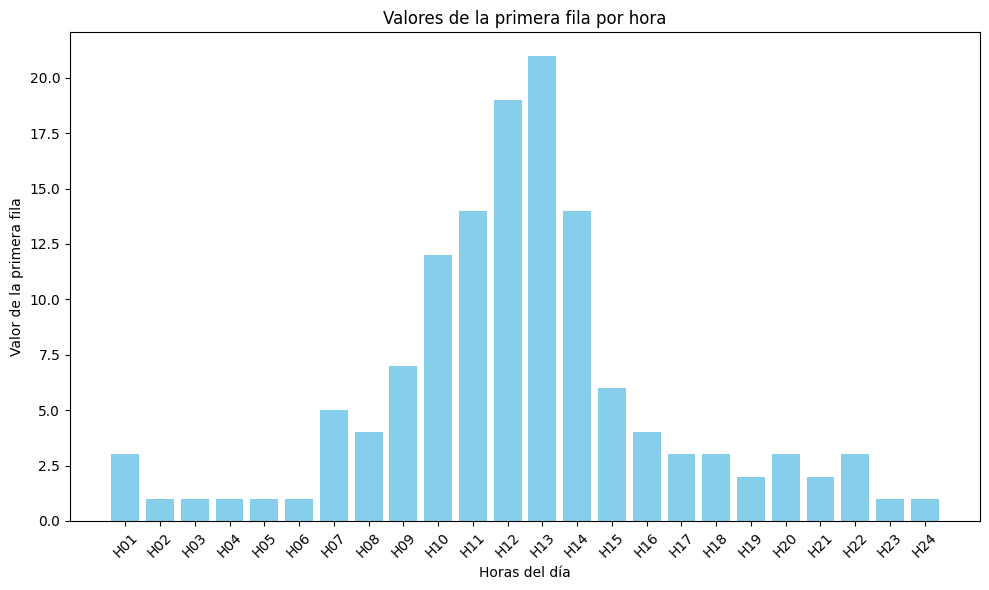

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  1.  1.  1.  1.  1.  1.  2. 10. 26.  4.  9. 15.  9.  2.  4.  3. 10.
  5.  6.  2.  1.  3.  1.]


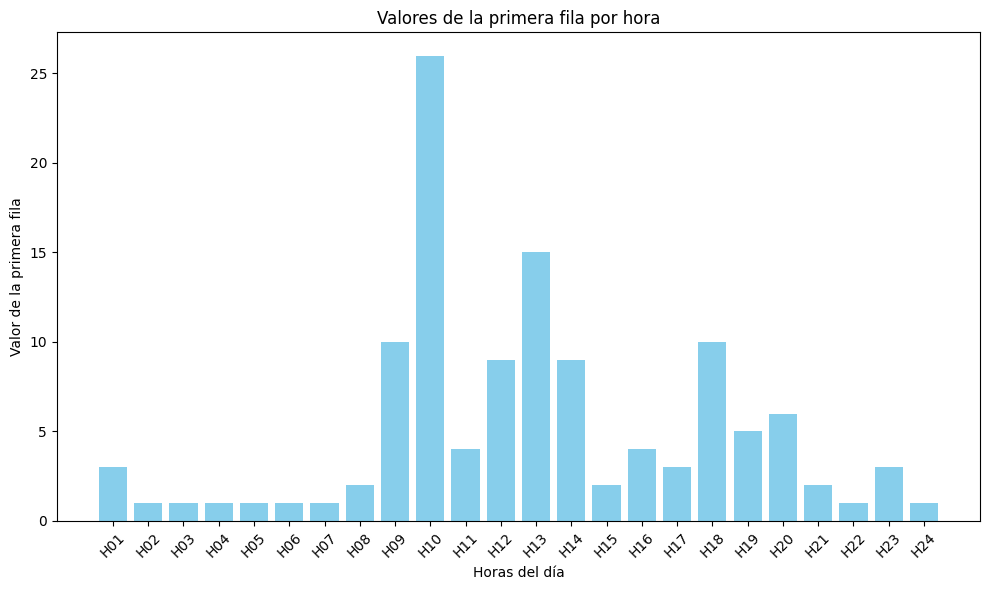

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 2. 5. 6. 5. 5. 5. 5. 4. 4. 2. 2. 1. 1. 1. 1. 1. 1.]


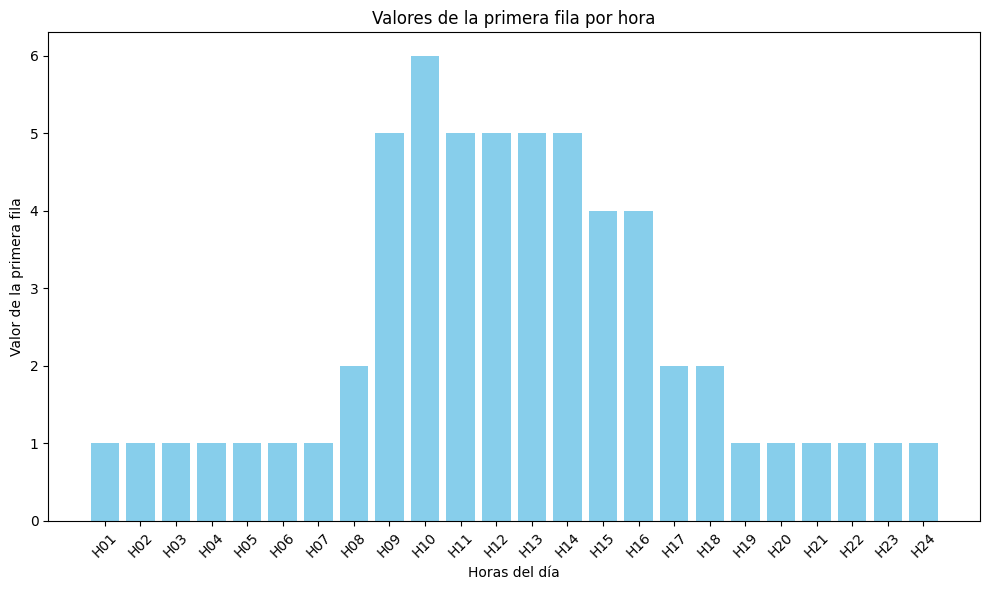

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  4.  3.  3.  3.  5. 17.  2.  2.
  1.  2.  1.  1.  1.  1.]


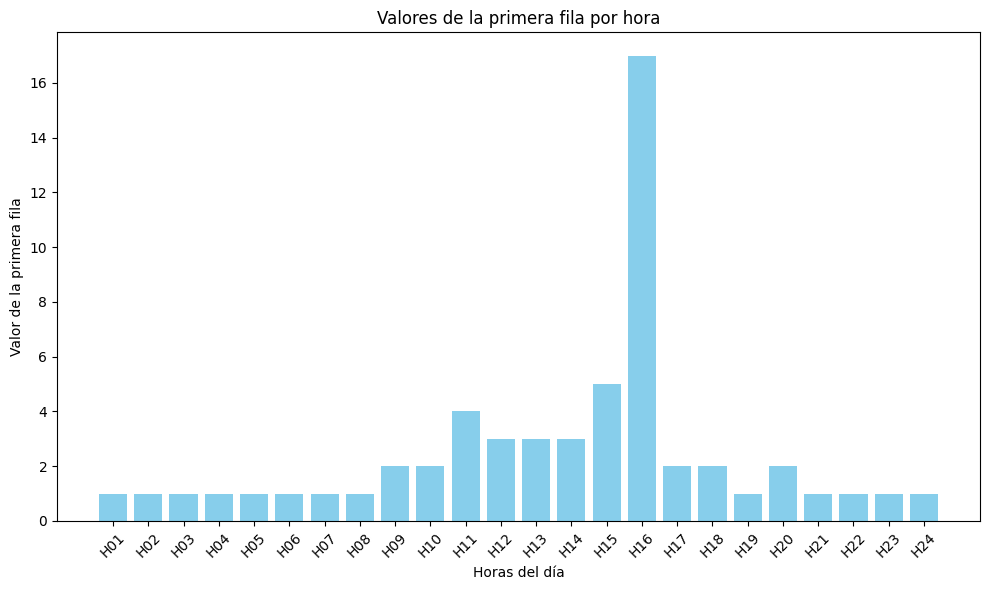

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1.         1.         1.         1.         1.         3.
 1.         2.33333333 4.33333333 7.33333333 5.33333333 5.
 4.66666667 6.33333333 3.66666667 8.66666667 4.66666667 5.66666667
 2.66666667 2.         1.33333333 1.33333333 1.         1.        ]


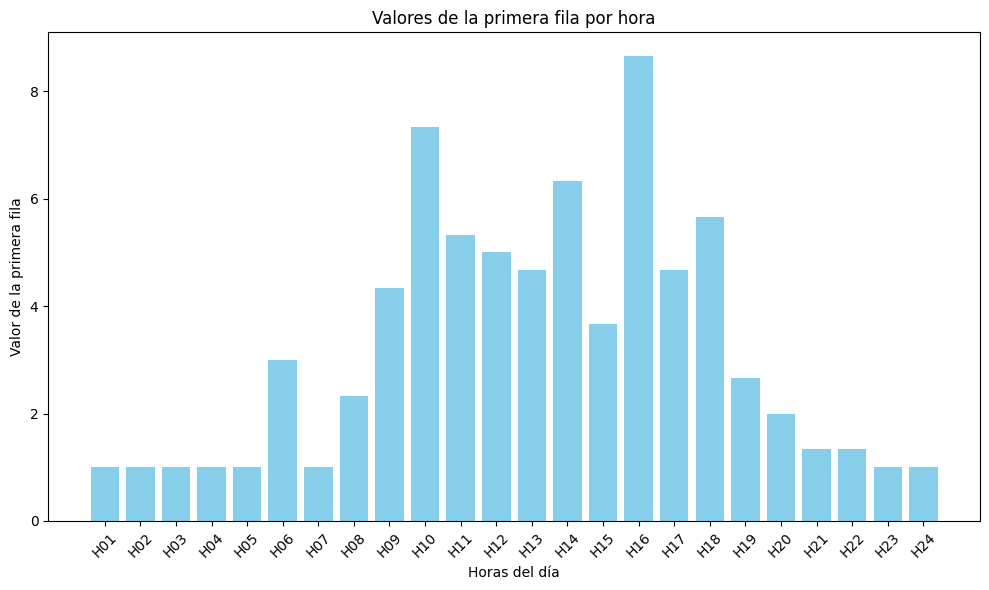

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  1.  4.  6. 14.  7.  7.  6. 11.  2.  5. 10. 13.
  6.  3.  2.  2.  1.  1.]


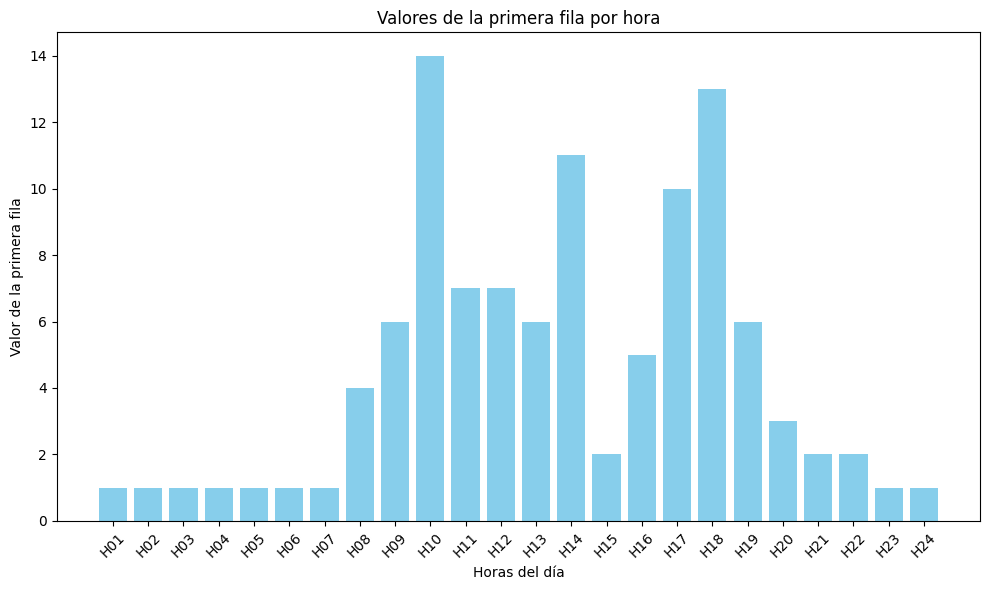

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  2.  3.  6. 17. 16. 15.  4.  6. 10. 30.  9. 14.  5.
  4.  4.  2.  2.  1.  1.]


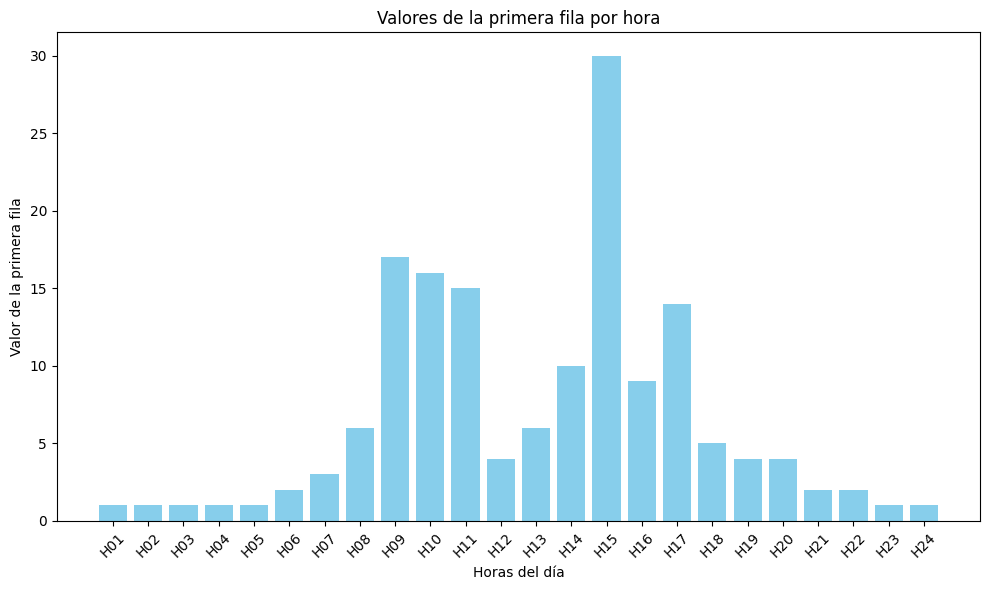

In [289]:
#Ciutadella:
df_o3_ciutadella = df_o3[df_o3["ESTACIO"] == 50]
for i in range(0, 29):
  plotear_ozono(df_o3_ciutadella, i)


# Evolucio de la concentració de ozo Gracia i Eixample (estacions a prop del centre)

Se procede a graficar la evolucion de los contaminates a lo largo de lo sdiferentes dias del mes

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 13.   3.   2.   5.   2.   5.  16.  55. 102. 138.  29.  19.  12.   9.
   8.  12.   9.  10.   7.   8.  14.   9.   5.   6.]


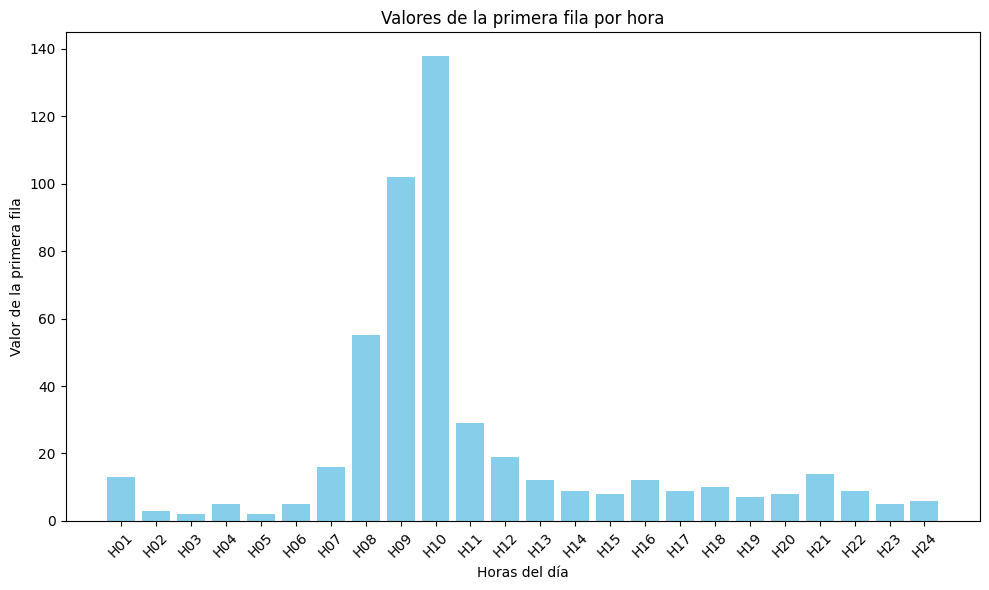

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  3.  2.  6.  1.  1.  6. 22. 27. 28. 14. 18. 12. 12. 11.  6. 17.  6.
 11.  7.  4.  4.  7.  3.]


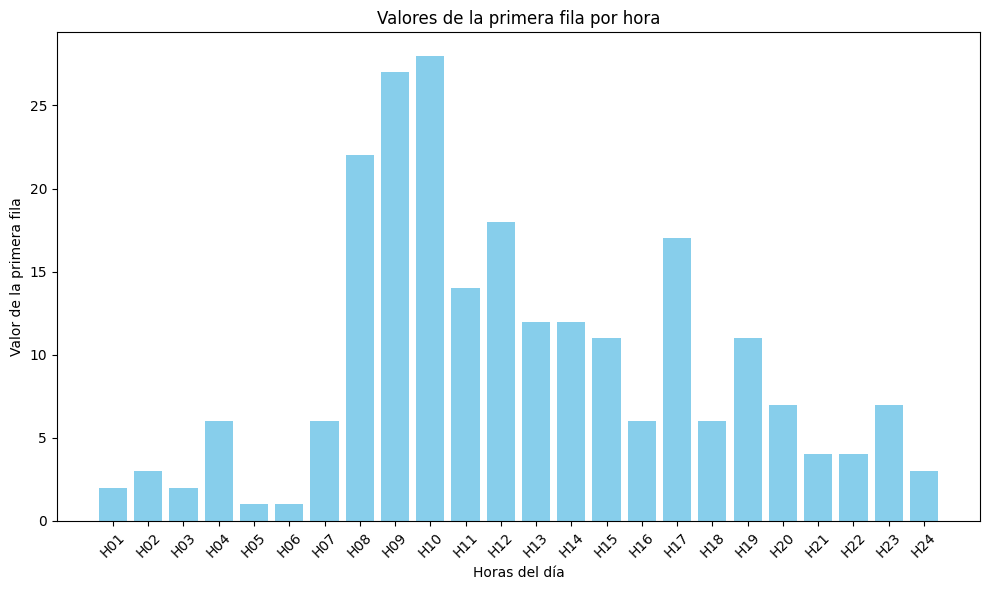

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  2.  1.  2.  3.  2.  1.  3.  8. 15. 12.  8. 11.  6. 17. 13.  9.  8.
 16. 14. 11. 12.  9.  6.]


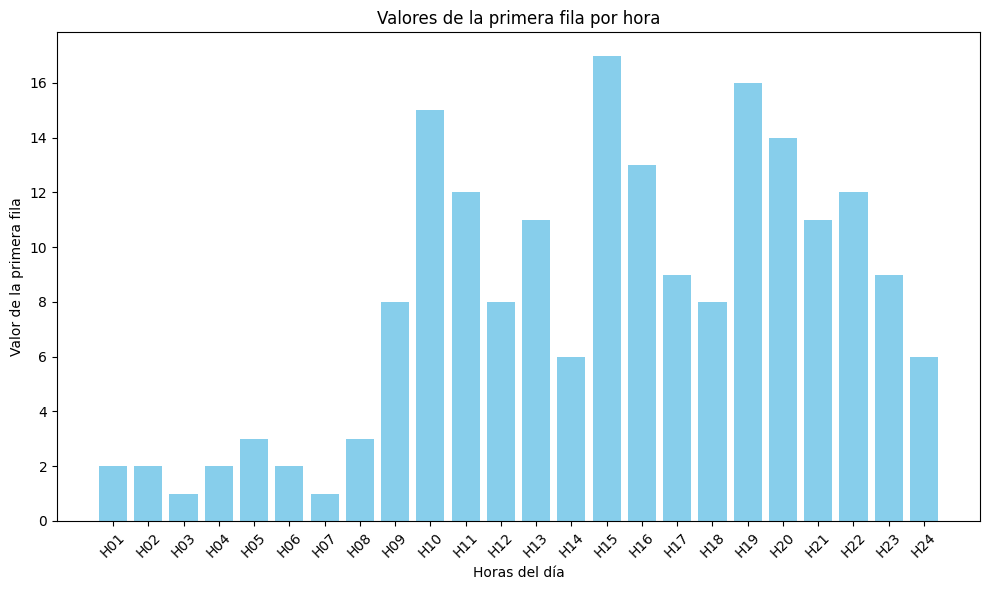

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  1.  2.  2.  2.  1.  3. 13. 76. 70. 86. 65. 18.  7.  8.  7.  7.  9.
  9. 14. 12. 11.  9.  4.]


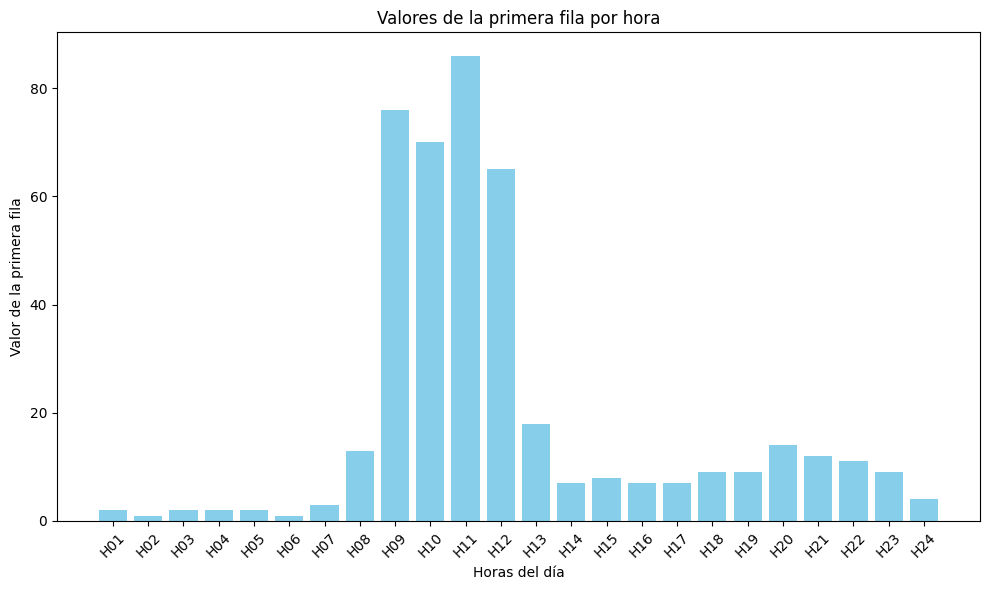

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.  5.  2.  2.  1.  1.  1.  1.  4. 14.  5.  5.  5.  3.  4.  3.  3.  5.
  3.  3.  7.  5.  6. 11.]


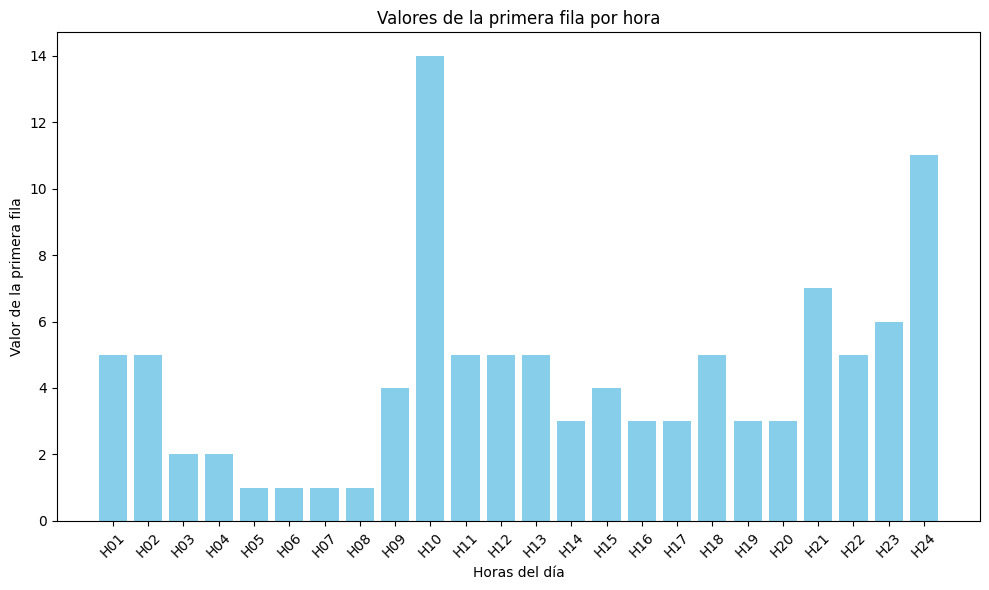

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 7.  4.  3.  2.  1.  1.  1.  2.  3.  4.  3.  4.  4.  3.  4.  3.  3.  6.
  5.  3.  4.  8. 12.  4.]


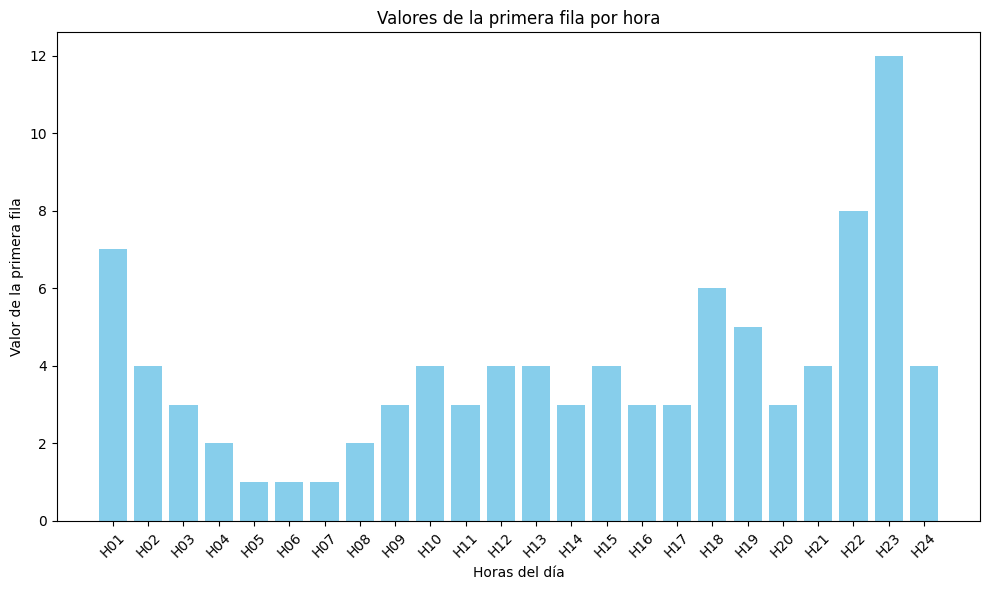

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.  4.  1.  1.  2.  2. 13. 23. 23. 11. 13.  8. 25. 16. 11.  8.  9. 10.
 10.  7.  9.  5. 13. 12.]


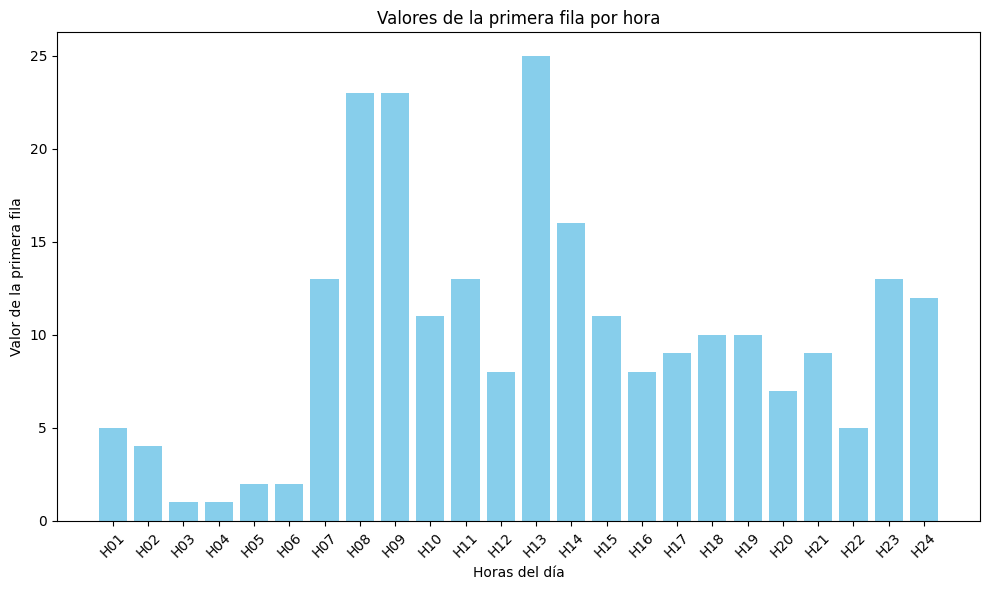

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 6.  4.  5.  3.  2.  3.  7. 33. 46. 25. 26. 18. 22.  9. 15.  9.  8. 20.
 14. 15. 20. 32. 21.  8.]


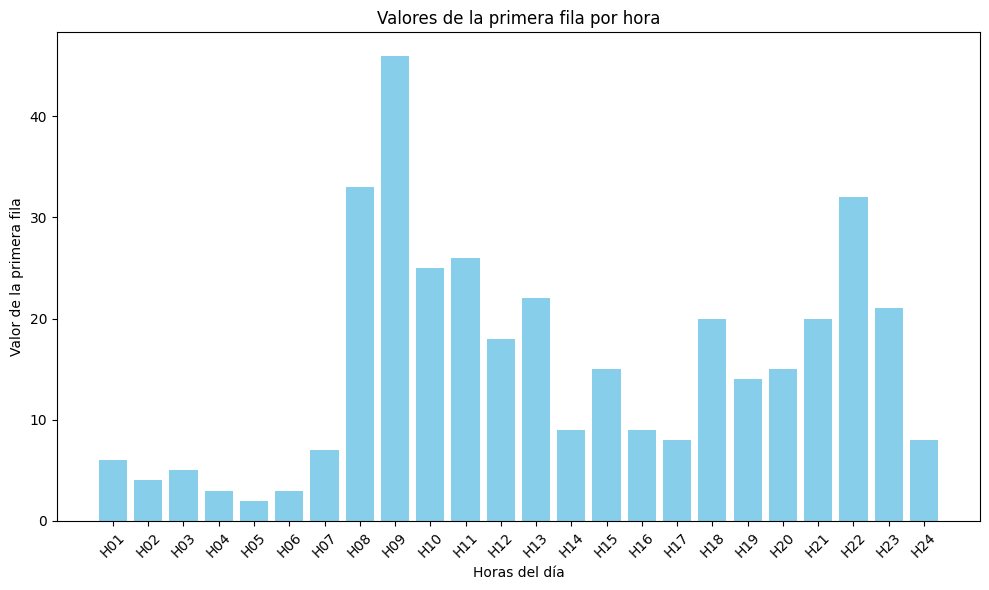

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 6.  9.  2.  3.  1.  2.  4. 28. 79. 53. 20. 28. 29. 12. 10. 10. 15. 23.
 19. 19.  5.  8. 16. 14.]


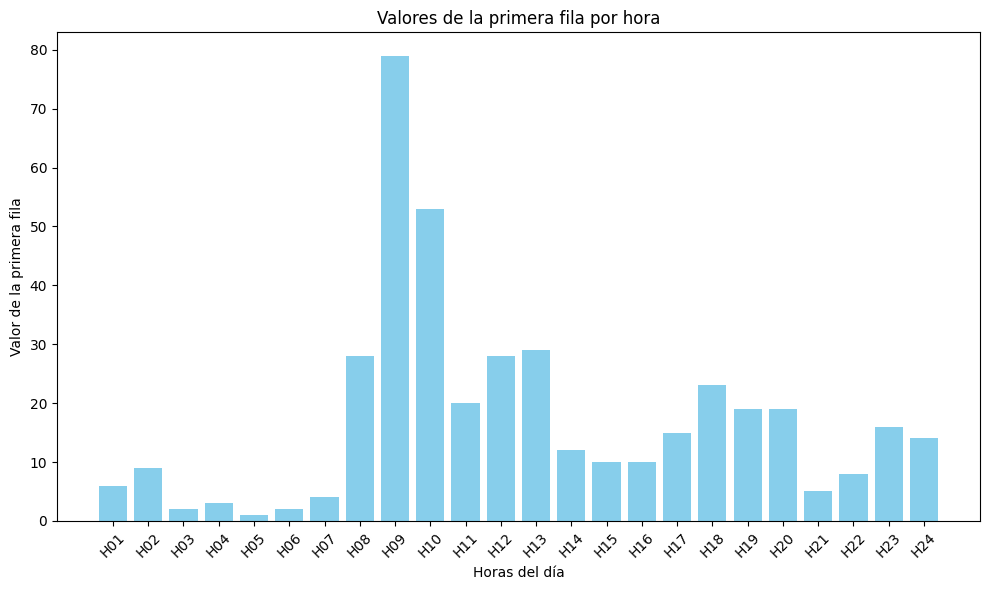

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 6.  8.  7.  9.  5.  1.  4. 13. 12. 23. 26. 21. 14. 13. 10. 12. 15. 10.
 20. 16.  8.  7.  9.  7.]


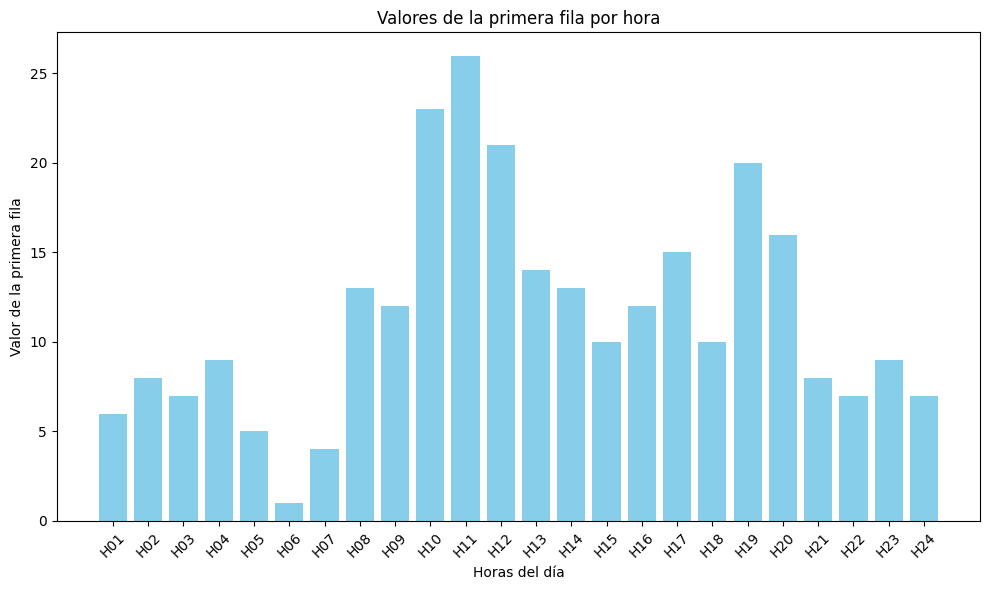

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  5.  2.  1.  4.  2.  3. 31. 53. 38. 26. 36. 25. 33. 32. 20.  9.  8.
 10. 13. 13.  9.  5.  8.]


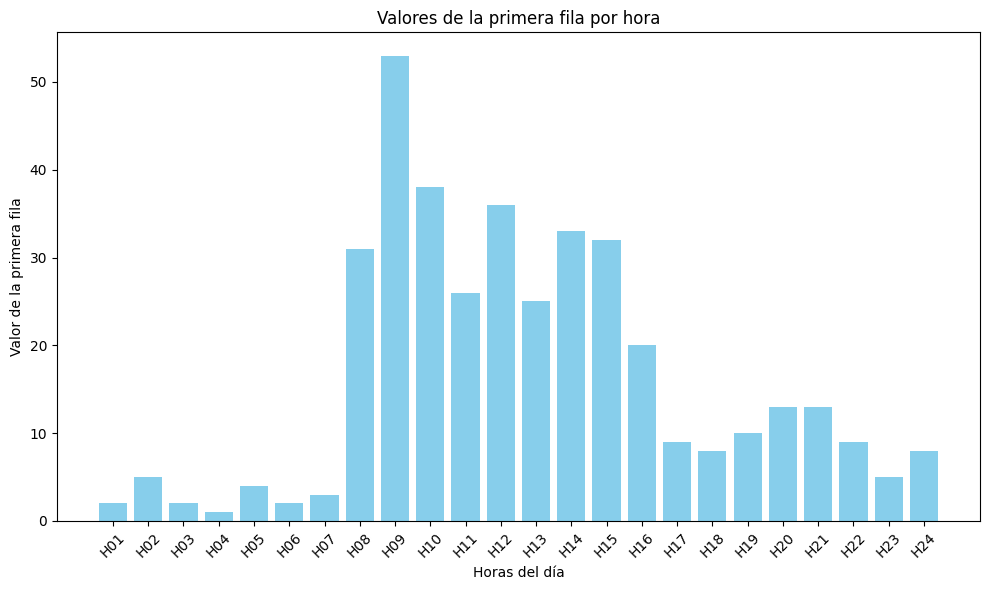

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.  3.  3.  3.  1.  2.  2. 11. 22. 22. 15. 32. 15. 10. 21.  7.  5.  3.
  5.  4.  4.  2.  5.  2.]


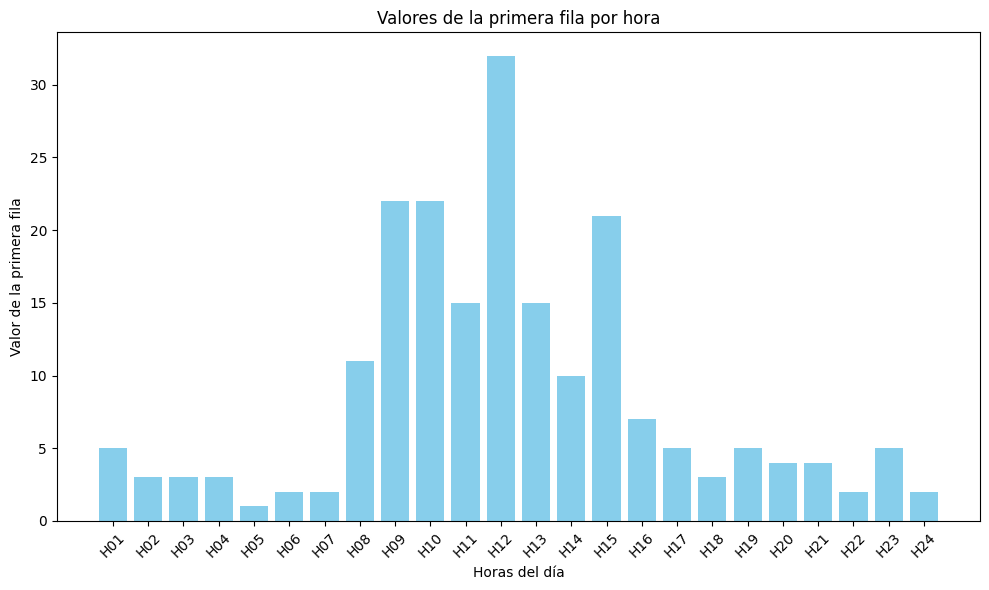

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [3. 1. 1. 4. 4. 3. 4. 2. 3. 5. 3. 4. 2. 3. 2. 3. 2. 2. 2. 4. 2. 3. 4. 4.]


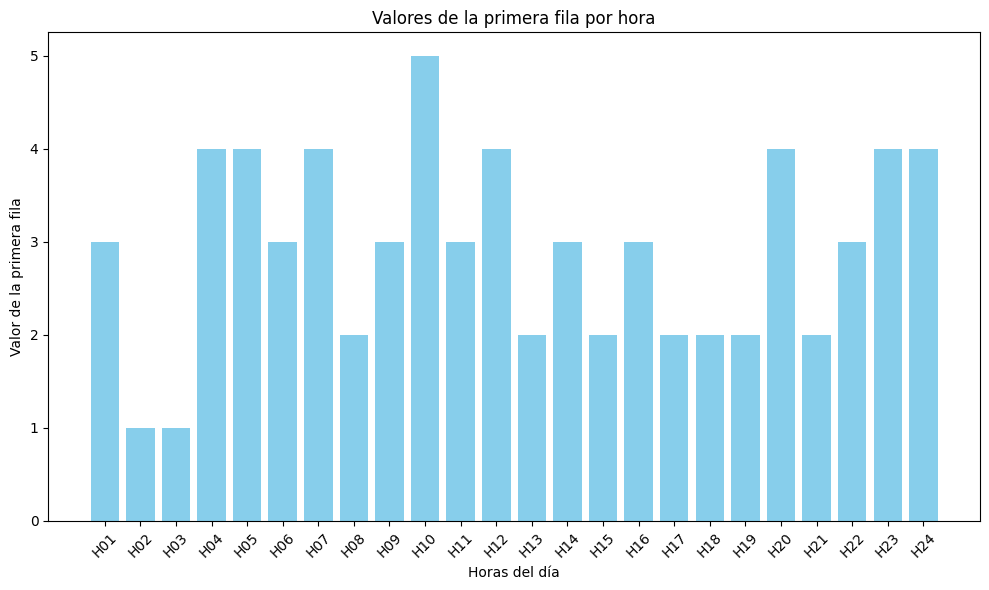

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  3.  3.  2.  1.  2.  4. 10. 24. 24. 16. 15. 11. 10.  7.  5.  9.  8.
 10.  9.  8.  4.  9.  2.]


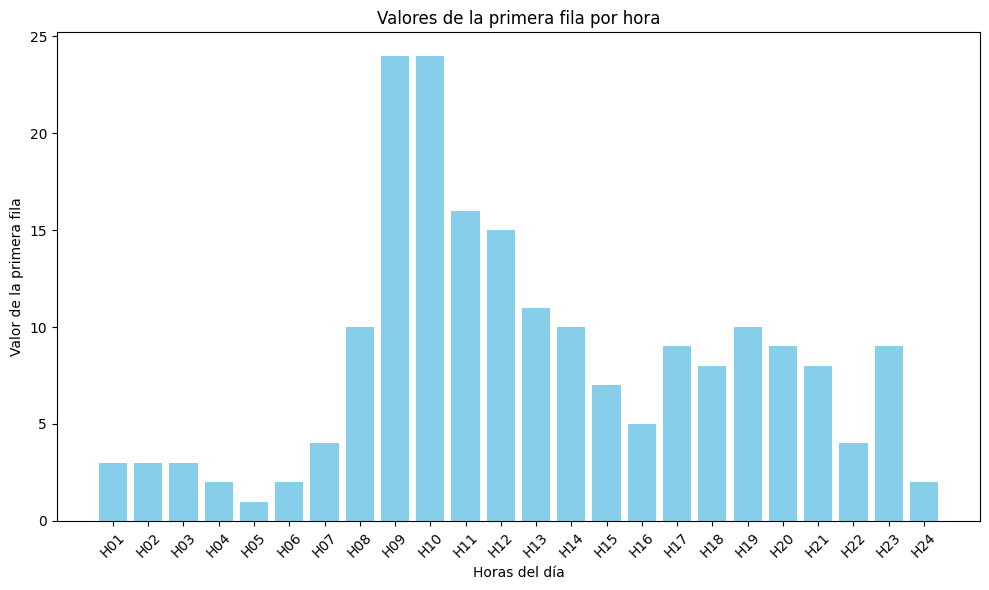

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 6.  4.  2.  3.  2.  3.  5. 19. 38. 20. 17. 13. 10. 11. 10.  8.  7.  5.
 12.  9. 11.  5.  7.  7.]


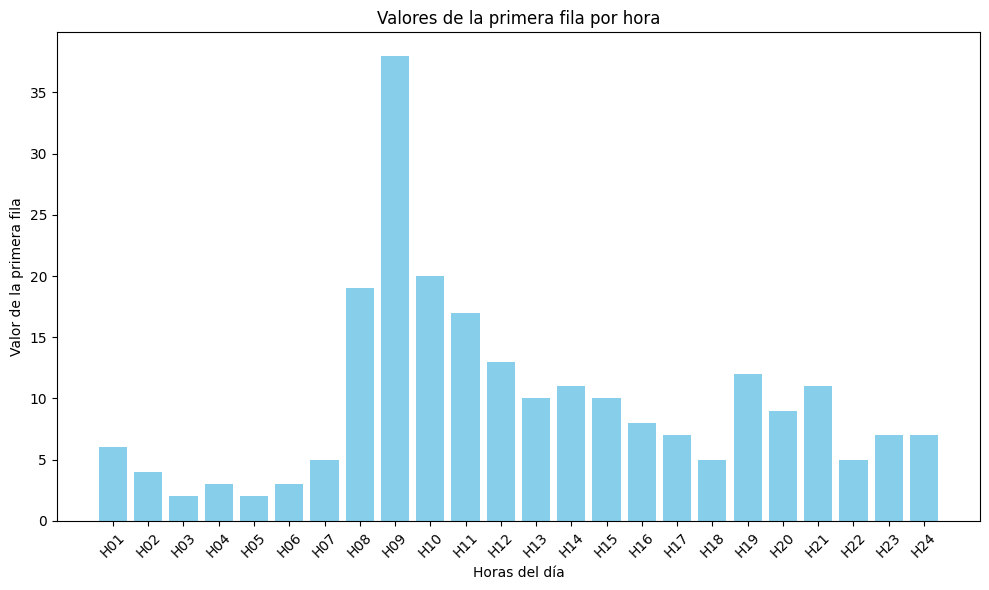

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  3.  2.  3.  2.  4.  8. 46. 27. 23. 11. 13. 10. 11. 18.  6.  7.  6.
  7. 13.  6.  6.  4.  8.]


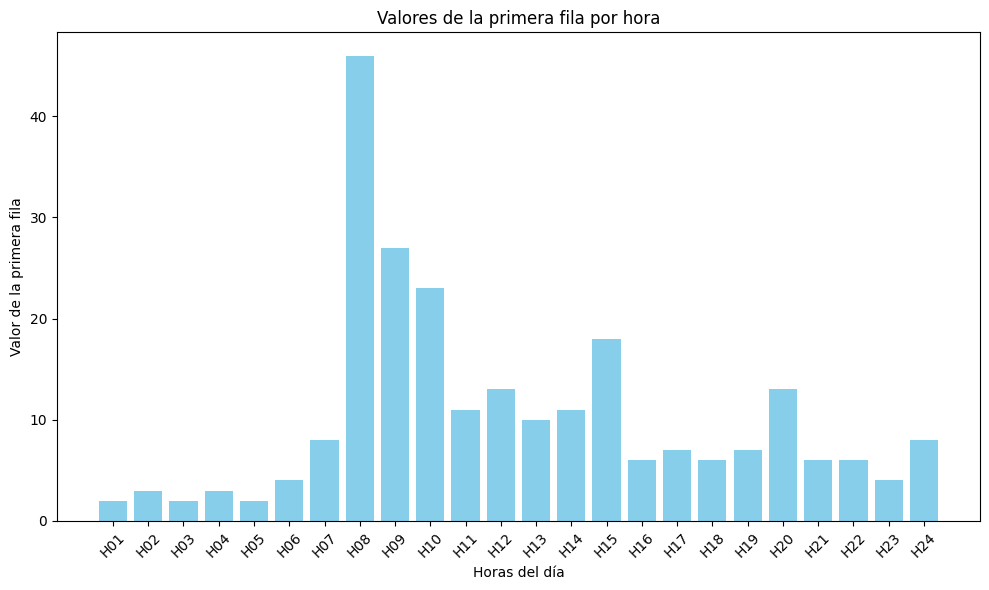

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  4.  1.  1.  2.  1.  3.  4. 13. 11.  6.  6.  8.  8.  7.  6.  4.  3.
  4.  4.  3.  3.  4.  5.]


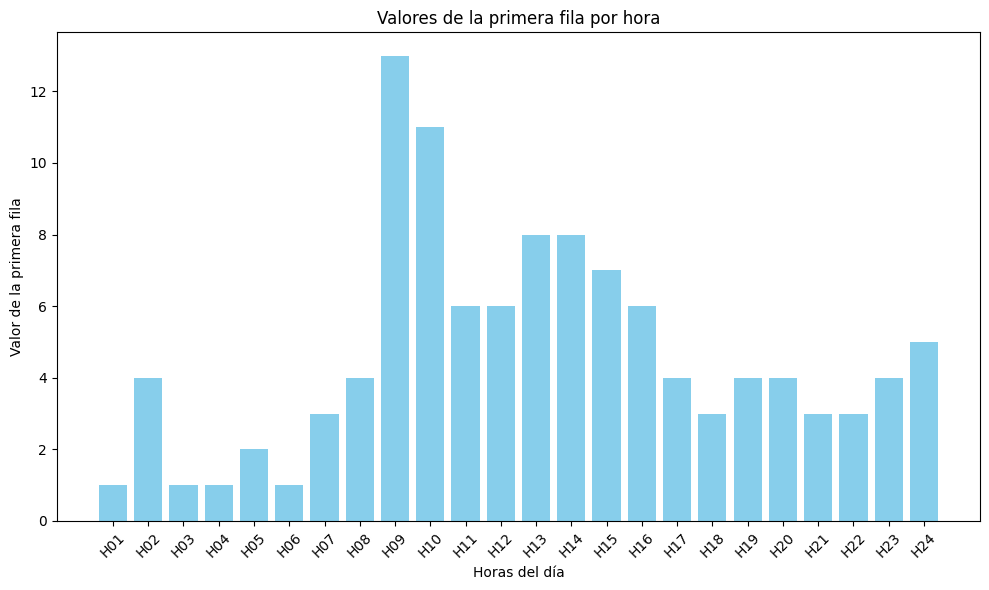

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 3. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 1. 3. 8.]


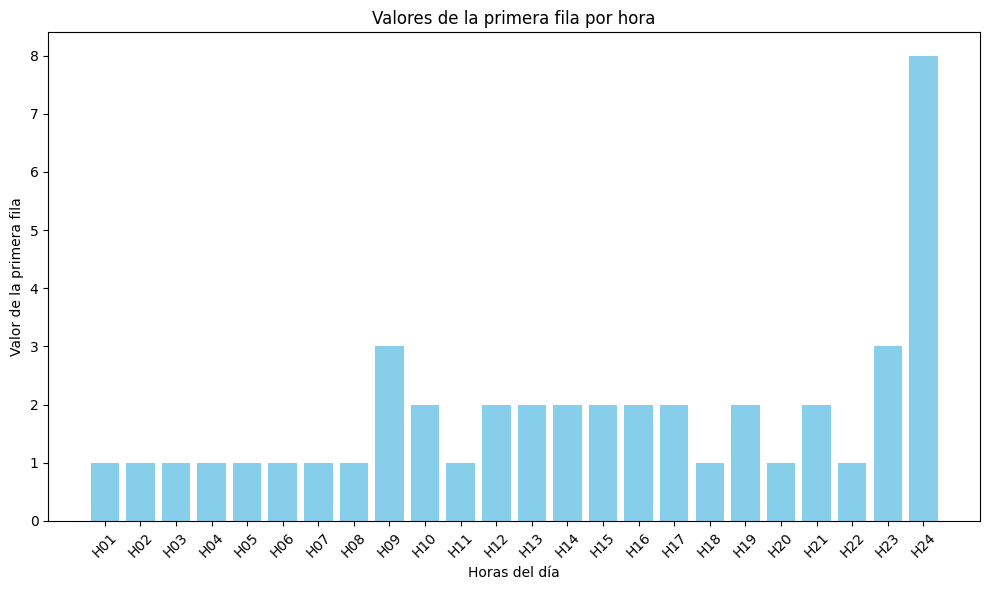

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 4. 1. 1. 1. 1. 1. 1. 2. 3. 4. 3. 3. 4. 2. 3. 3. 2. 3. 2. 3. 3. 2. 3.]


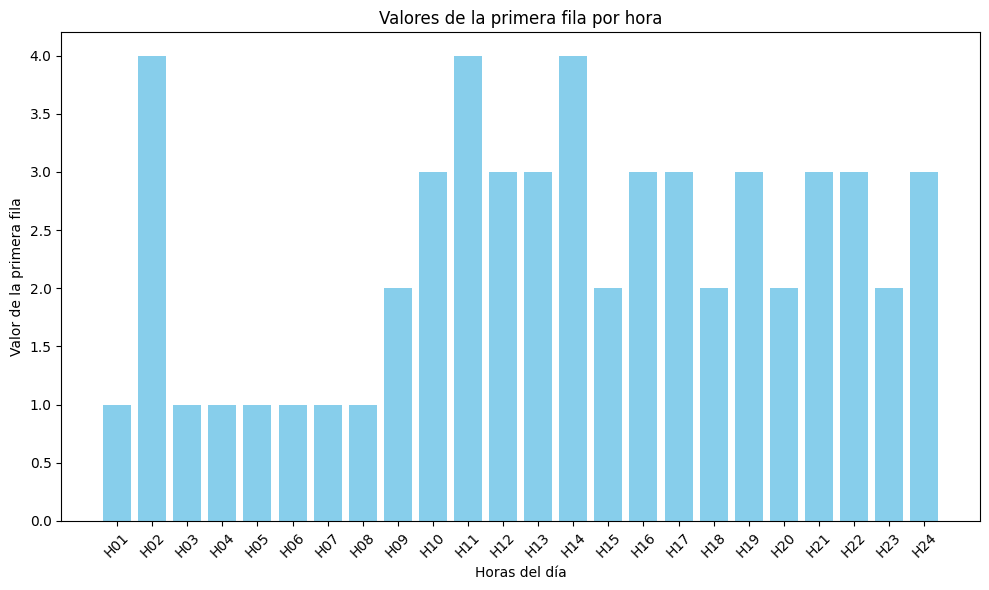

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 1. 2. 3. 3.]


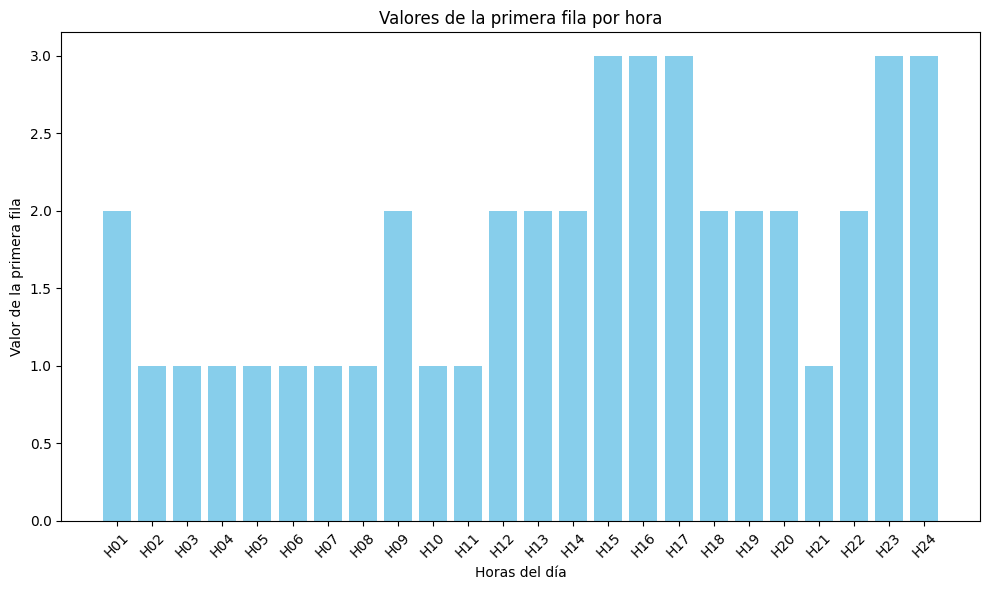

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [2. 1. 1. 1. 1. 1. 1. 1. 3. 1. 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 3. 3. 5.]


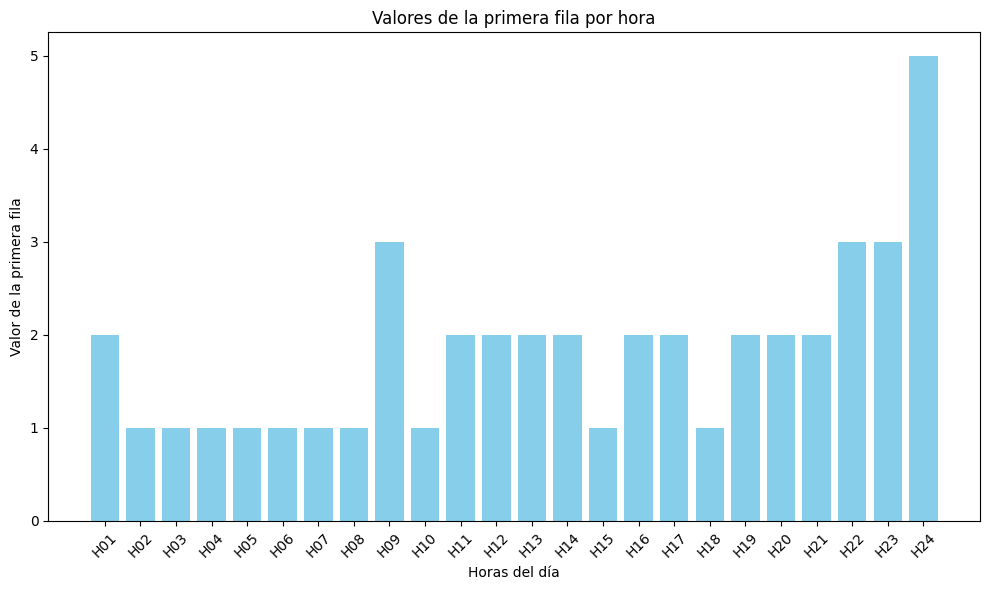

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  2.  3.  2.  2.  2.  8. 36. 47. 38. 16. 23. 52. 18. 12. 13. 10. 15.
 16. 16.  7.  4.  5.  5.]


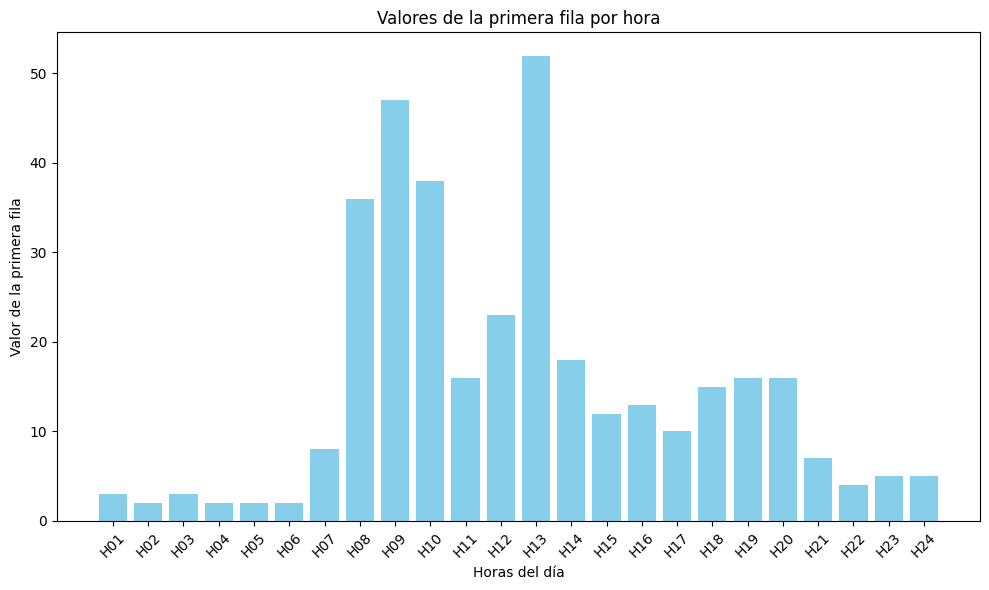

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  3.  1.  2.  2.  1.  2. 17.  8.  8. 13. 20. 16. 13.  7.  5.  8. 11.
 12. 16.  7.  4.  2.  3.]


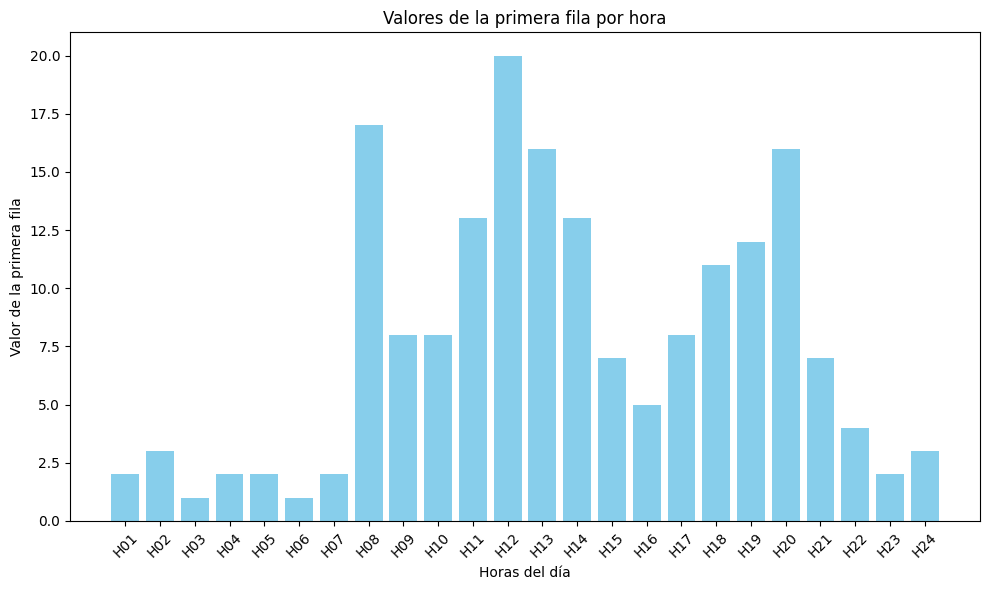

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.          1.          2.          1.          1.          1.
  4.          6.          9.         12.         13.          9.
 10.06666667 13.         14.         14.         38.         34.
  9.          7.          8.          8.          4.          1.        ]


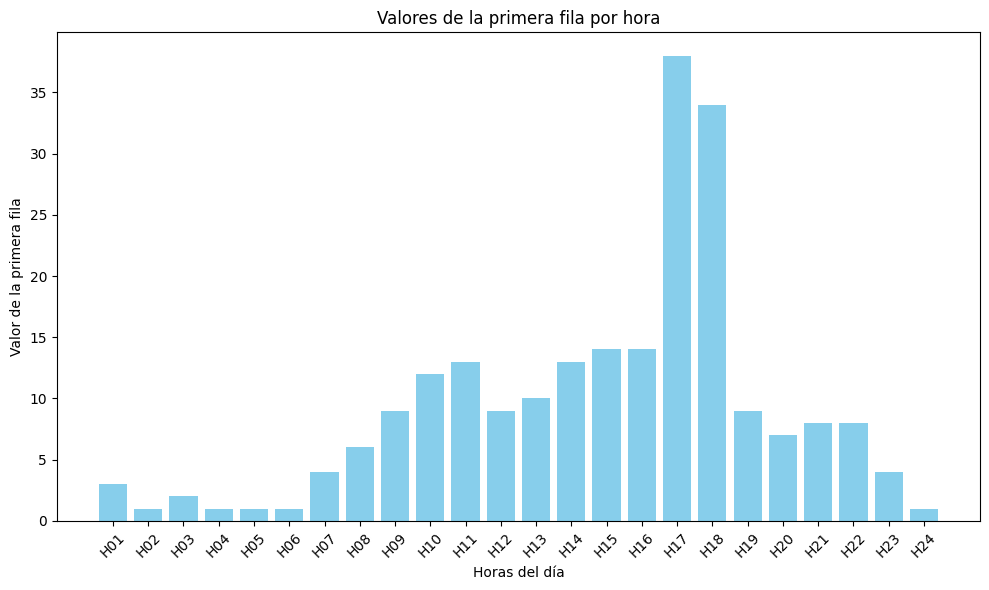

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  2.  1.  1.  1.  2.  7.  5.  6.  5.  9. 13.  7.  6.  7. 12. 17.
  7.  7.  7.  7.  8.  5.]


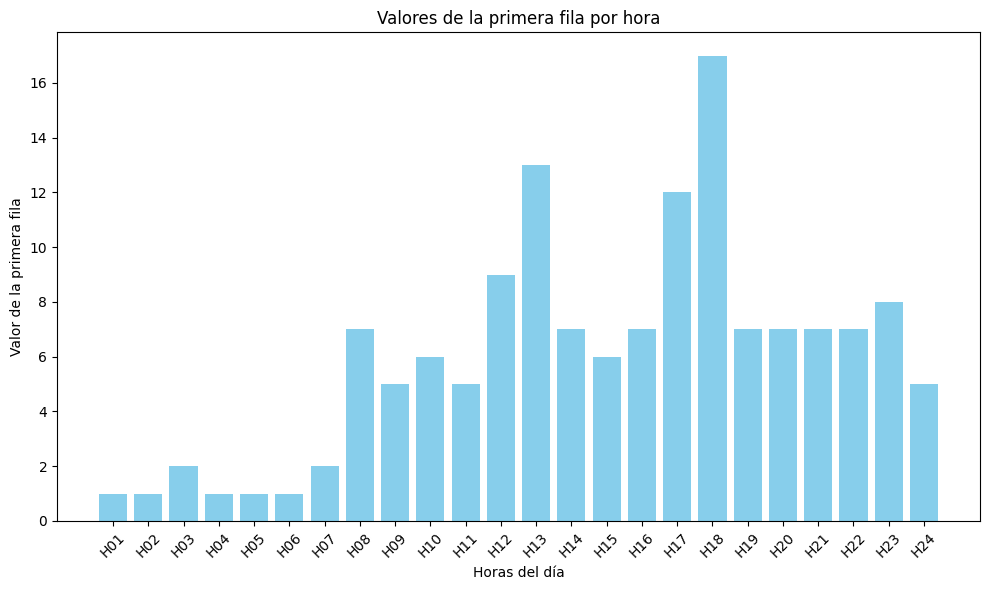

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 6.  7.  9.  4.  3.  3.  3.  5.  8.  4. 12. 24. 27. 14.  8.  6.  5.  8.
 10.  9.  5.  6.  8.  6.]


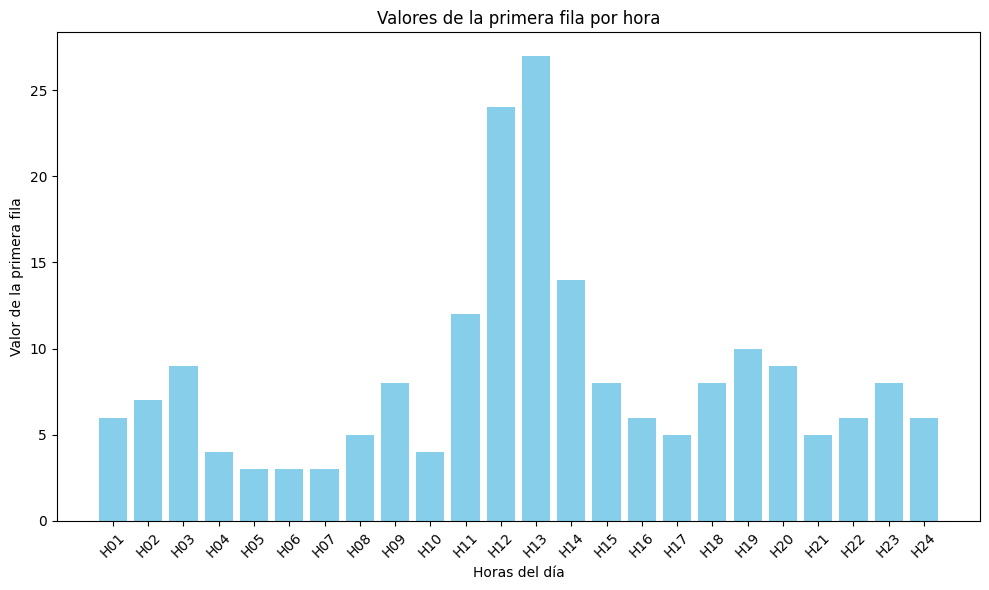

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.          5.          2.          4.          6.          6.
  4.         11.         20.         15.         28.66666667 30.33333333
 35.66666667 23.33333333 19.         20.66666667 24.         21.66666667
 18.33333333 17.66666667 15.66666667 14.33333333 11.          8.66666667]


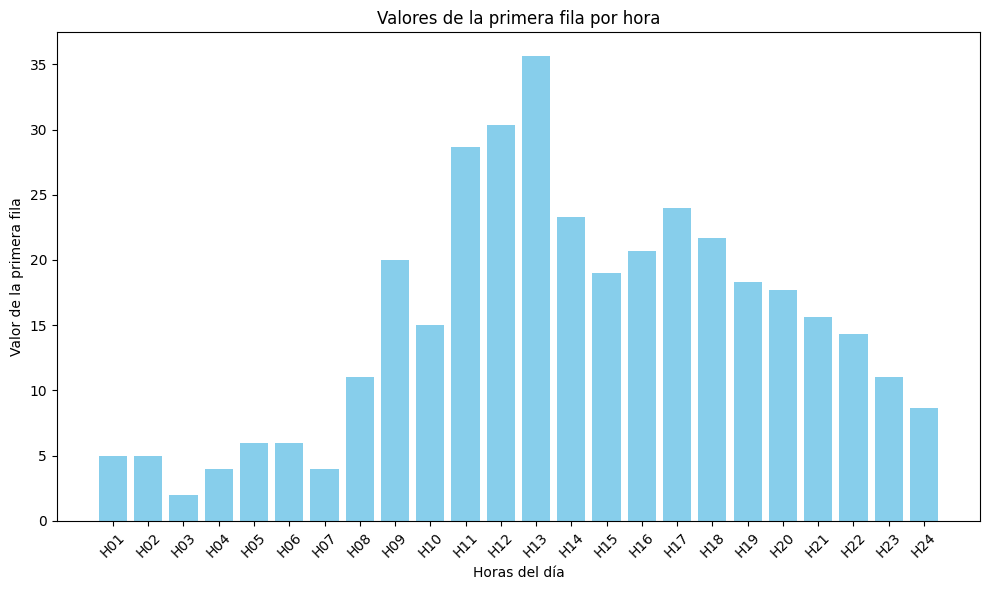

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.  6.  4.  1.  1.  2.  2.  3. 18. 16. 25. 33. 58. 26. 14. 12. 11.  9.
 10.  8.  4.  3.  3.  3.]


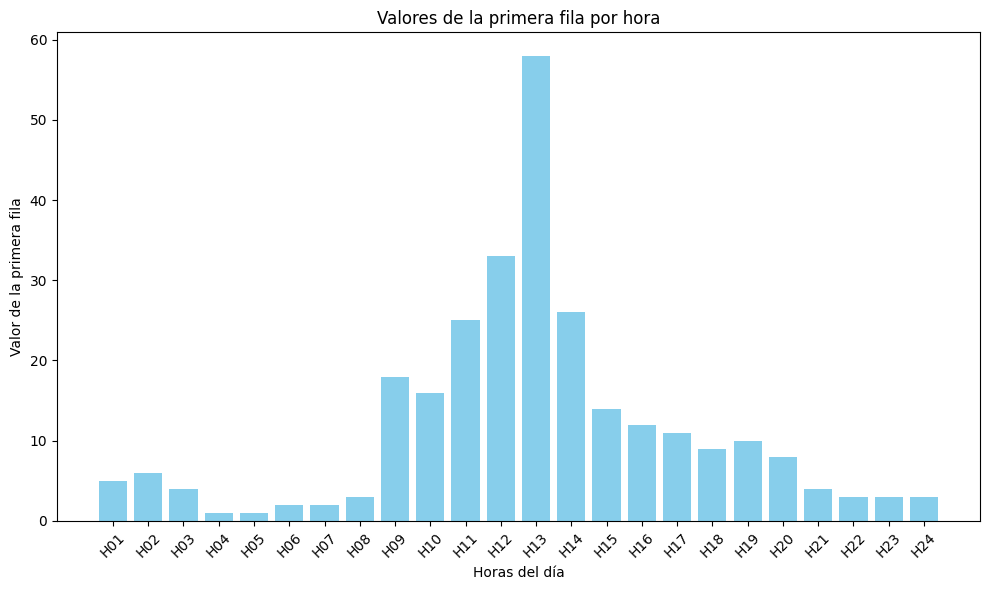

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  2.  2.  3.  2.  3.  1. 11. 14. 27. 32. 22. 24. 19. 11.  9.  9.  8.
 10.  9.  7.  3.  3.  8.]


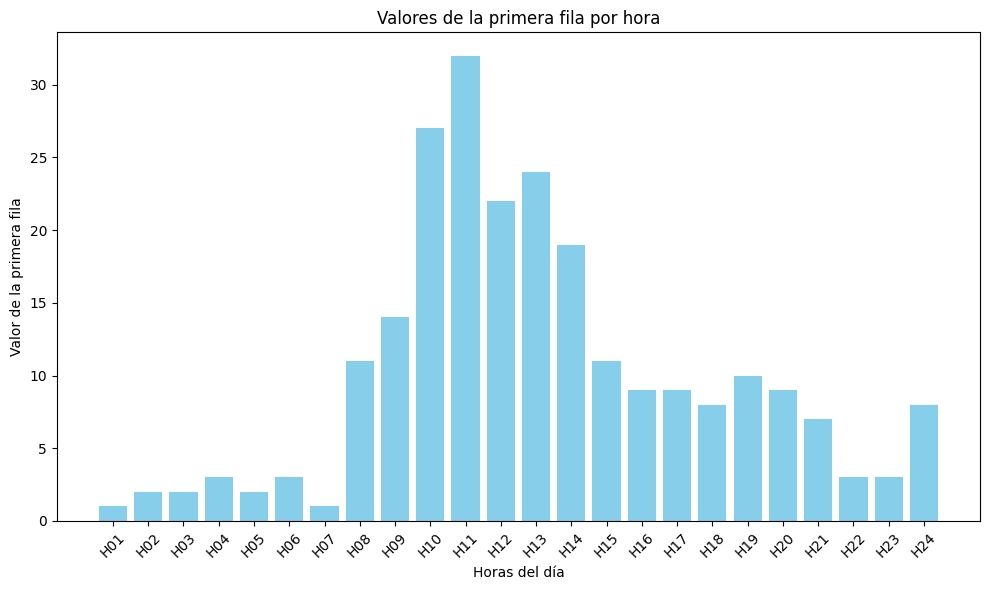

In [290]:
#Gracia:
df_o3_gracia = df_o3[df_o3["ESTACIO"] == 44]
for i in range(0, 29):
  plotear_ozono(df_o3_gracia, i)


Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  3.   2.   1.   3.   3.  10.  21.  97. 131.  69.  25.  27.  20.  16.
  11.  11.  13.  16.  10.   9.  29.  17.  10.   7.]


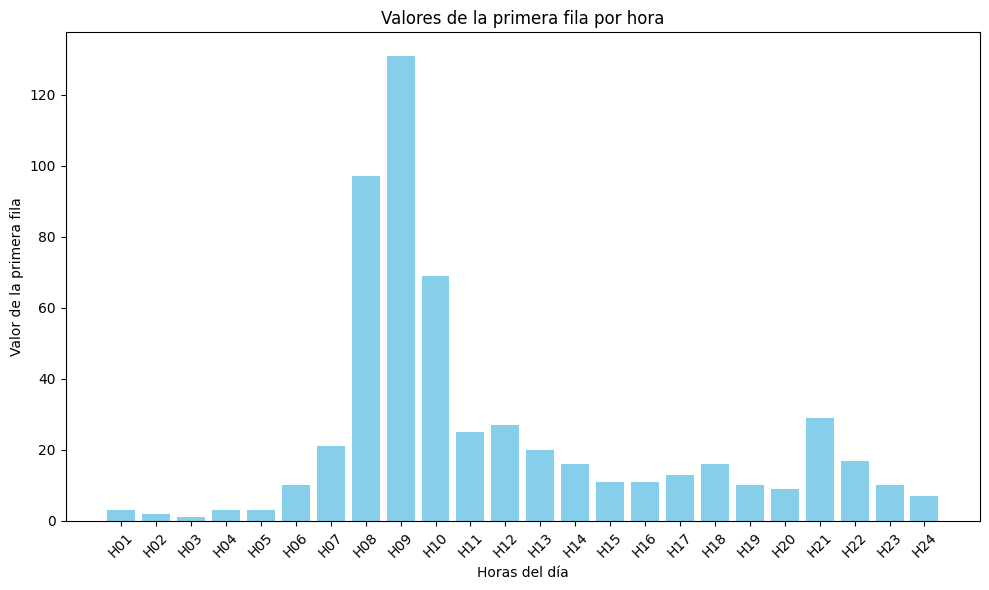

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 7.  5.  5.  6.  5.  4. 12. 58. 66. 43. 21. 18. 24. 26. 13. 18. 24. 20.
 27. 18.  8.  8.  3. 10.]


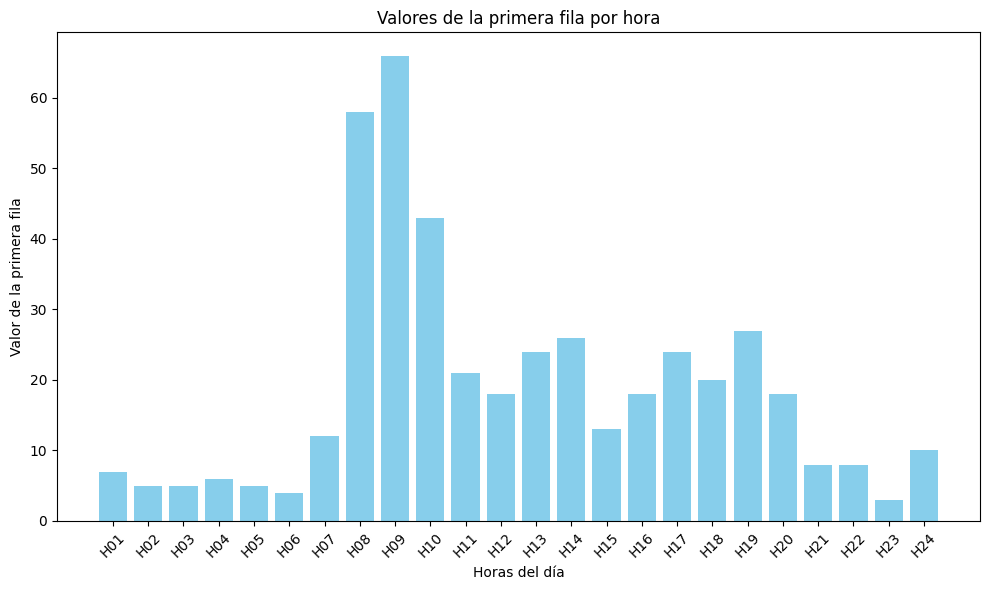

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10.  7.  4.  3.  3.  4. 13. 35. 21. 23. 25. 19. 25. 22. 37. 44. 34. 31.
 38. 28. 25. 20.  7.  8.]


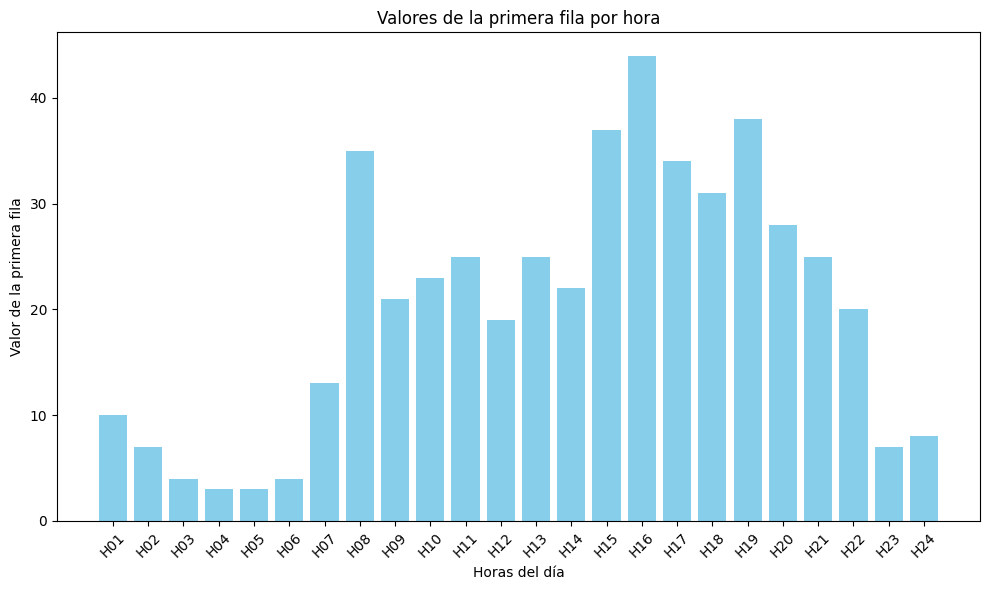

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  3.   1.   1.   2.   2.   3.  62. 165. 184.  71.  94.  83.  24.  15.
  20.  17.  21.  21.  27.  38.  27.  31.  21.   5.]


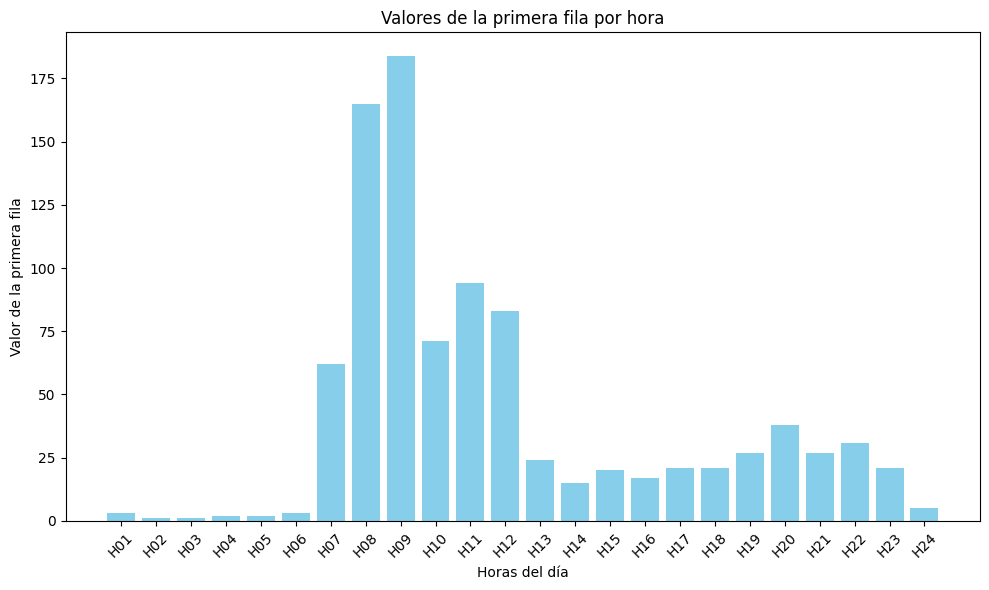

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  4.  5.  1.  3.  4.  5.  5.  2.  6.  7. 11.  8. 13.  6. 11.  8. 10.
 11. 11.  5.  5.  7. 29.]


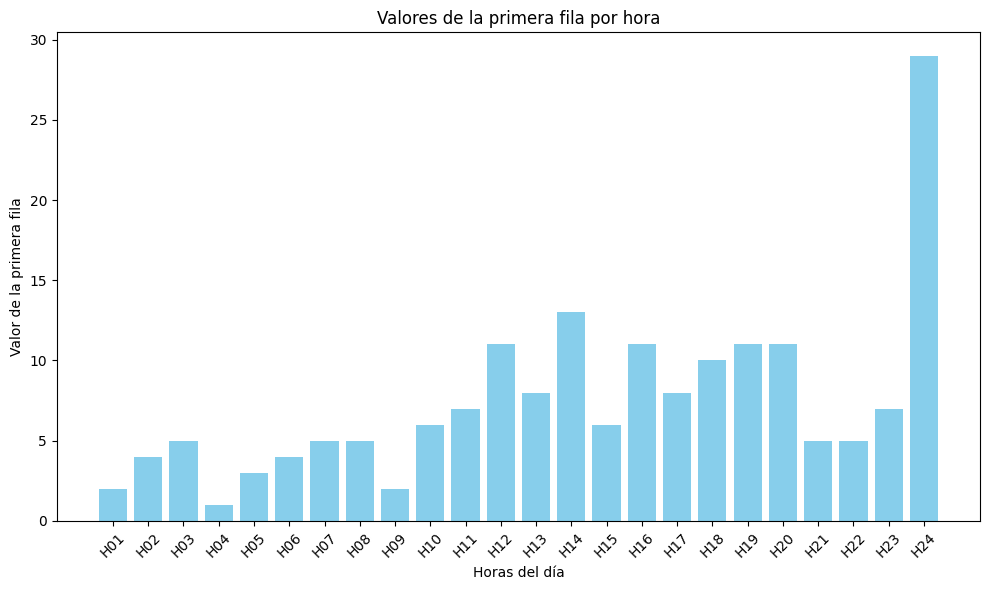

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [17.  4.  7.  4.  1.  3.  1.  3.  3.  3.  5. 11.  8. 10.  8. 10. 21. 12.
  7.  3.  5. 13.  5.  2.]


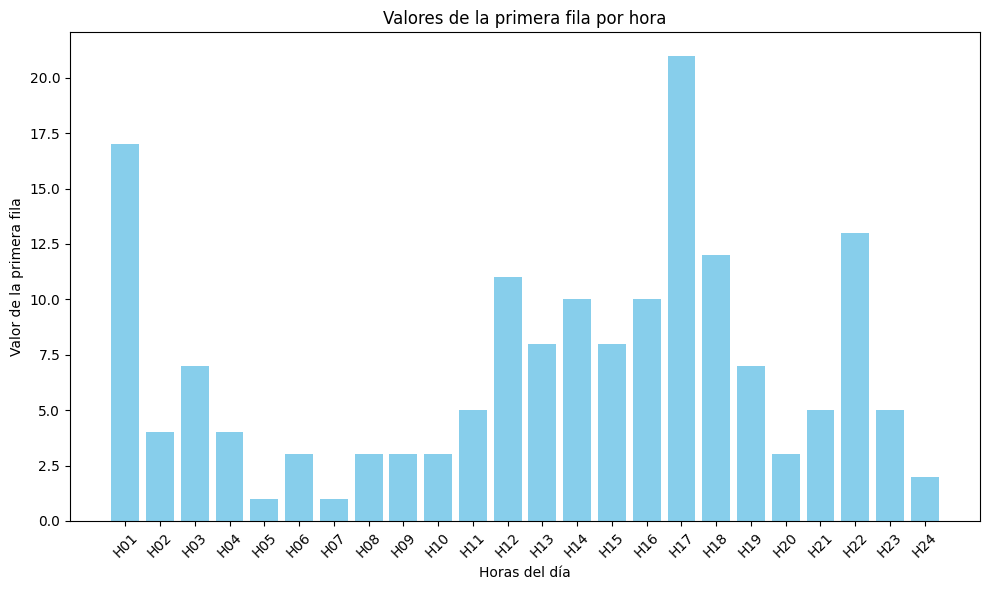

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  2.           4.           4.           3.           1.
   8.          77.         140.         243.          35.
  38.          12.          45.           5.83333333   5.66666667
   7.13333333  18.          31.          16.          12.
   9.           7.           8.          15.        ]


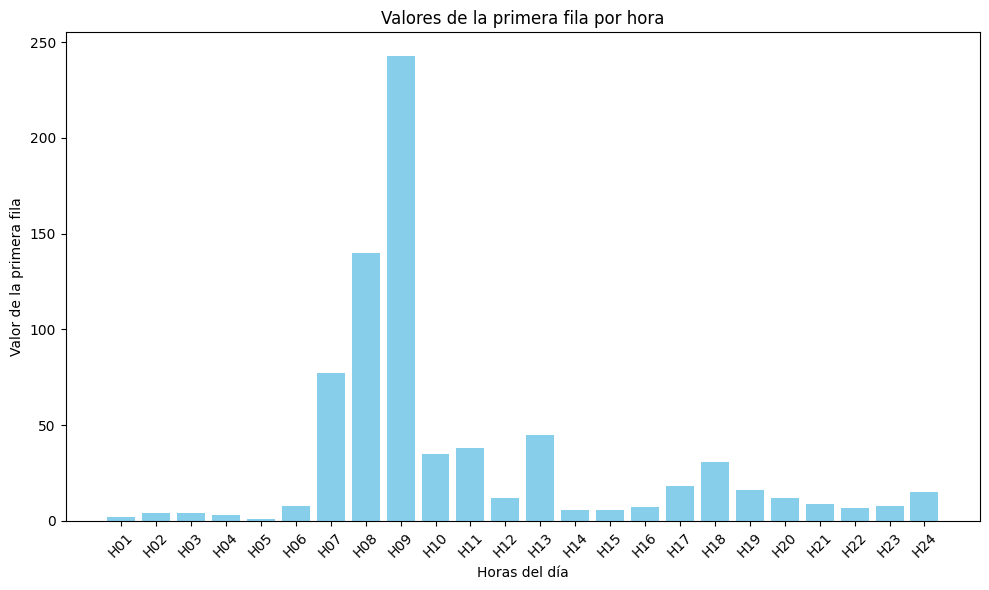

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 8.  6.  7.  5.  3.  3. 17. 44. 57. 42. 56. 27. 22. 24. 22. 23. 24. 29.
 22.  8. 21. 22. 48. 32.]


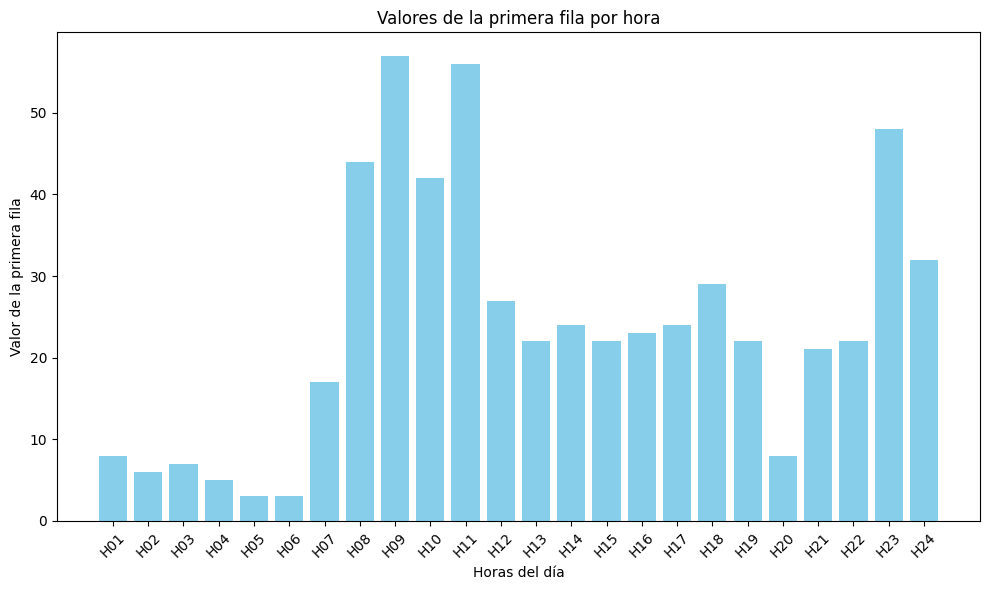

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [11.  2.  2.  5.  1.  2.  6. 48. 22. 17. 18. 23. 11. 22. 22. 24. 23. 39.
 32. 17.  8.  5. 15.  9.]


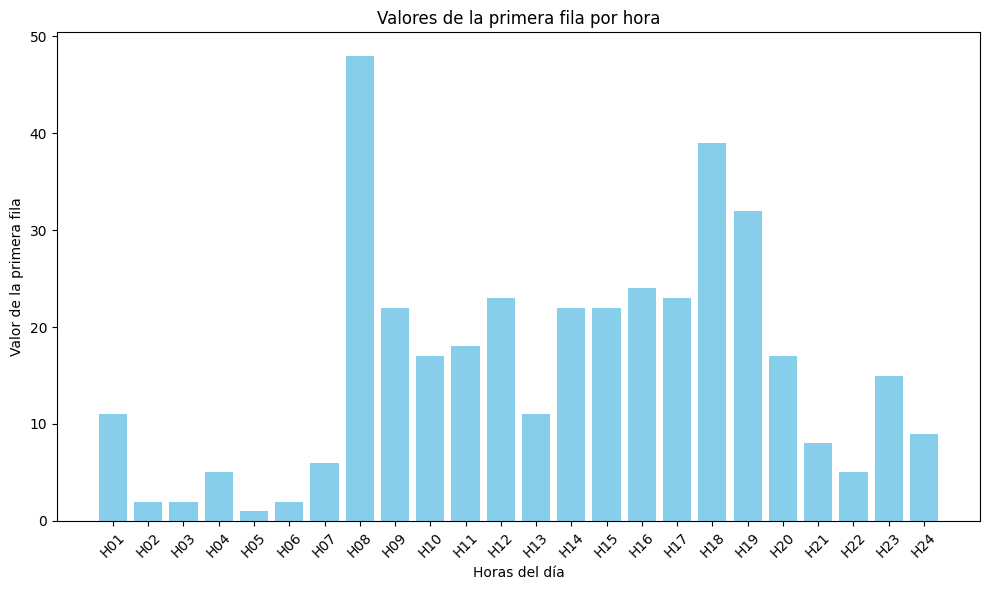

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 8.  6.  9.  5.  3.  2.  3. 10. 21. 17. 31. 14. 23. 47. 46. 45. 35. 38.
 40. 37. 28. 18. 18.  5.]


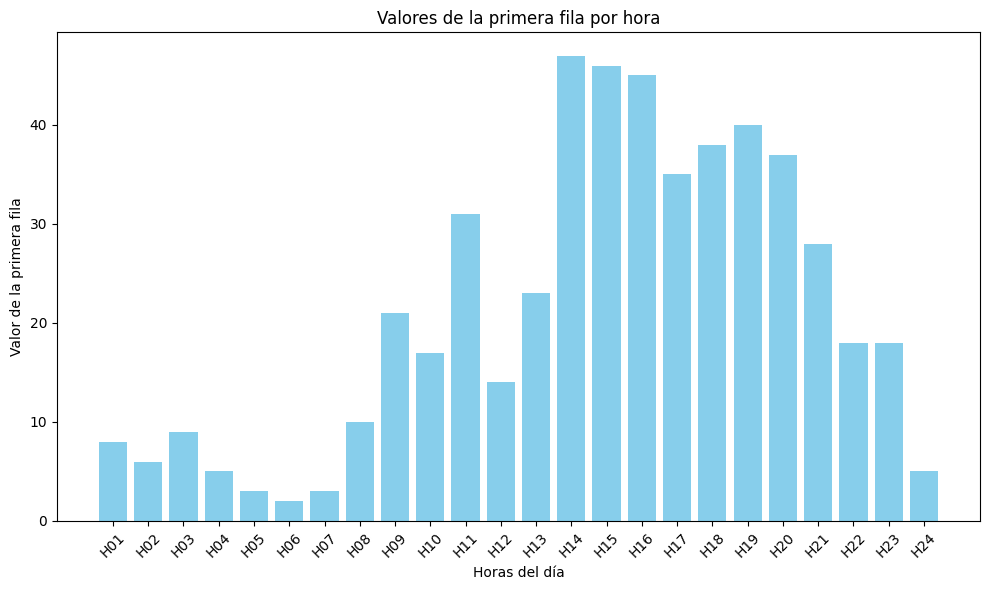

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  7.  2.  2.  1.  1.  1.  8. 12. 18. 25. 97. 56. 50. 47. 40. 34. 19.
 28. 27. 38. 22. 19. 12.]


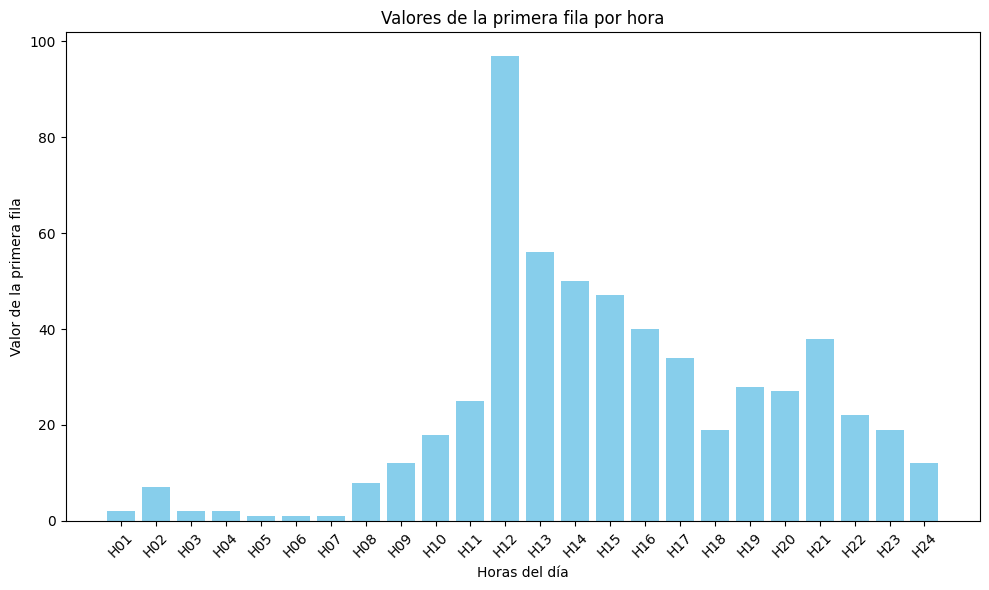

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10. 12.  8.  3.  5.  1.  2.  4.  5. 21. 30. 84. 33. 28. 34. 13. 14. 10.
 13. 12. 11.  9.  2.  3.]


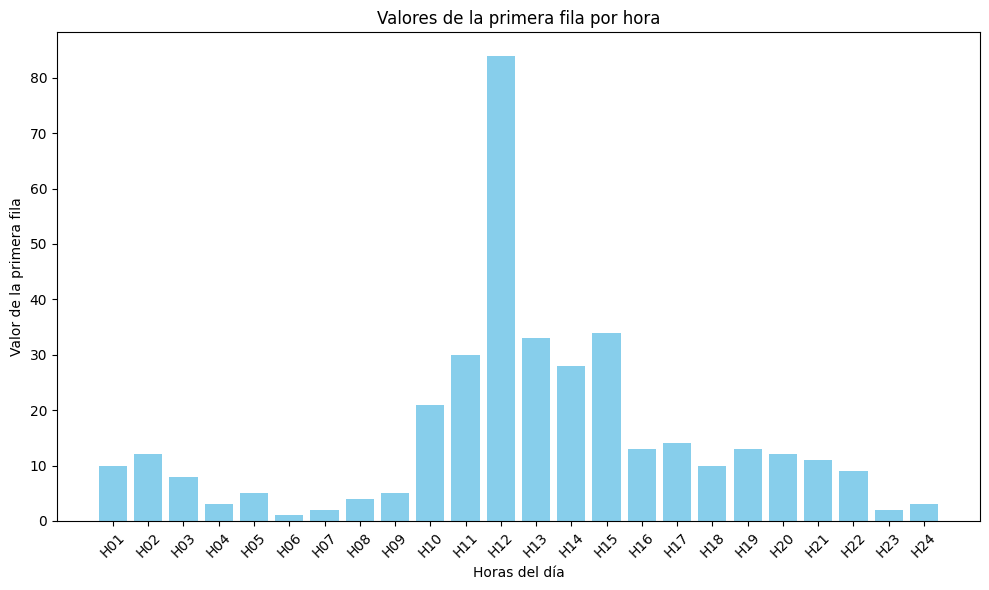

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.          6.          2.         10.         20.          6.
  7.          8.          6.          7.          7.         17.
 38.         23.         23.         19.         18.         18.
 21.         17.         16.         18.         16.         16.66666667]


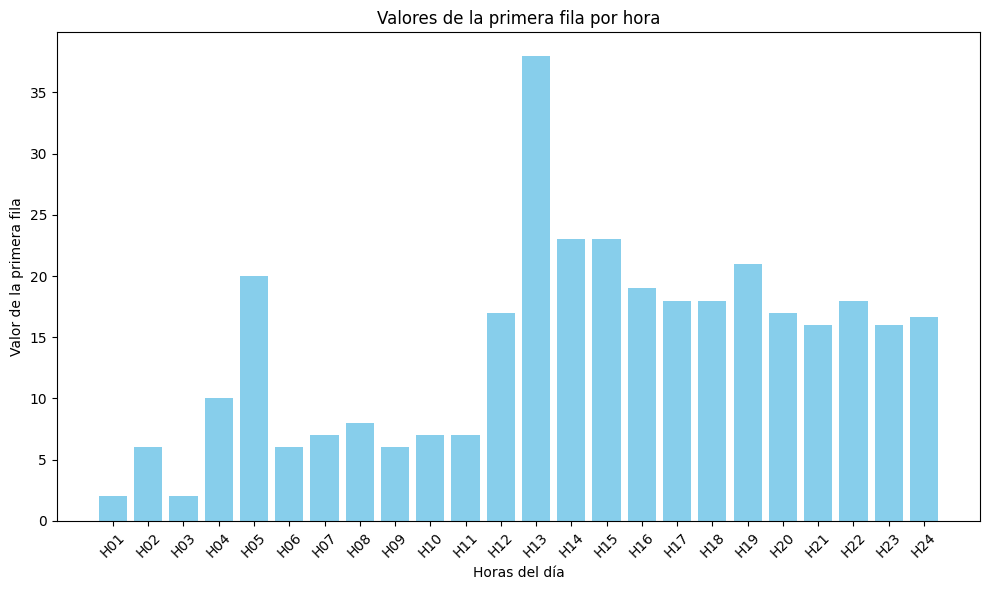

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 9.66666667  7.33333333  5.66666667  9.66666667 13.          6.33333333
  8.33333333 32.         28.         19.66666667 15.33333333 18.33333333
 29.66666667 16.         16.         20.         22.         19.
 19.         23.         20.          9.          6.          7.        ]


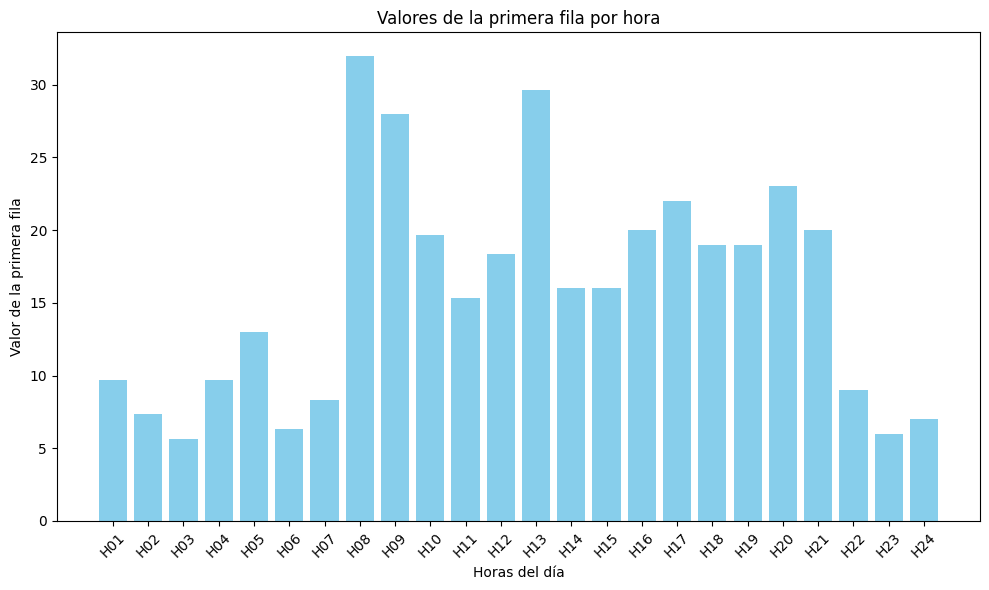

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 5.  6.  3.  4.  4.  4.  6. 37. 46. 35. 42. 30. 28. 23. 14. 14. 20. 27.
 35. 27. 22.  8.  9. 12.]


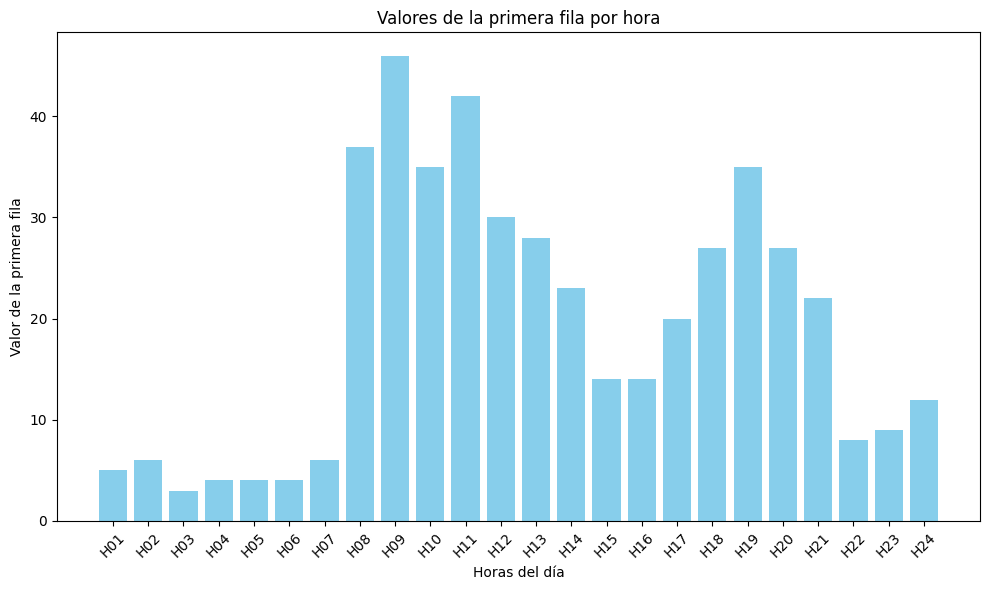

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [11.  6.  4.  5.  4.  4. 13. 80. 70. 45. 31. 28. 34. 23. 23. 22. 21. 17.
 22. 22. 24. 13. 11.  9.]


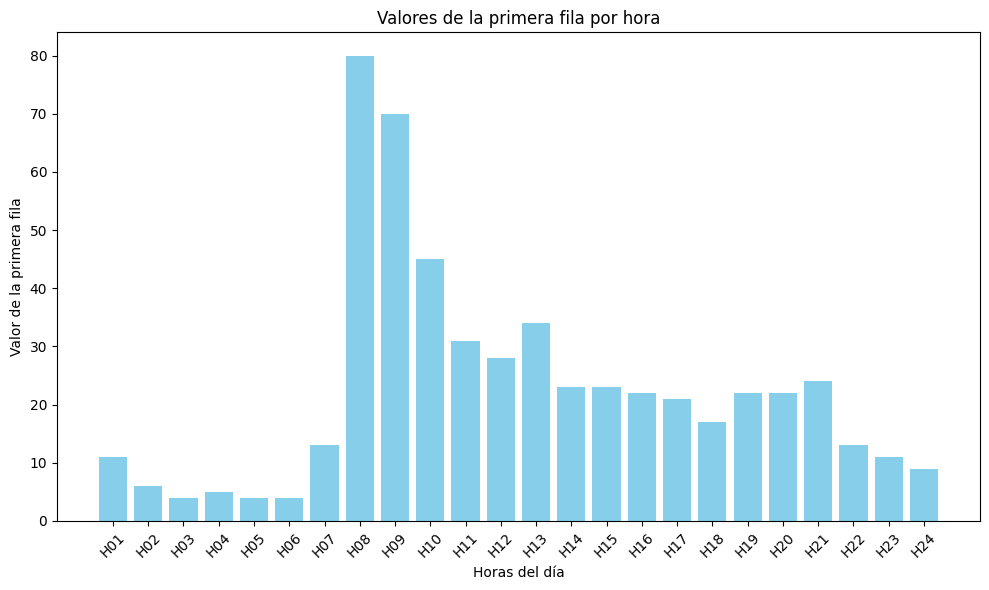

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10.  6.  4.  5.  4.  2.  5. 11. 20. 22. 17. 20. 19. 20. 20. 12. 12. 13.
 11.  9.  9.  8.  7.  5.]


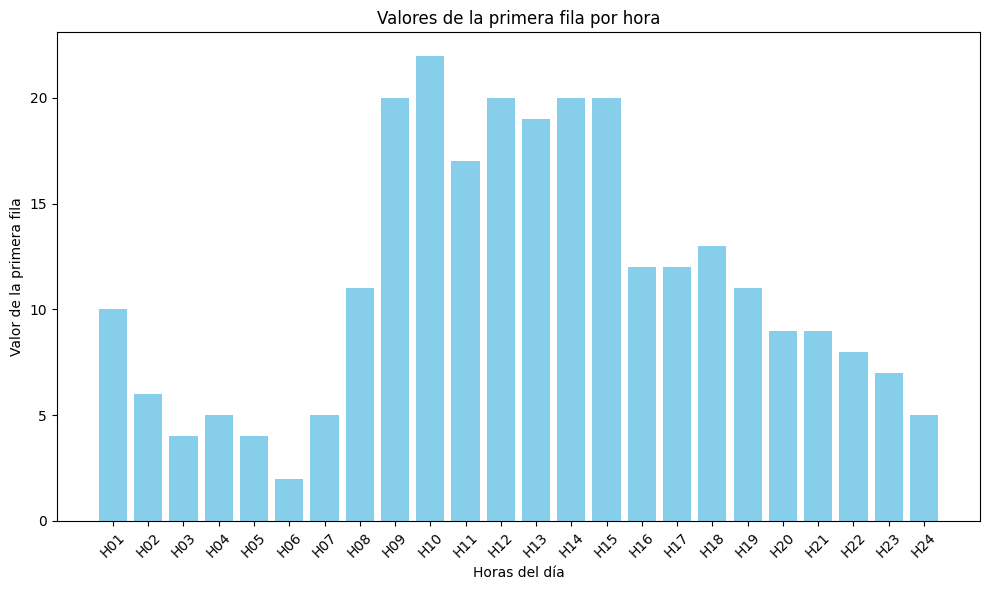

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [8. 3. 3. 5. 3. 2. 3. 3. 5. 4. 5. 5. 6. 5. 7. 4. 4. 5. 3. 4. 6. 5. 5. 2.]


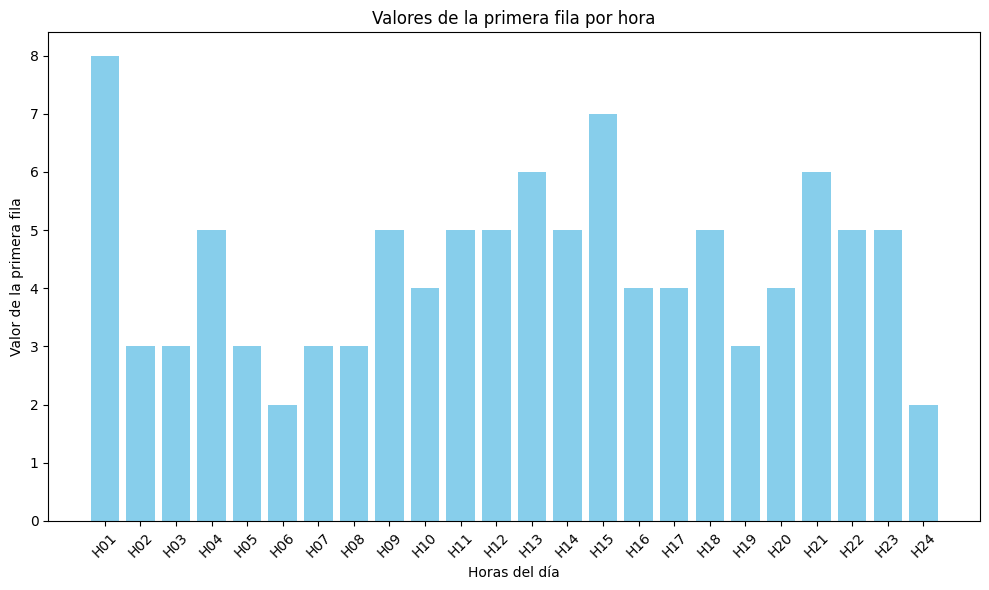

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  4.  3.  5.  2.  2.  2.  3.  3.  3. 10.  9.  6.  6.  8.  6.  5.  7.
  8. 10.  5.  3.  4.  8.]


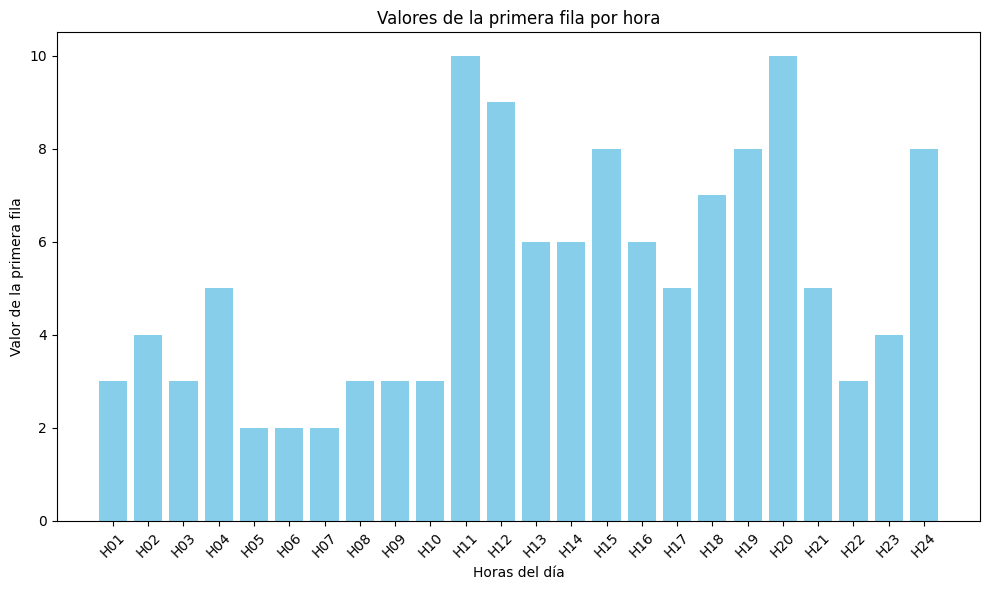

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [5. 2. 3. 5. 2. 2. 2. 2. 3. 4. 4. 5. 5. 8. 5. 5. 8. 6. 7. 9. 8. 3. 4. 4.]


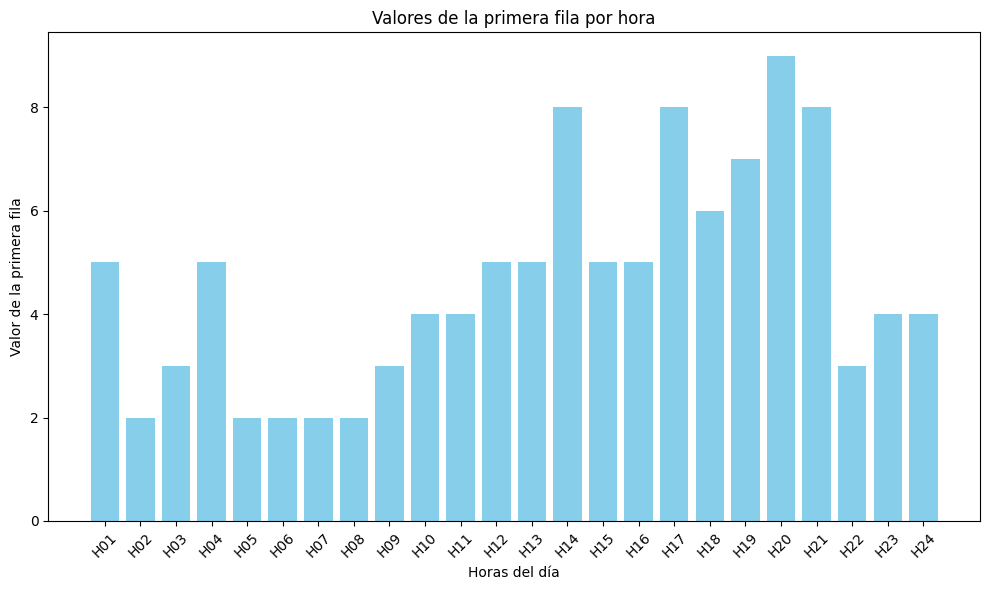

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [4. 5. 7. 2. 2. 2. 2. 2. 4. 6. 6. 7. 7. 8. 8. 6. 8. 9. 5. 8. 6. 4. 2. 5.]


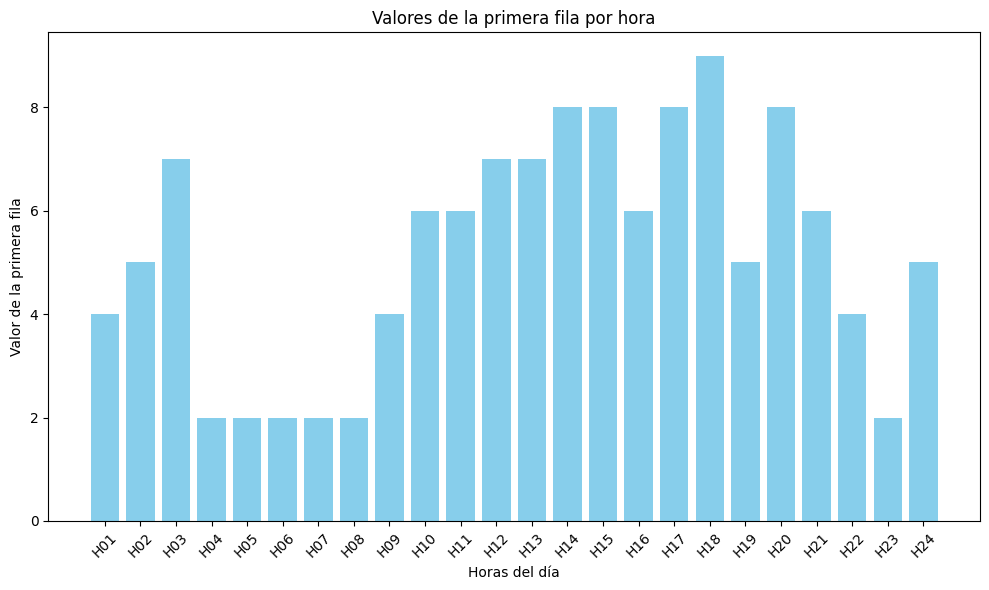

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  7.           1.           1.           5.           4.
  10.          34.         109.          72.          17.
  27.66666667  24.          28.          27.33333333  19.
  27.          25.          31.          35.          25.
  12.          24.          21.          16.        ]


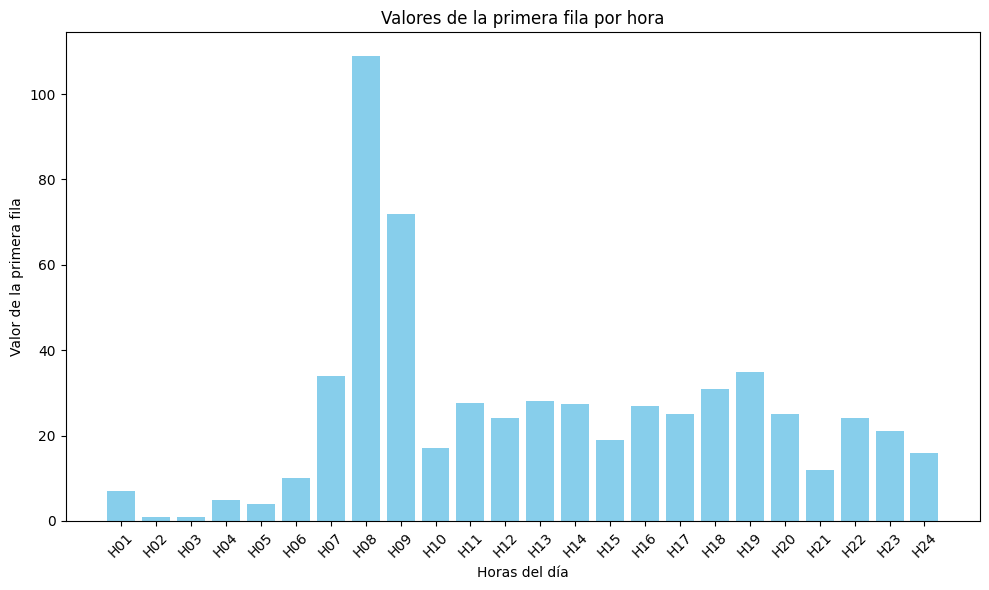

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10.  6.  6.  3.  3.  3. 20. 15. 11. 31. 12. 27. 39. 28. 15. 14. 14. 14.
 12. 12. 23. 23.  7.  8.]


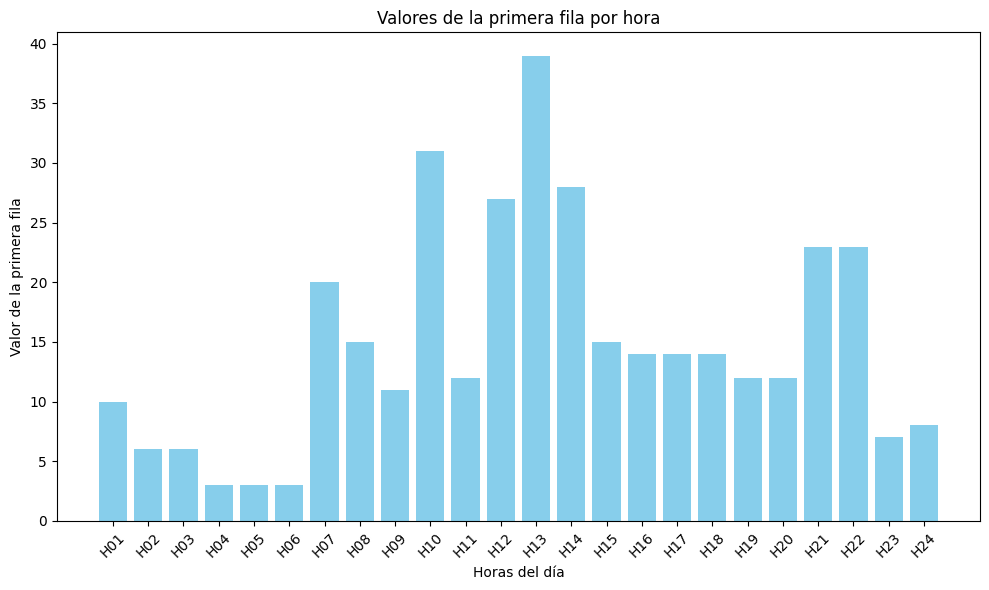

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 7.  3.  4.  5.  3.  4. 11. 25. 28. 23. 25. 20. 31. 26. 21. 21. 58. 43.
 12. 14. 18.  6.  3.  3.]


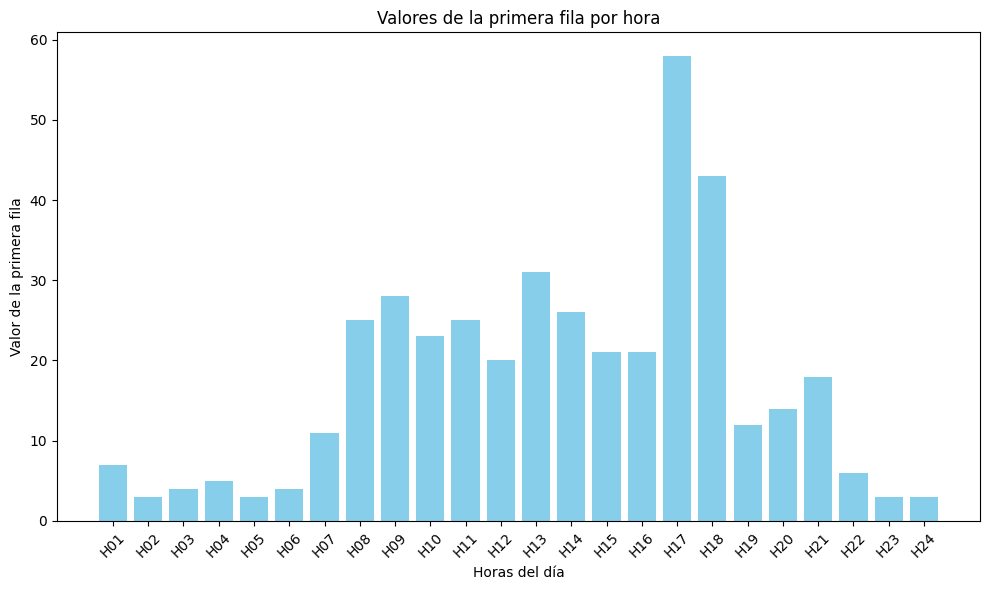

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 7.  6.  3.  3.  2.  5.  5.  8. 19. 12. 11. 14. 13. 14. 20. 25. 39. 33.
 26. 18. 25. 21. 21. 17.]


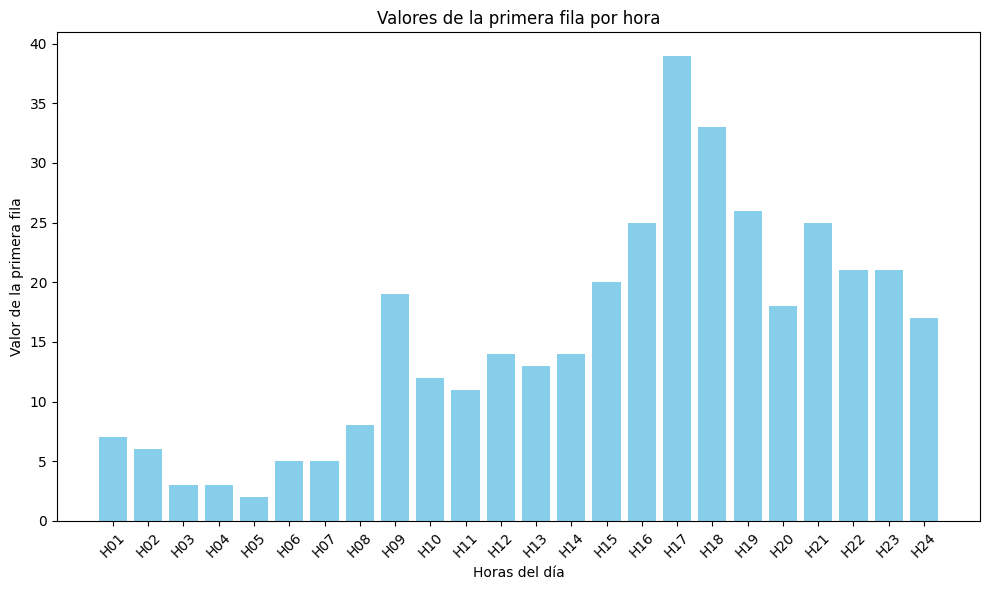

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [23. 14. 10.  7. 10.  2.  6.  5. 16. 14. 24. 47. 36. 30. 23. 14. 23. 26.
 34. 17. 24. 20. 24. 19.]


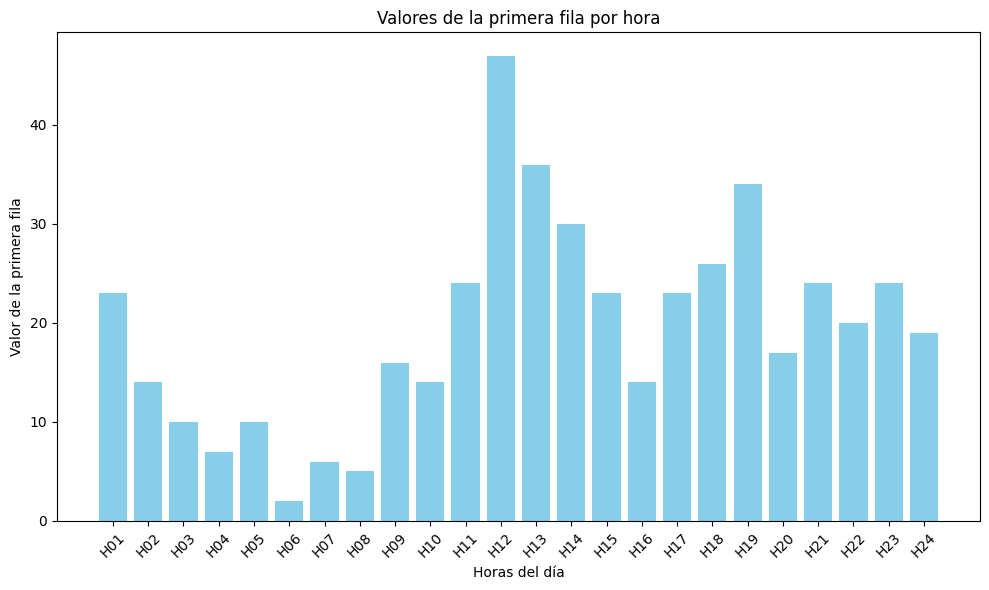

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [16.         10.         11.         14.         15.          9.
  5.         13.         14.33333333 13.         13.         13.
 12.66666667 13.         14.33333333 13.         10.66666667 11.33333333
 12.66666667 16.         19.33333333 18.         21.66666667 15.        ]


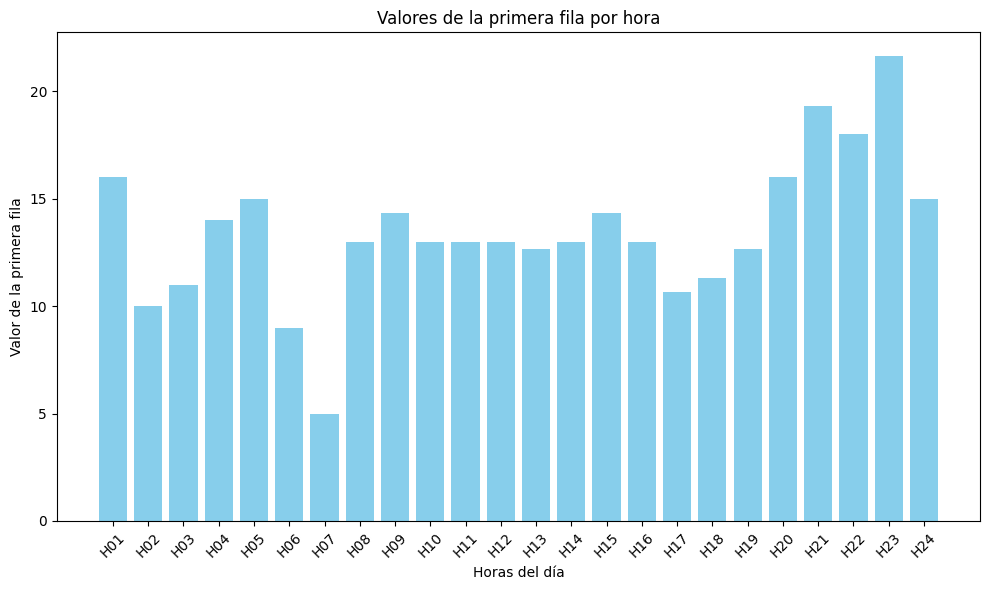

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [10. 14. 12.  5.  3.  5.  7. 16. 15. 17. 32. 82. 92. 45. 42. 34. 25. 28.
 20. 23. 19. 17. 10.  4.]


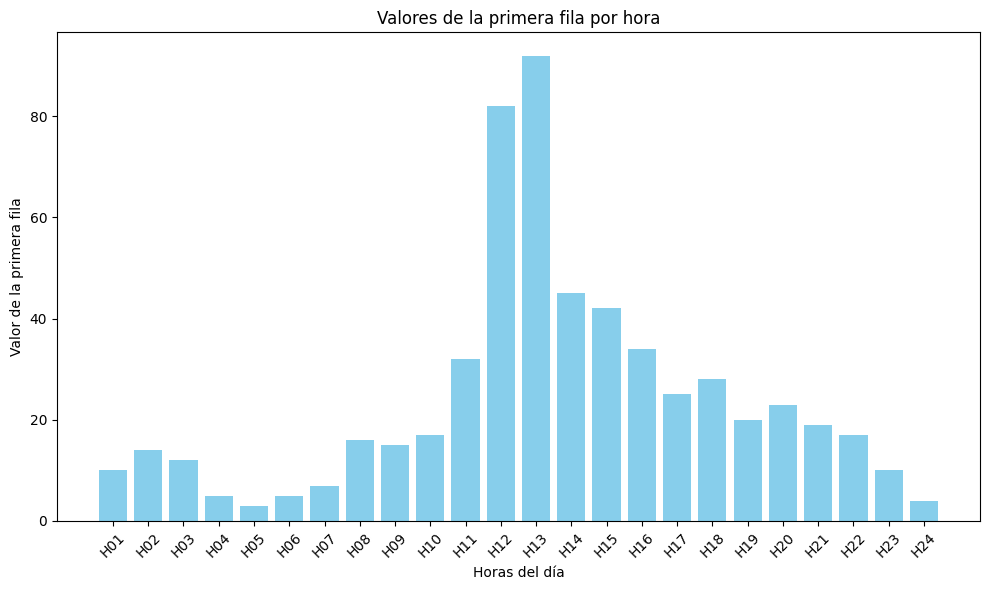

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  2.  2. 10.  6.  5.  6. 22. 23. 17. 50. 44. 36. 30. 23. 25. 22. 23.
 19. 27. 18. 19.  9.  6.]


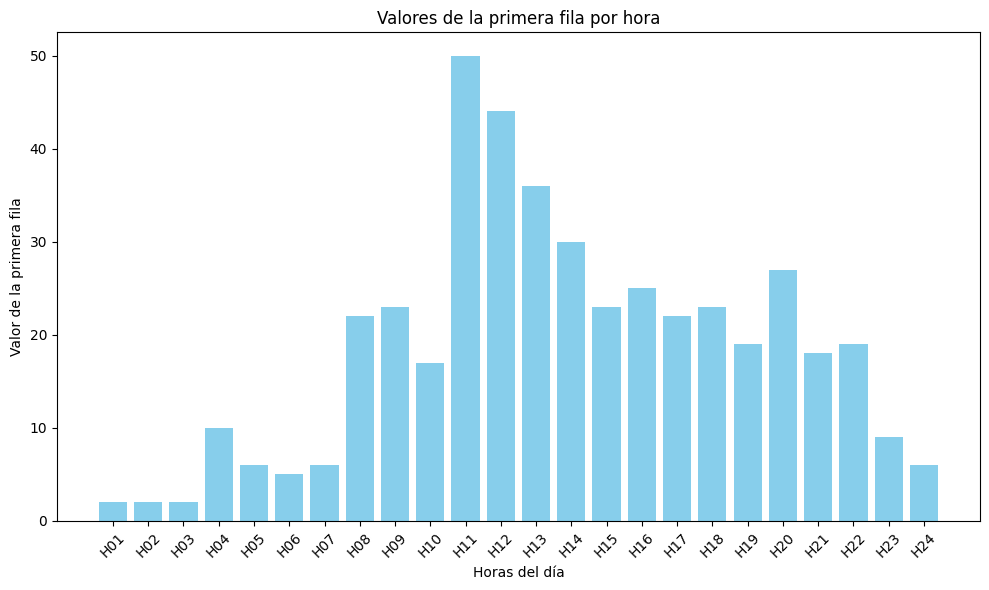

In [261]:
#Eixample:
df_o3_eixample = df_o3[df_o3["ESTACIO"] == 43]
for i in range(0, 29):
  plotear_ozono(df_o3_eixample, i)

# Evolucio de la concentració de ozo Valle-Hebron i Observatori (estacions part alta)

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 93. 171.  98.  23.   4.   7.  27.  40.  50.  31.  26.   9.   4.   3.
   2.   1.   2.   1.   1.   1.   2.   1.   1.   1.]


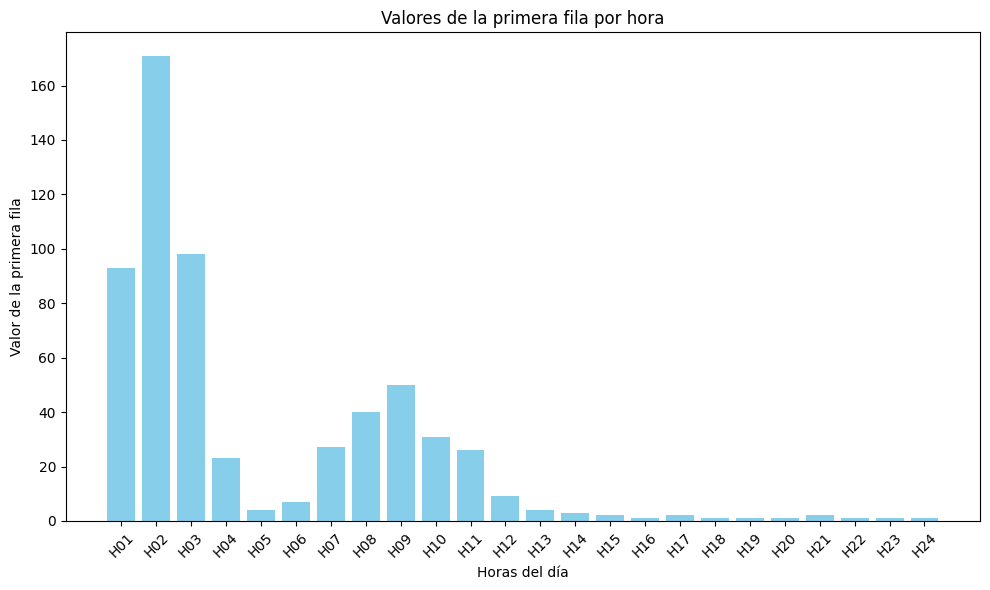

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 3. 5. 3. 3. 3. 2. 3. 3. 5. 3. 7. 2. 2. 4. 1. 3. 6.]


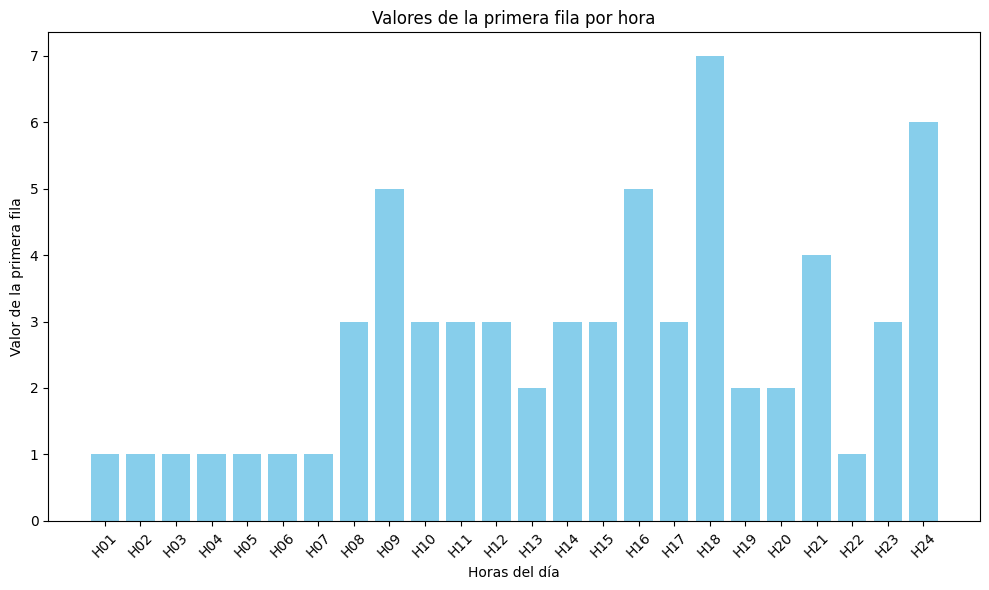

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  1.   1.   1.   1.   1.   4.   5.   4.   9.   8.   4.   5.   4.   3.
   7.   6.   4.   3.   3.   1.   2.   3.   2. 156.]


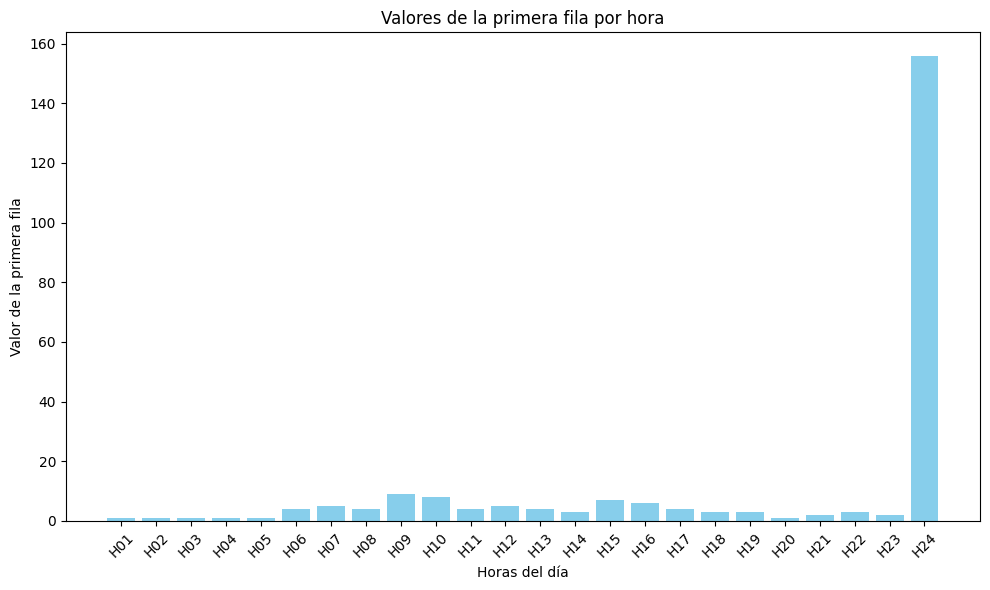

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [39.  2.  1.  1. 97. 57. 21. 84. 92. 13. 11. 11. 10.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


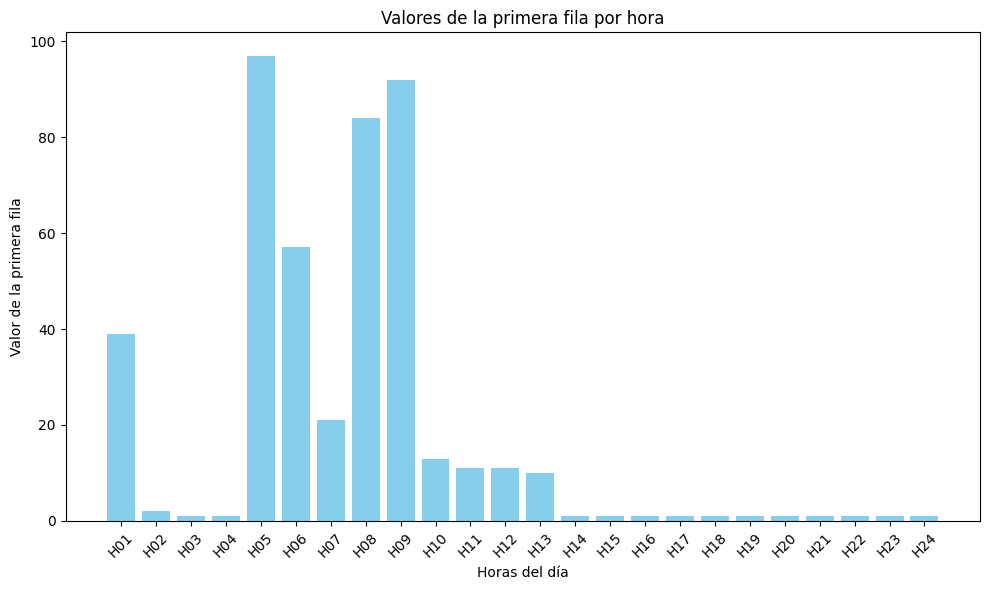

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  2.   4.  20.   2.  13.   1.   2.   3.   4.   3.   5.   4.   3.   2.
   3.   2.   2.   1.   1.   1.   1.   2.  55. 207.]


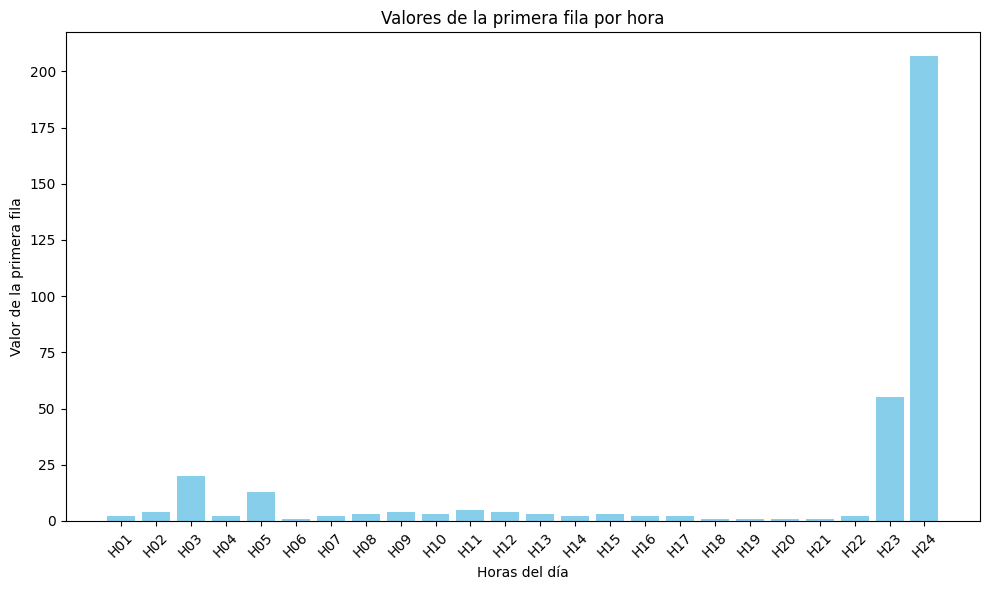

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [70.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  3.  2.  2.  1.  1.  1.  1.
  1.  3.  4. 55.  2. 16.]


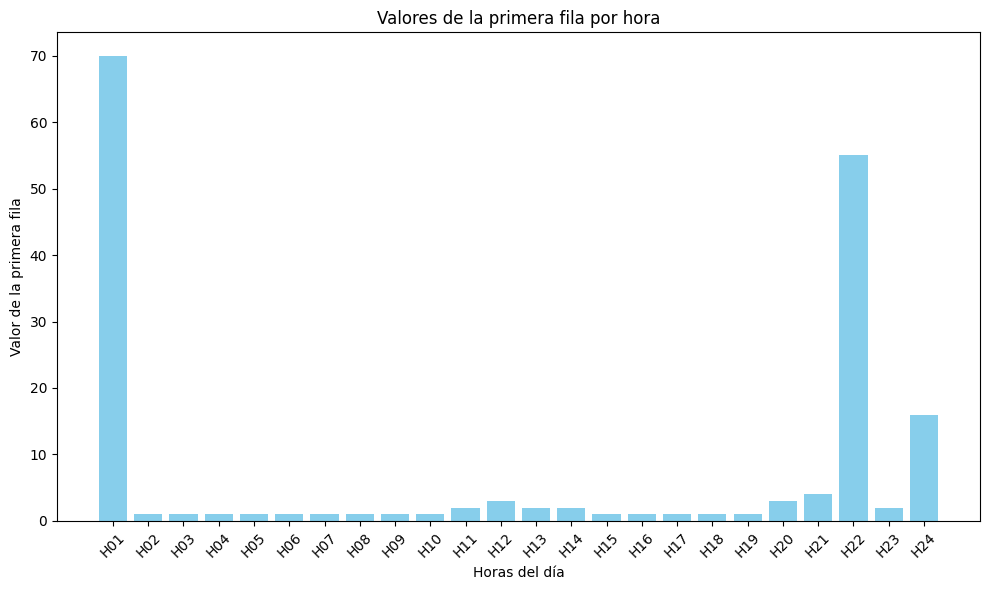

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  4.  1.  8.  2.  2.  5.  6. 16.  9.  8.  9.  4.  4.  2.  2.  9.  3.
  3.  2.  1.  2.  5. 16.]


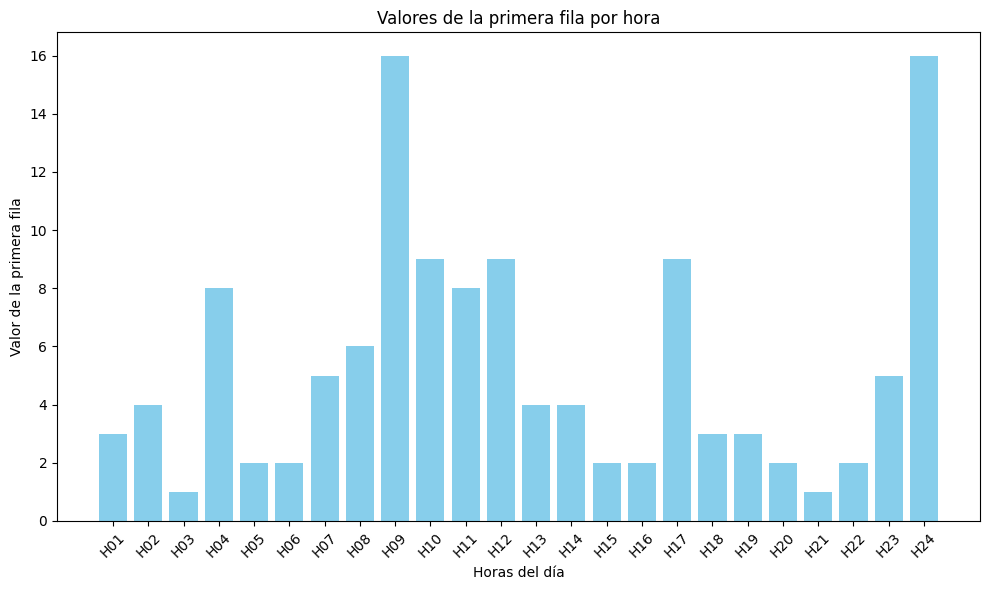

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.          3.          1.          1.          1.          1.
  4.          4.         13.         10.         14.          7.13333333
  2.          2.          1.          1.          1.          2.
  3.          3.          4.         10.          3.          2.        ]


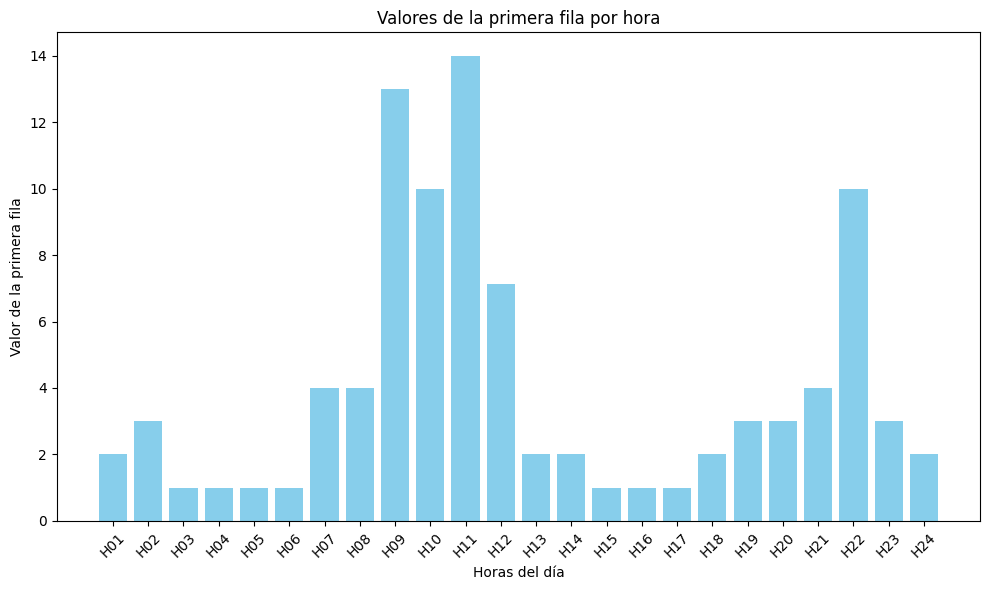

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  4.  5.  1.  1.  2.  3.  5. 18. 19. 11.  8.  4.  2.  2.  2.  2.  4.
  3.  3. 39.  9.  2. 26.]


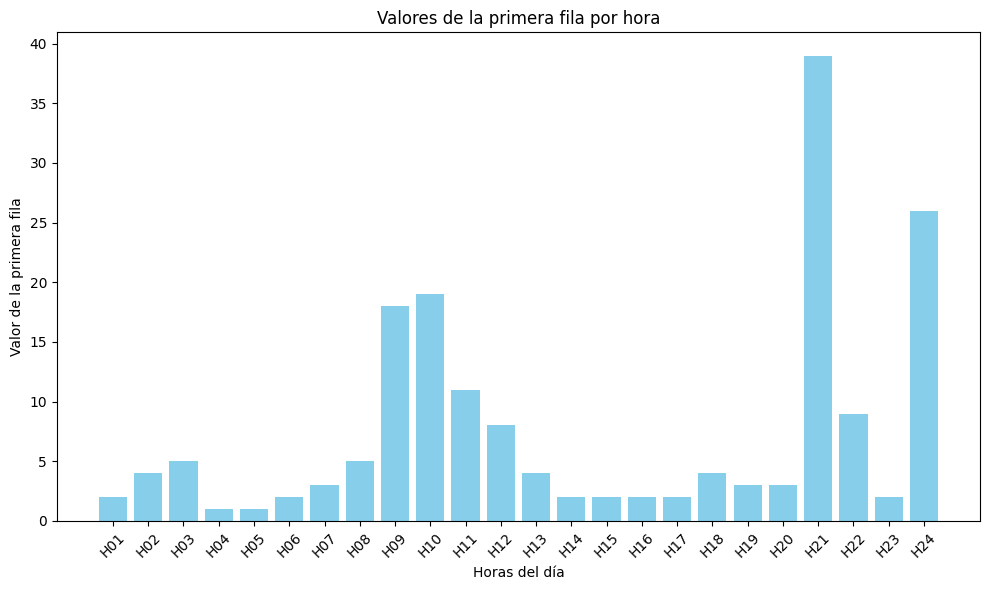

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [67. 20.  1. 19.  4.  3.  2.  4.  8.  7.  8.  9.  3.  6.  5.  3.  3.  3.
  2.  1.  2.  2.  1.  9.]


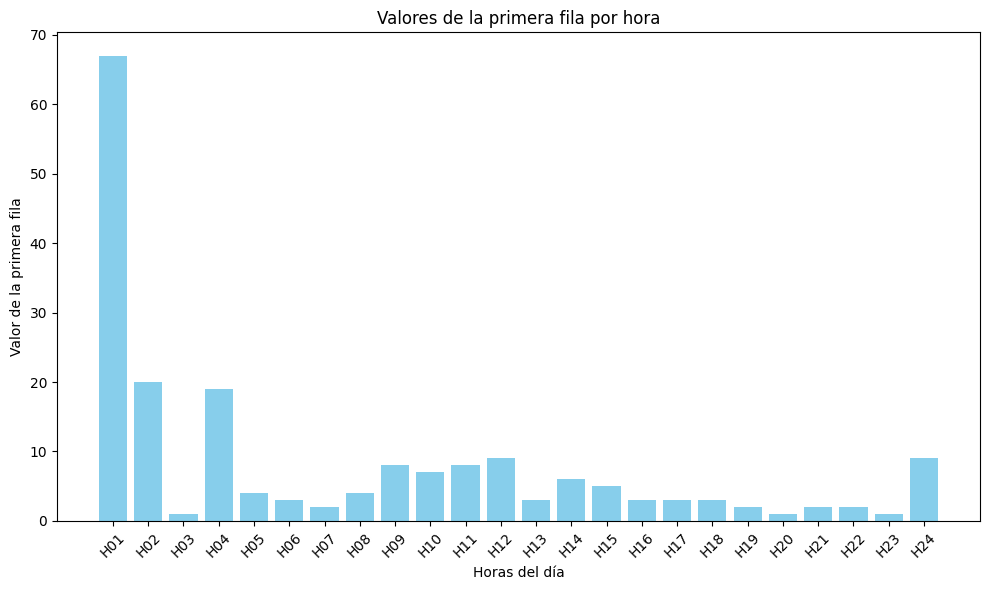

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [23.  4. 25.  9.  4.  2.  4. 17. 29. 13.  8. 19. 14. 10. 19.  7.  4.  2.
  1.  1.  1.  1.  1.  4.]


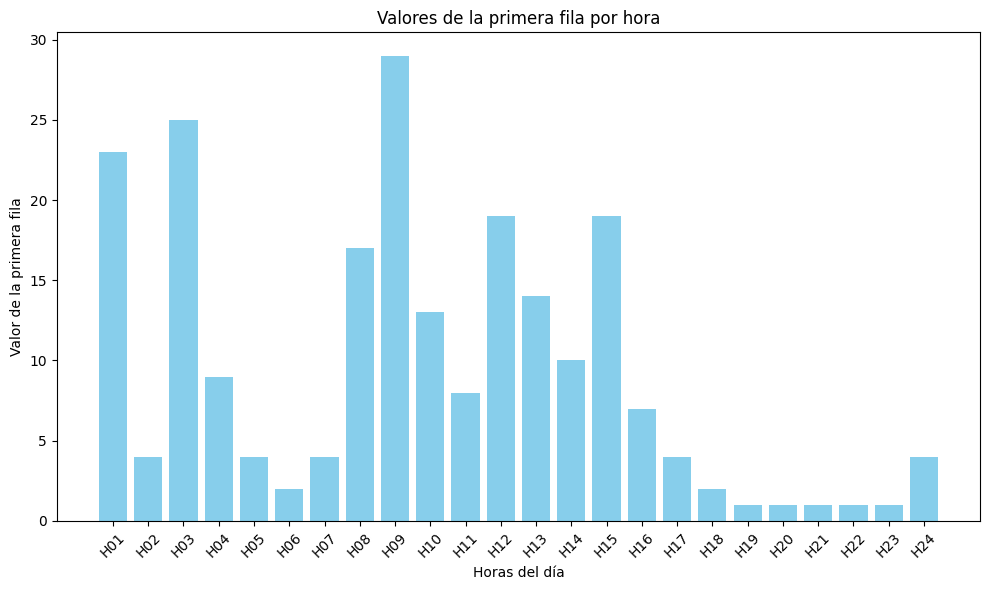

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [  1.   1.   4.   4.   2.   4.   4.  12.  20.   8.   4.   4.   6.   7.
   9.   8.   3.   1.   1.   1.   1.   3.  31. 181.]


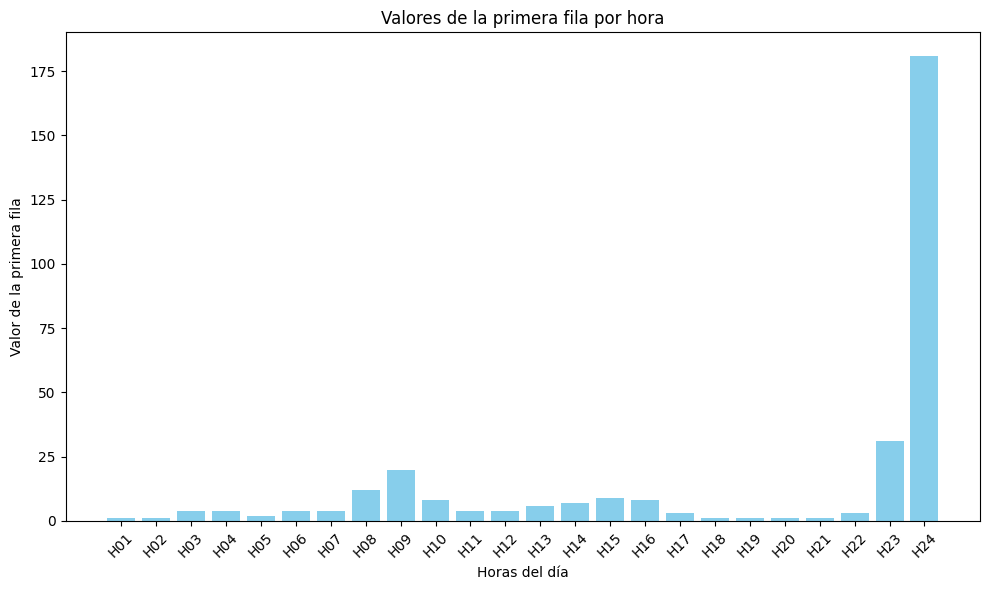

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [237. 105. 112.  80.   2.   1.   1.   1.   3.   3.   3.   2.   2.   2.
   2.   2.   2.   1.   1.   1.   1.   1.   1.   1.]


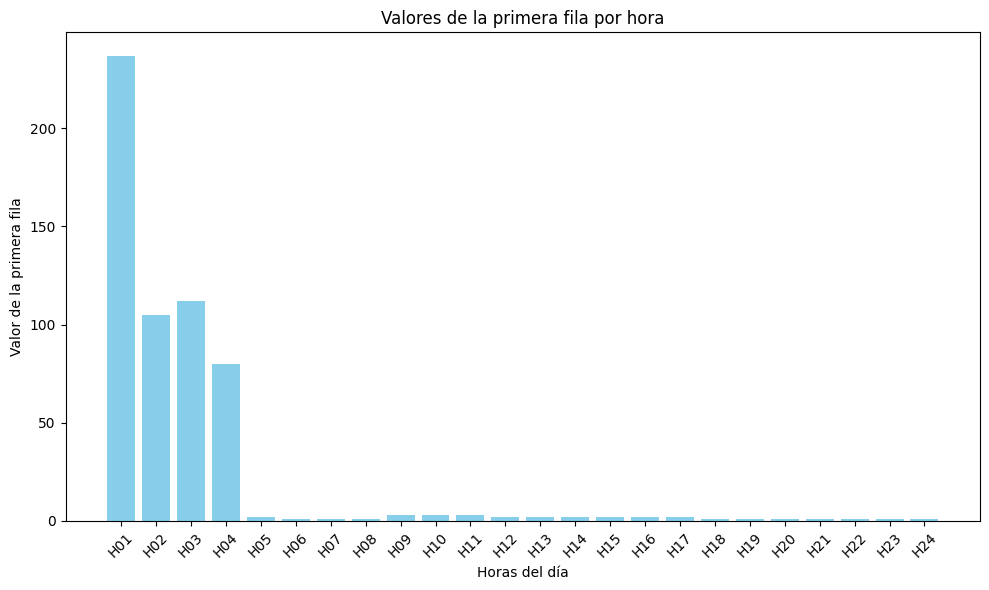

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 3.  1.  1. 40.  6.  2. 11. 81. 13.  7.  3.  3.  2.  2.  1.  1.  2.  1.
  1.  1.  1.  1.  1.  1.]


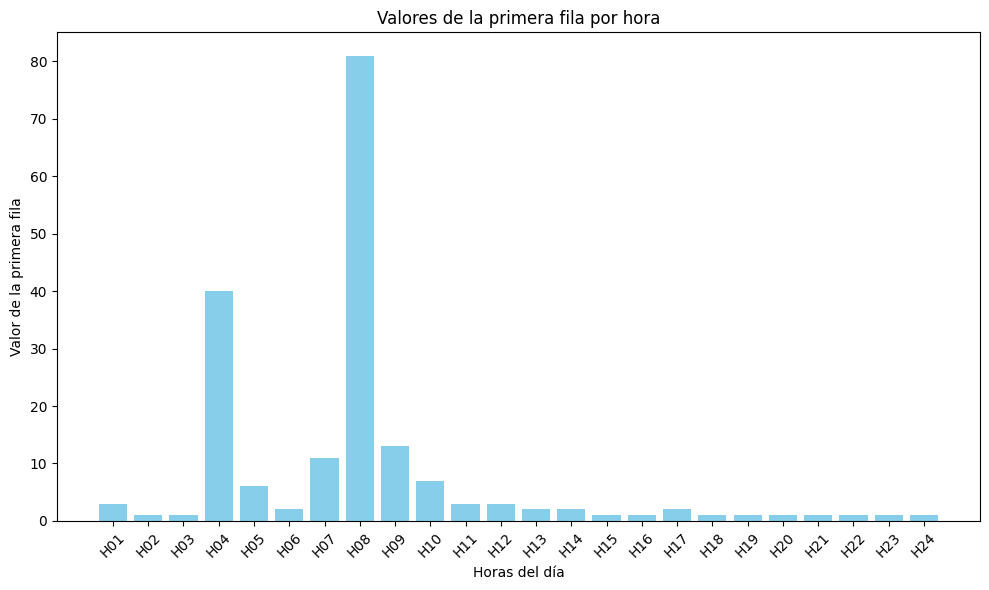

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 2. 4. 5. 6. 4. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


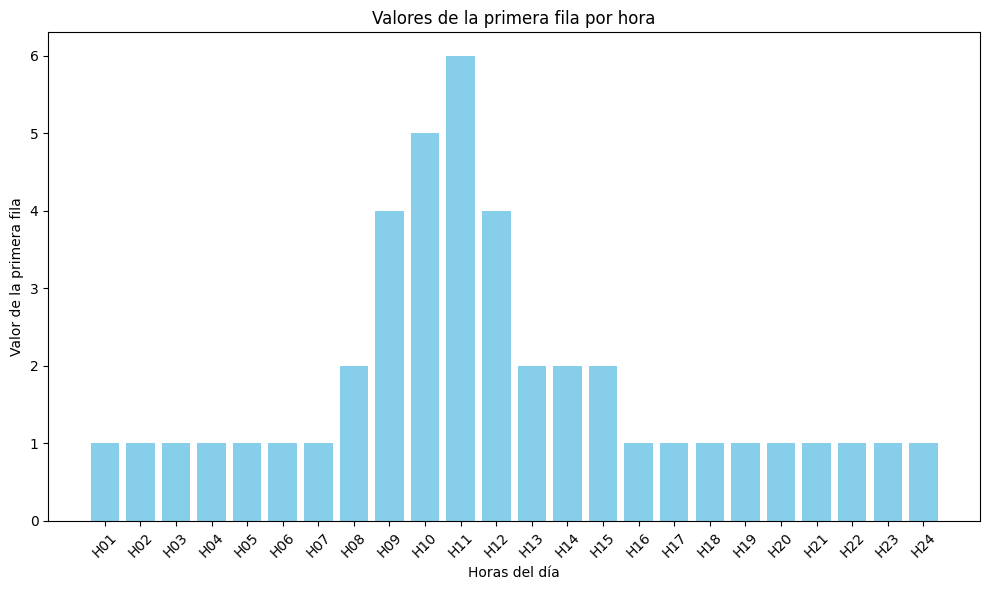

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  2. 15.  3. 13.  2.  9. 12.  6.  2.  1.  2.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


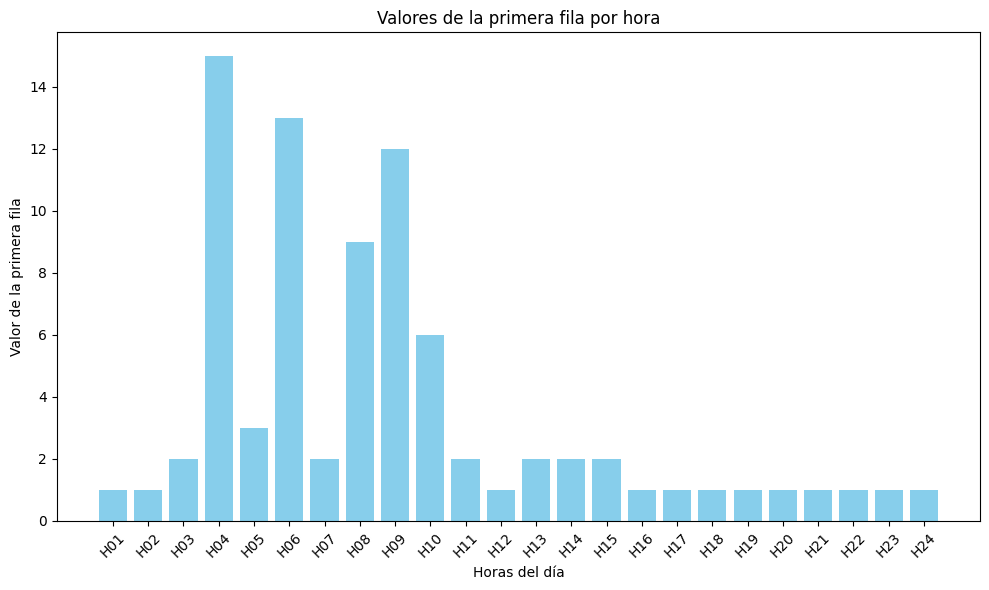

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 3. 8. 8. 5. 4. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1.]


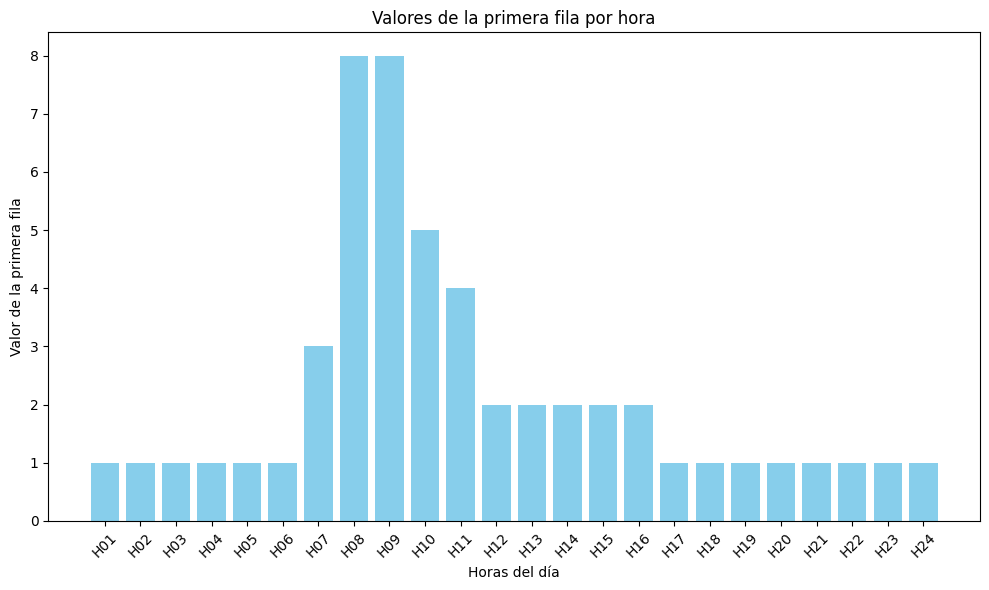

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


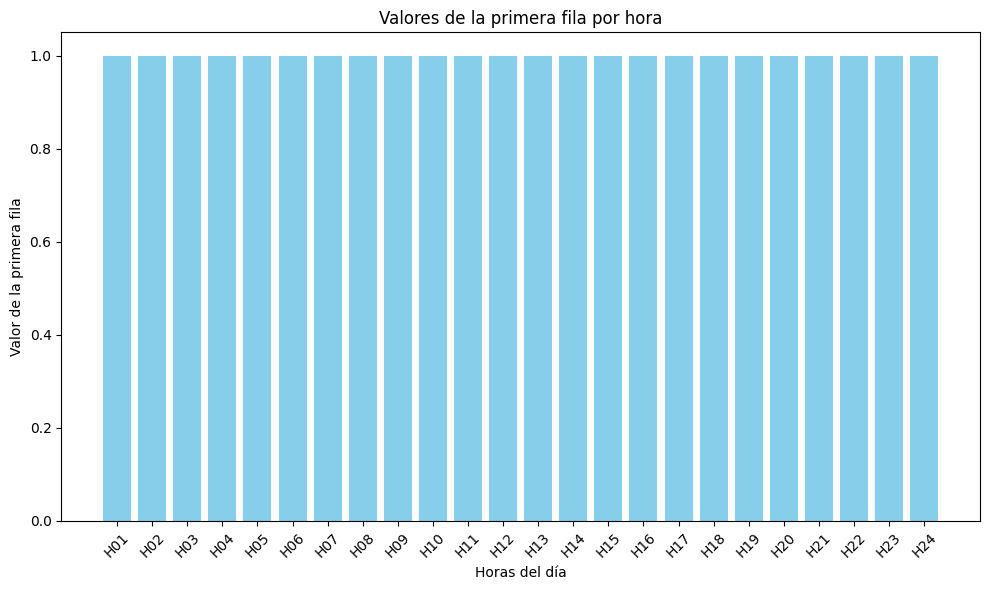

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


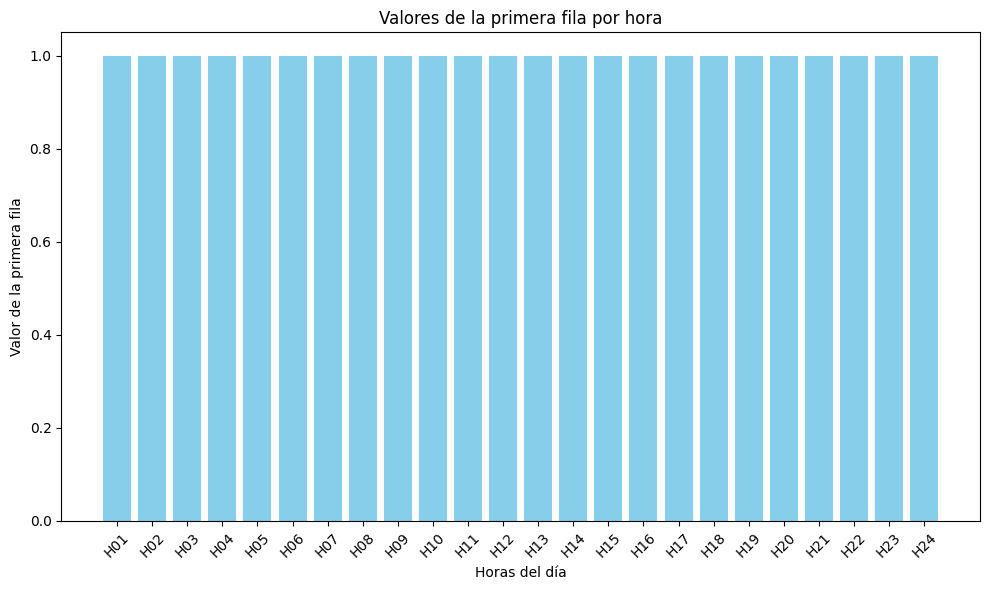

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


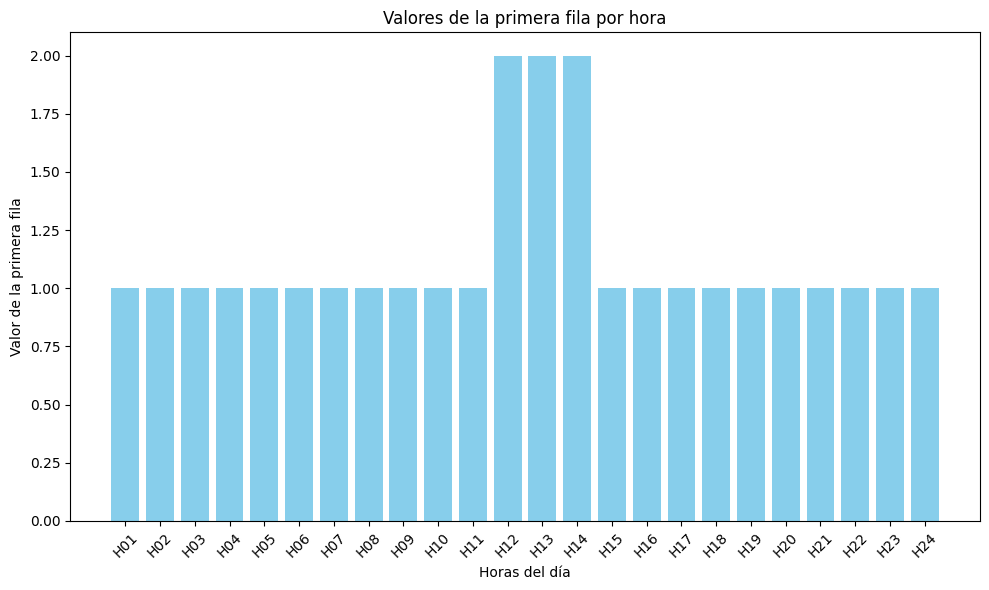

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


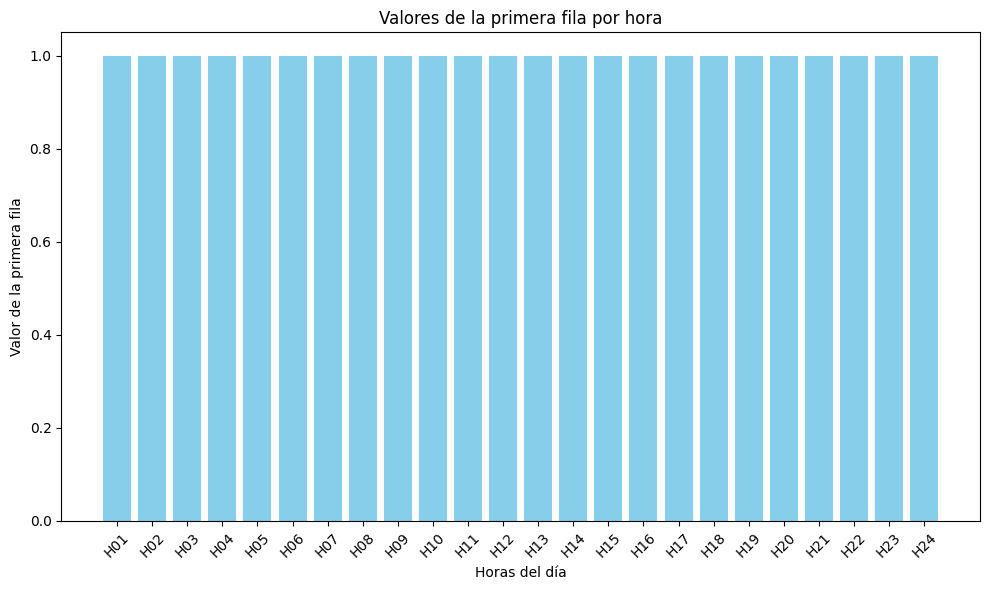

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.          1.          1.          1.          1.          1.
  9.         17.         15.          6.          4.66666667  9.8
  7.46666667  8.          2.          2.          3.          3.
  2.          1.          1.          1.          1.          1.        ]


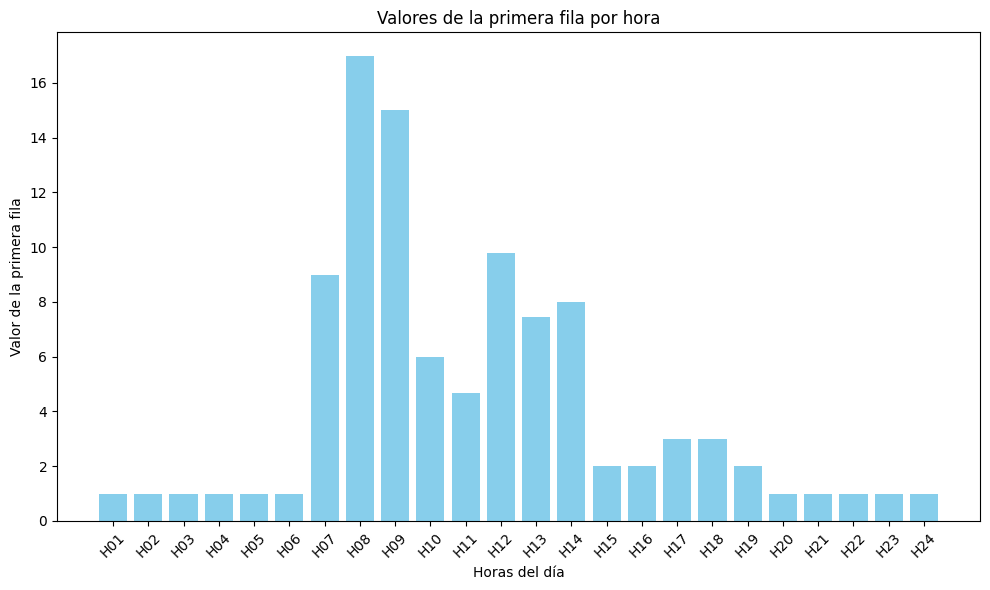

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 2. 4. 4. 5. 3. 3. 4. 3. 2. 2. 3. 3. 2. 1. 1. 1. 1. 1.]


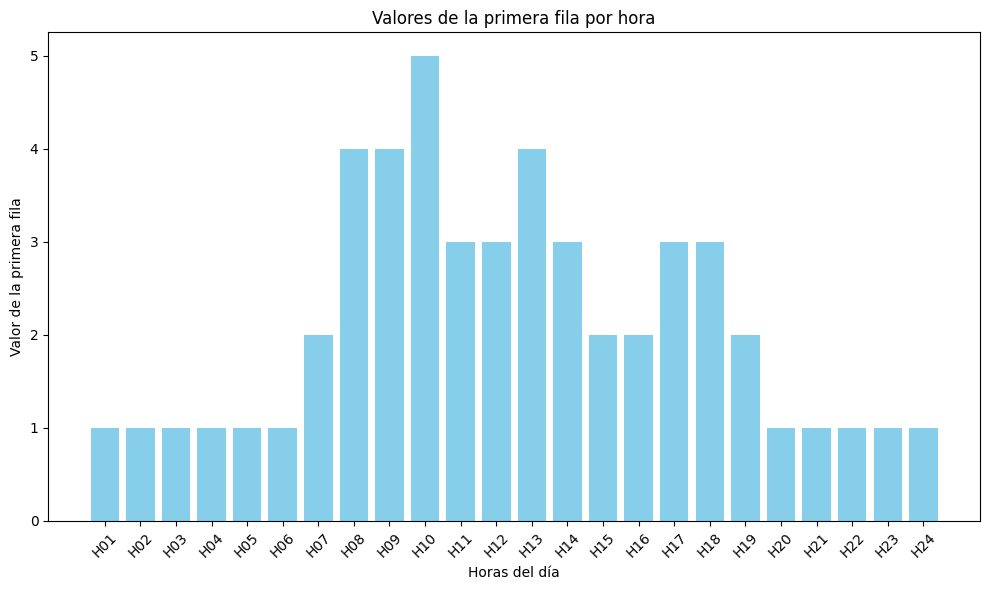

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  1.  2. 12. 14. 14.  4.  7.  5.  3.  3.  8. 10.
  4.  2.  2. 11.  1.  1.]


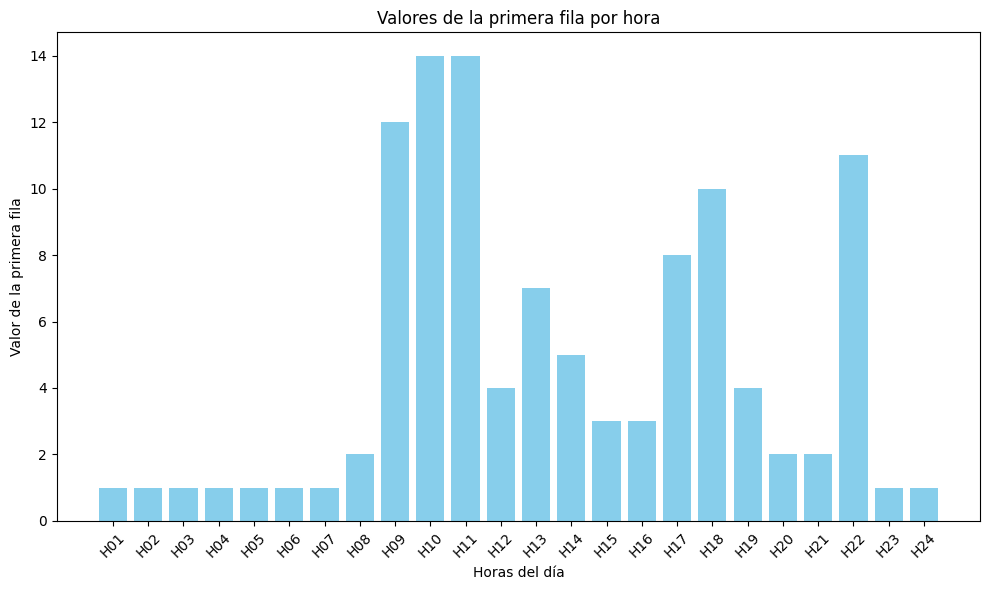

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  2.  1.  3.  6.  6.  7.  6.  6.  5.  3.  3.  4.  4.
  3.  2.  1. 10. 32. 69.]


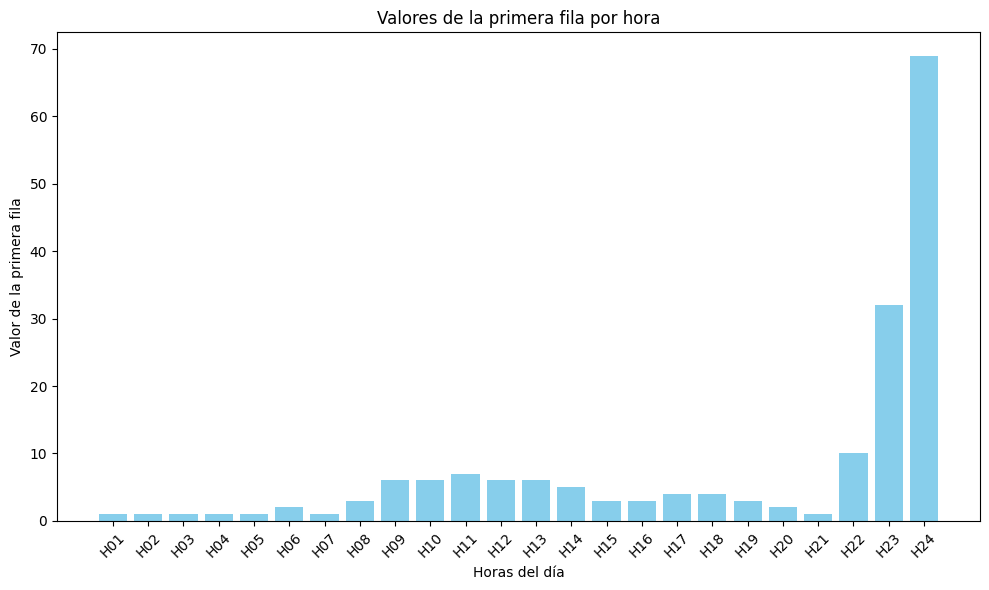

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [78. 68. 12. 14.  3.  1.  1.  1.  2.  2.  3.  2.  4.  8.  8.  4.  4.  4.
  5.  4.  1.  1.  1.  1.]


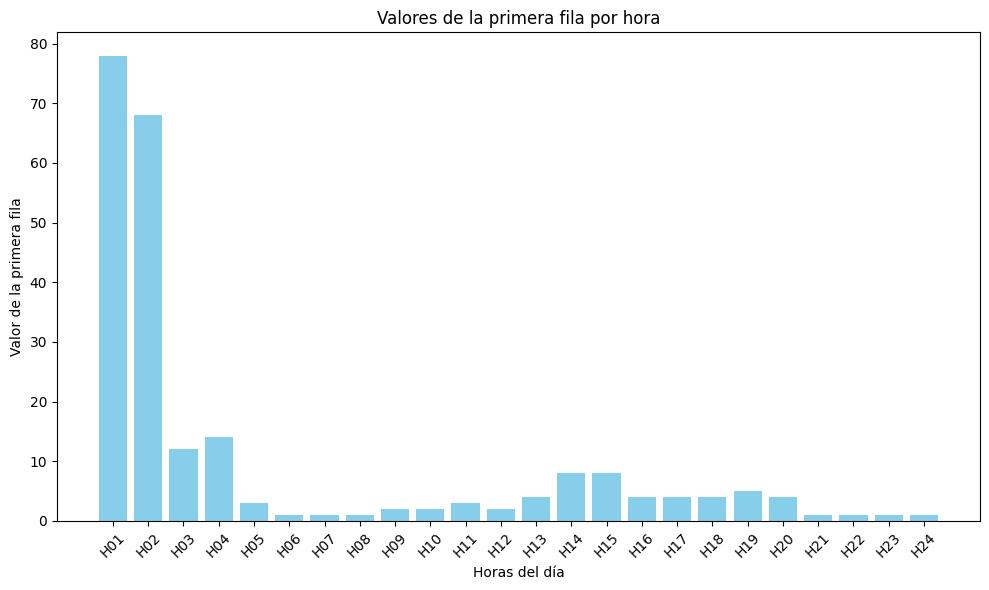

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [26.         81.         61.         29.          5.          2.
 25.         39.         50.         46.66666667 25.66666667 30.13333333
 12.33333333 35.         35.33333333 41.33333333 48.         46.
 47.66666667 55.33333333 51.33333333 32.66666667 29.         26.33333333]


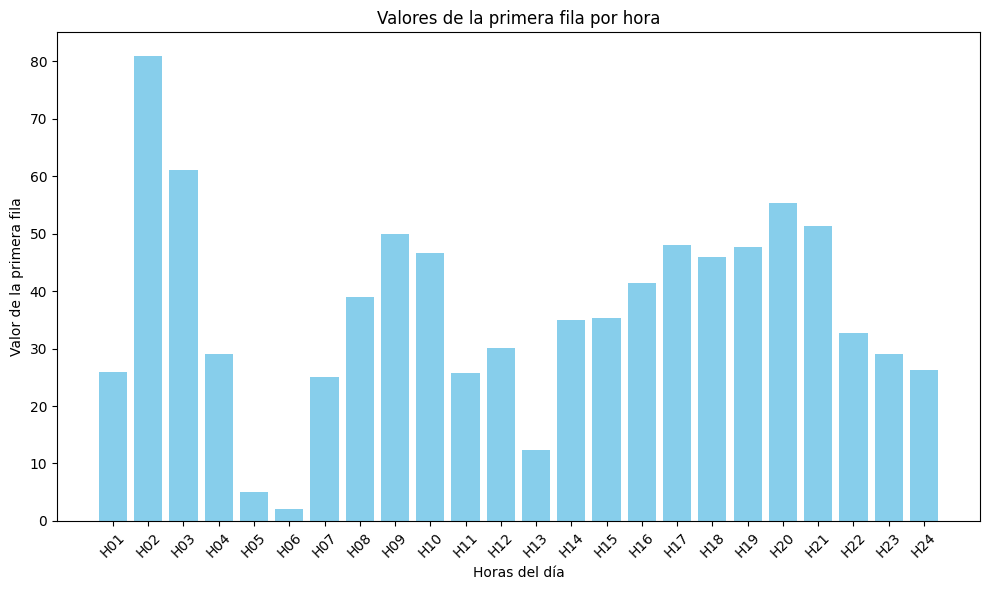

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  1.  5.  9. 11.  6. 15. 19.  8.  4.  8.  4.  9.
  2.  2.  1.  1.  1.  1.]


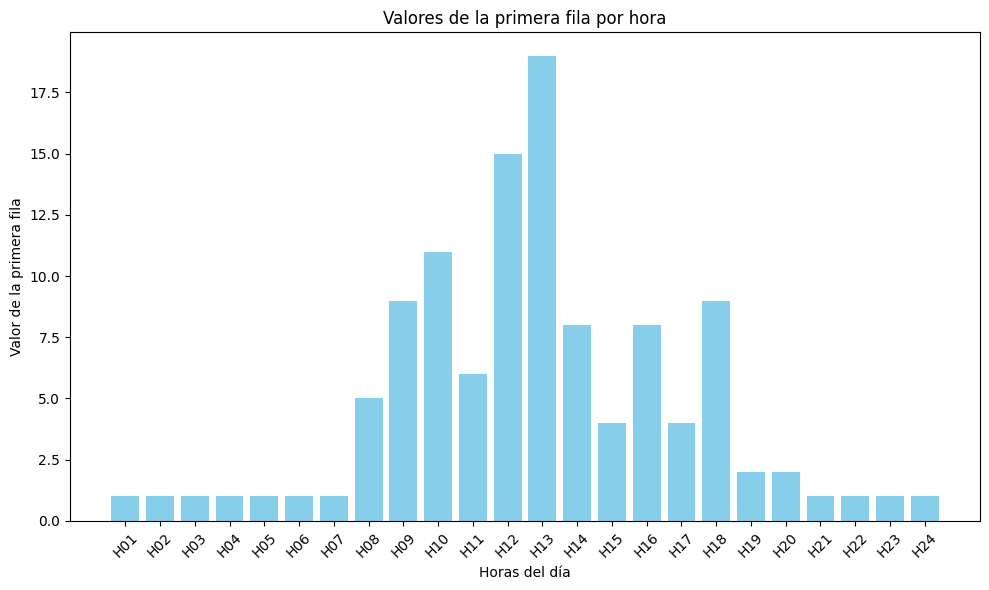

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1. 16.  9.  8. 11. 12.  8. 12.  6.  4.  2.  4.  7.  6.
  2.  1.  1.  1.  1.  1.]


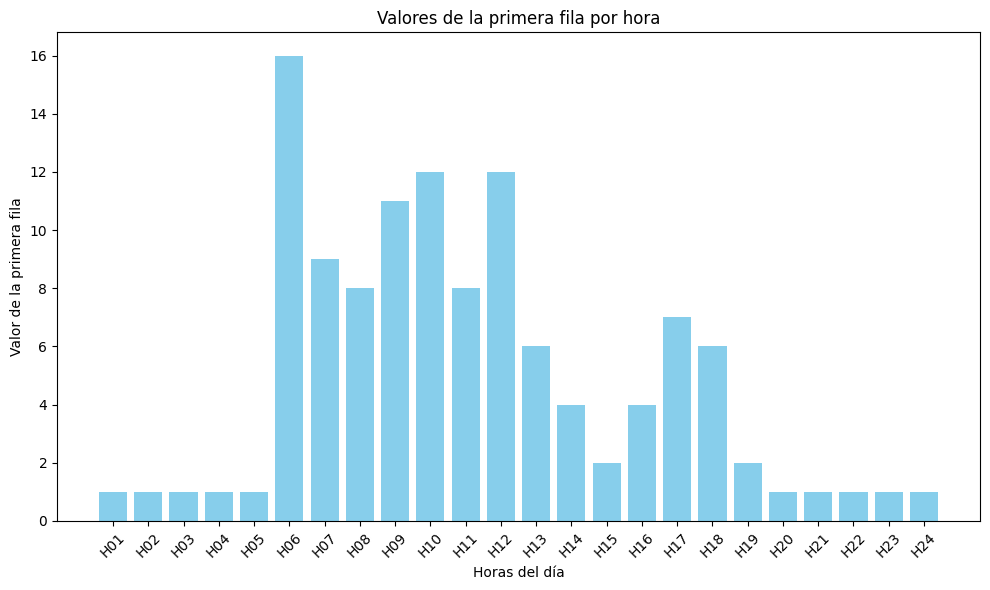

In [262]:
#Eixample:
df_o3_valle_hebron = df_o3[df_o3["ESTACIO"] == 54]
for i in range(0, 29):
  plotear_ozono(df_o3_valle_hebron, i)

In [263]:
#observatori:
df_o3_observatori = df_o3[df_o3["ESTACIO"] == 58]
# for i in range(0, 29):
#   plotear_ozono(df_o3_observatori, i)
df_o3_observatori

Empty DataFrame
Columns: [ESTACIO, CODI_CONTAMINANT, ANY, MES, DIA, H01, V01, H02, V02, H03, V03, H04, V04, H05, V05, H06, V06, H07, V07, H08, V08, H09, V09, H10, V10, H11, V11, H12, V12, H13, V13, H14, V14, H15, V15, H16, V16, H17, V17, H18, V18, H19, V19, H20, V20, H21, V21, H22, V22, H23, V23, H24, V24]
Index: []

[0 rows x 53 columns]

vemos que el mes de abril, la estacion decidio no medir el aire

# plot para ver el dia i en todas las estaciones

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 1. 3. 5. 3. 3. 3. 2. 3. 3. 5. 3. 7. 2. 2. 4. 1. 3. 6.]


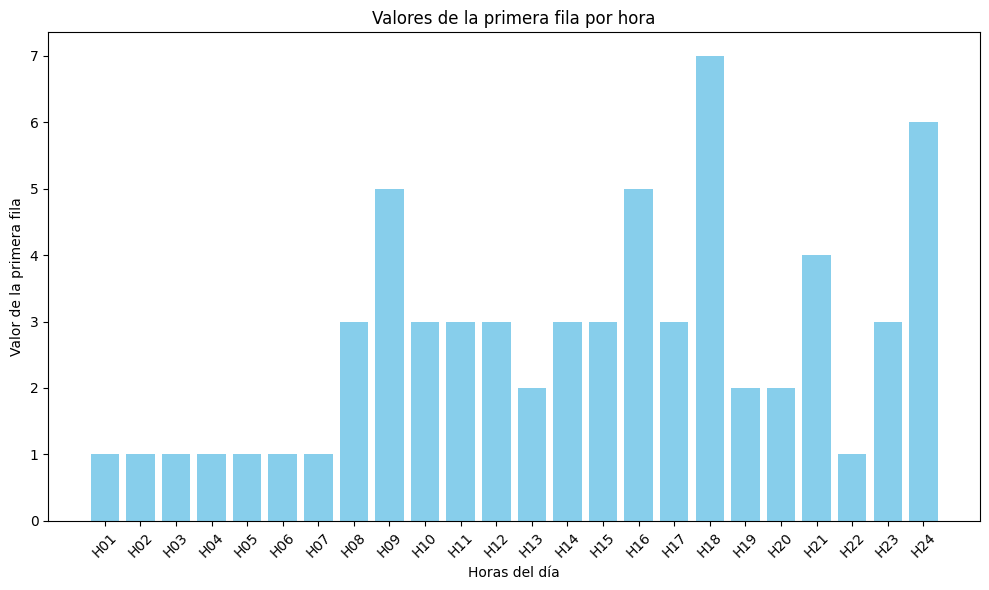

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [1. 1. 1. 1. 1. 1. 2. 4. 6. 6. 5. 7. 7. 8. 6. 3. 6. 3. 3. 3. 2. 2. 2. 2.]


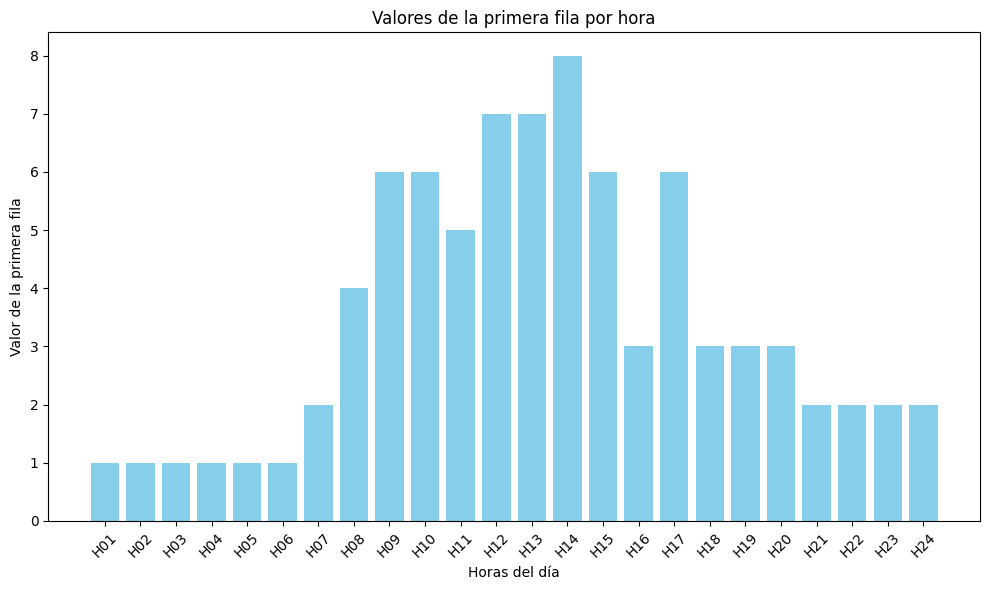

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 2.  3.  2.  6.  1.  1.  6. 22. 27. 28. 14. 18. 12. 12. 11.  6. 17.  6.
 11.  7.  4.  4.  7.  3.]


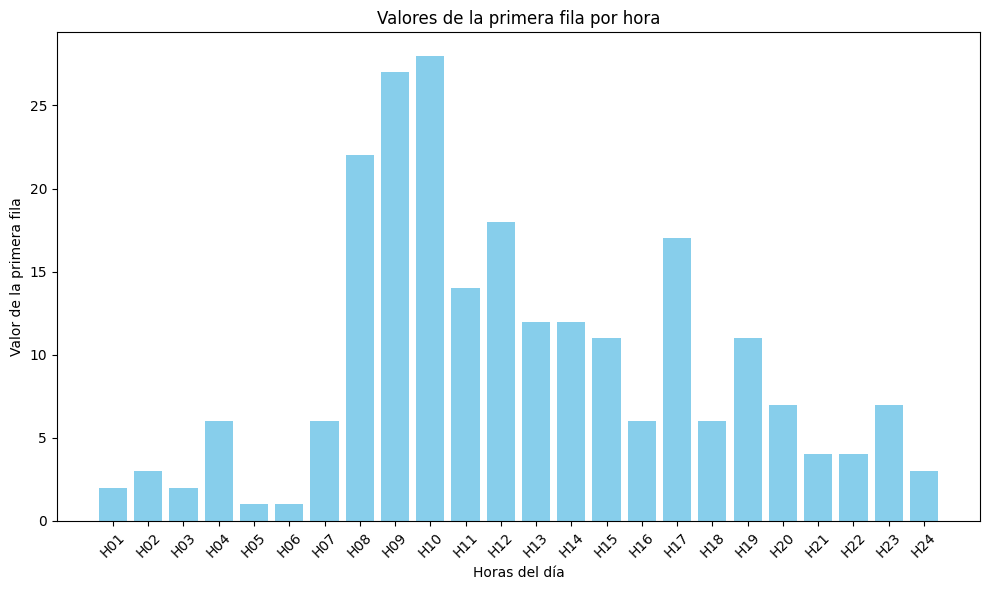

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 7.  5.  5.  6.  5.  4. 12. 58. 66. 43. 21. 18. 24. 26. 13. 18. 24. 20.
 27. 18.  8.  8.  3. 10.]


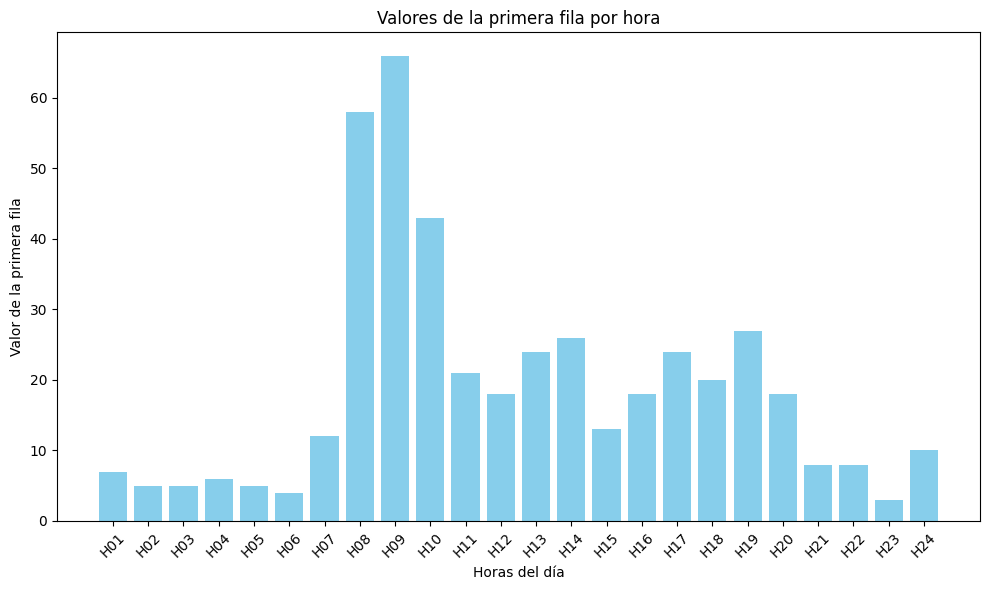

Horas: ['H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']
Valores: [ 1.  1.  1.  1.  1.  1.  2.  1.  4.  7.  9. 16.  8. 11.  7.  3.  4.  3.
  2.  2.  2.  2.  2.  1.]


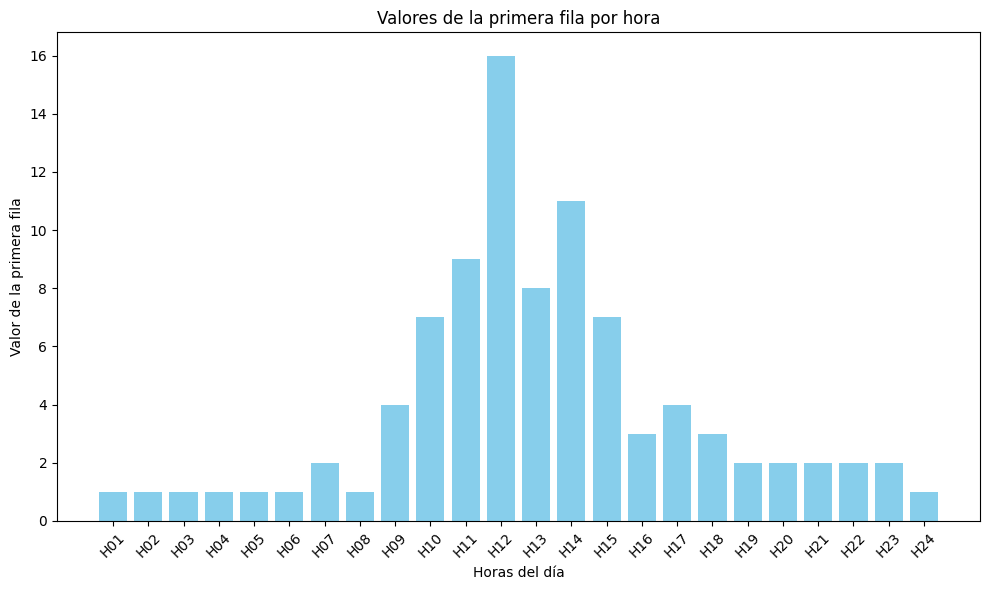

In [264]:
i=1 #inidce para selecccionar que dia del mes queremos ver
plotear_ozono(df_o3_valle_hebron, i)
plotear_ozono(df_o3_poblenou, i)
plotear_ozono(df_o3_gracia, i)
plotear_ozono(df_o3_eixample, i)
plotear_ozono(df_o3_ciutadella, i)
#plotear_ozono(df_o3_observatori, i) ::: descomentar en caso de que esta estacion haya tomado datos

falta por hacer:

* repetir el mismo codigo pero para otros contaminantes: CO2
* analizar lo que pasa con el ozono en un dia en concreto
* conclusiones a partir de los datos